<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

[1.](#primero) Predicción de Entalpía de Atomización  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Entendimiento de imágenes de personas

<a id="primero"></a>
## 1. Predicción de Entalpía de Atomización


Las simulaciones de propiedades moleculares son computacionalmente costosas y requieren de un arduo trabajo científico. El objetivo de esta sección corresponde a la utilización de métodos de aprendizaje automático supervisado (Redes Neuronales Artificiales) para predecir propiedades moleculares, en este caso la Energía de Atomización o Entalpía de Atomización, a partir de una base de datos de simulaciones obtenida mediante __[Quantum Espresso](http://www.quantum-espresso.org/)__. Si esto se lograse hacer con gran precisión, se abrirían muchas posibilidades en el diseño computacional y el descubrimiento de nuevas moléculas, compuestos y fármacos.

<img src="https://pubs.rsc.org/services/images/RSCpubs.ePlatform.Service.FreeContent.ImageService.svc/ImageService/Articleimage/2012/NR/c2nr11543c/c2nr11543c-f4.gif" title="Title text" width="40%"/>


La **entalpía de atomización** es la cantidad de variación de entalpía cuando los enlaces de un compuesto se rompen y los componentes se reducen a átomos individuales. Tal como se ha indicado, su tarea es la de predecir dicho nivel a partir de los atributos enunciados en el dataset puesto a vuestra disposición en *moodle*.

> a) Construya un *dataframe* con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas.

In [1]:
import pandas as pd
datos= pd.read_csv("EnergyMolecule/roboBohr.csv")
datos.shape
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


Unnamed: 0             0             1             2             3  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean    8139.041805    115.715266     22.445723     20.474191     18.529573   
std     4698.182820    113.198503      8.659586      7.670481      6.485777   
min        0.000000     36.858105      2.906146      0.000000      0.000000   
25%     4068.250000     73.516695     17.969345     16.228071     15.165862   
50%     8142.500000     73.516695     20.662511     18.631287     17.690729   
75%    12207.750000     73.516695     21.132432     20.739496     18.712895   
max    16272.000000    388.023441     73.563510     66.269180     66.268891   

                  4             5             6             7             8  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      17.169350     15.816888     15.133152     14.471534     13.960759   
std        5.512560      4.179691      3.885091      3.503075      3.357136   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.744092     13.653146     13.637784     12.759519     12.587359   
50%       16.020040     15.156646     13.848274     13.659233     13.652832   
75%       18.297501     17.639688     16.154918     15.499474     14.900585   
max       66.268756     66.268196     66.264158     66.258487     66.258177   

           ...               1267          1268          1269          1270  \
count      ...       16242.000000  16242.000000  16242.000000  16242.000000   
mean       ...           0.000134      0.000133      0.003879      0.000131   
std        ...           0.002728      0.002705      0.043869      0.002676   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           0.062225      0.061999      0.500000      0.061534   

               1271          1272          1273          1274    pubchem_id  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean       0.000129      0.002155      0.000127      0.001201  33107.484300   
std        0.002633      0.032755      0.002594      0.024472  23456.785147   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000      0.000000      0.000000      0.000000  12298.250000   
50%        0.000000      0.000000      0.000000      0.000000  27731.500000   
75%        0.000000      0.000000      0.000000      0.000000  55020.750000   
max        0.059760      0.500000      0.057834      0.500000  74980.000000   

                Eat  
count  16242.000000  
mean     -11.178969  
std        3.659133  
min      -23.245373  
25%      -13.475805  
50%      -10.835211  
75%       -8.623903  
max       -0.789513  

[8 rows x 1278 columns]

Detalle: La primera columna son los indices, agregados automaticamente por pandas. La penultima es un "pubchem_id", esto es un identificador de la sustancia respectiva. La ultima columna es nuestro target, la entalpia de atomización. El resto de las columnas son nuestra entrada, son las cantidades de cada uno de los atomos.

In [2]:
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

>a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. **Explique por qué se aconseja dicho preprocesamiento**

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)

X_train_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_val_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_test_scaled.drop(columns=['Eat'],axis=1,inplace=True)


Las entradas son llevadas a el rango (-1,1) para que todas las entradas tengan contribuciónes más uniformes y además para no restringir el espacio de posibles valores donde se mueven los pesos, lo que podria suceder si los valores fuesen solo positivos (o negativos).

>b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Using TensorFlow backend.


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 14s 1ms/step - loss: 1.5892 - val_loss: 0.5074
Epoch 2/250
9745/9745 [==============================] - 1s 72us/step - loss: 0.6009 - val_loss: 0.4836
Epoch 3/250
9745/9745 [==============================] - 1s 71us/step - loss: 0.5067 - val_loss: 0.3881
Epoch 4/250
9745/9745 [==============================] - 1s 75us/step - loss: 0.4374 - val_loss: 0.3698
Epoch 5/250
9745/9745 [==============================] - 1s 70us/step - loss: 0.3756 - val_loss: 0.4117
Epoch 6/250
9745/9745 [==============================] - 1s 74us/step - loss: 0.3284 - val_loss: 0.2986
Epoch 7/250
9745/9745 [==============================] - 1s 72us/step - loss: 0.2881 - val_loss: 0.3107
Epoch 8/250
9745/9745 [==============================] - 1s 76us/step - loss: 0.2505 - val_loss: 0.2119
Epoch 9/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.2229 - val_loss: 0.2492
Epoch 10/250
974

9745/9745 [==============================] - 1s 69us/step - loss: 0.0308 - val_loss: 0.0408
Epoch 79/250
9745/9745 [==============================] - 1s 69us/step - loss: 0.0302 - val_loss: 0.0446
Epoch 80/250
9745/9745 [==============================] - 1s 70us/step - loss: 0.0290 - val_loss: 0.0417
Epoch 81/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.0293 - val_loss: 0.0413
Epoch 82/250
9745/9745 [==============================] - 1s 76us/step - loss: 0.0296 - val_loss: 0.0412
Epoch 83/250
9745/9745 [==============================] - 1s 73us/step - loss: 0.0285 - val_loss: 0.0431
Epoch 84/250
9745/9745 [==============================] - 1s 71us/step - loss: 0.0286 - val_loss: 0.0434
Epoch 85/250
9745/9745 [==============================] - 1s 72us/step - loss: 0.0284 - val_loss: 0.0394
Epoch 86/250
9745/9745 [==============================] - 1s 71us/step - loss: 0.0285 - val_loss: 0.0417
Epoch 87/250
9745/9745 [==============================] - 1s 76us/st

9745/9745 [==============================] - 1s 72us/step - loss: 0.0196 - val_loss: 0.0609
Epoch 156/250
9745/9745 [==============================] - 1s 64us/step - loss: 0.0197 - val_loss: 0.0378
Epoch 157/250
9745/9745 [==============================] - 1s 72us/step - loss: 0.0199 - val_loss: 0.0347
Epoch 158/250
9745/9745 [==============================] - 1s 66us/step - loss: 0.0204 - val_loss: 0.0333
Epoch 159/250
9745/9745 [==============================] - 1s 71us/step - loss: 0.0202 - val_loss: 0.0342
Epoch 160/250
9745/9745 [==============================] - 1s 66us/step - loss: 0.0201 - val_loss: 0.0354
Epoch 161/250
9745/9745 [==============================] - 1s 76us/step - loss: 0.0198 - val_loss: 0.0336
Epoch 162/250
9745/9745 [==============================] - 1s 71us/step - loss: 0.0190 - val_loss: 0.0335
Epoch 163/250
9745/9745 [==============================] - 1s 73us/step - loss: 0.0188 - val_loss: 0.0380
Epoch 164/250
9745/9745 [==============================] - 1

9745/9745 [==============================] - 1s 82us/step - loss: 0.0157 - val_loss: 0.0342
Epoch 233/250
9745/9745 [==============================] - 1s 73us/step - loss: 0.0154 - val_loss: 0.0337
Epoch 234/250
9745/9745 [==============================] - 1s 65us/step - loss: 0.0155 - val_loss: 0.0331
Epoch 235/250
9745/9745 [==============================] - 1s 65us/step - loss: 0.0158 - val_loss: 0.0376
Epoch 236/250
9745/9745 [==============================] - 1s 64us/step - loss: 0.0152 - val_loss: 0.0333
Epoch 237/250
9745/9745 [==============================] - 1s 66us/step - loss: 0.0154 - val_loss: 0.0338
Epoch 238/250
9745/9745 [==============================] - 1s 67us/step - loss: 0.0155 - val_loss: 0.0321
Epoch 239/250
9745/9745 [==============================] - 1s 68us/step - loss: 0.0152 - val_loss: 0.0327
Epoch 240/250
9745/9745 [==============================] - 1s 70us/step - loss: 0.0156 - val_loss: 0.0569
Epoch 241/250
9745/9745 [==============================] - 1

In [5]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Sigmoide')
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.legend();
plt.show()

<Figure size 1200x800 with 1 Axes>

Se observa una buena convergencia tanto para el train_set como apra el test_set, sin overfitting. No se observan divergencias para los hyperparametros seleccionados.

> c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  

Es necesario disminuir el learning rate en un factor de 10, de lo contrario el error es demasiado grande con lo que el algoritmo diverge.

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history_relu = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Using TensorFlow backend.


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s 128us/step - loss: 8.3148 - val_loss: 3.3032
Epoch 2/250
9745/9745 [==============================] - 1s 70us/step - loss: 1.8442 - val_loss: 2.0252
Epoch 3/250
9745/9745 [==============================] - 1s 73us/step - loss: 0.9119 - val_loss: 1.6347
Epoch 4/250
9745/9745 [==============================] - 1s 69us/step - loss: 0.6422 - val_loss: 1.7280
Epoch 5/250
9745/9745 [==============================] - 1s 67us/step - loss: 0.6146 - val_loss: 1.5449
Epoch 6/250
9745/9745 [==============================] - 1s 67us/step - loss: 0.5079 - val_loss: 1.3527
Epoch 7/250
9745/9745 [==============================] - 1s 68us/step - loss: 0.4072 - val_loss: 1.2027
Epoch 8/250
9745/9745 [==============================] - 1s 68us/step - loss: 0.3502 - val_loss: 1.3874
Epoch 9/250
9745/9745 [==============================] - 1s 72us/step - loss: 0.3664 - val_loss: 1.2628
Epoch 10/250
97

9745/9745 [==============================] - 1s 79us/step - loss: 0.0287 - val_loss: 0.4821
Epoch 156/250
9745/9745 [==============================] - 1s 72us/step - loss: 0.0288 - val_loss: 0.5020
Epoch 157/250
9745/9745 [==============================] - 1s 73us/step - loss: 0.0308 - val_loss: 0.4630
Epoch 158/250
9745/9745 [==============================] - 1s 77us/step - loss: 0.0301 - val_loss: 0.4668
Epoch 159/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.0289 - val_loss: 0.4685
Epoch 160/250
9745/9745 [==============================] - 1s 70us/step - loss: 0.0291 - val_loss: 0.4628
Epoch 161/250
9745/9745 [==============================] - 1s 70us/step - loss: 0.0277 - val_loss: 0.4596
Epoch 162/250
9745/9745 [==============================] - 1s 68us/step - loss: 0.0282 - val_loss: 0.4613
Epoch 163/250
9745/9745 [==============================] - 1s 68us/step - loss: 0.0280 - val_loss: 0.4620
Epoch 164/250
9745/9745 [==============================] - 1

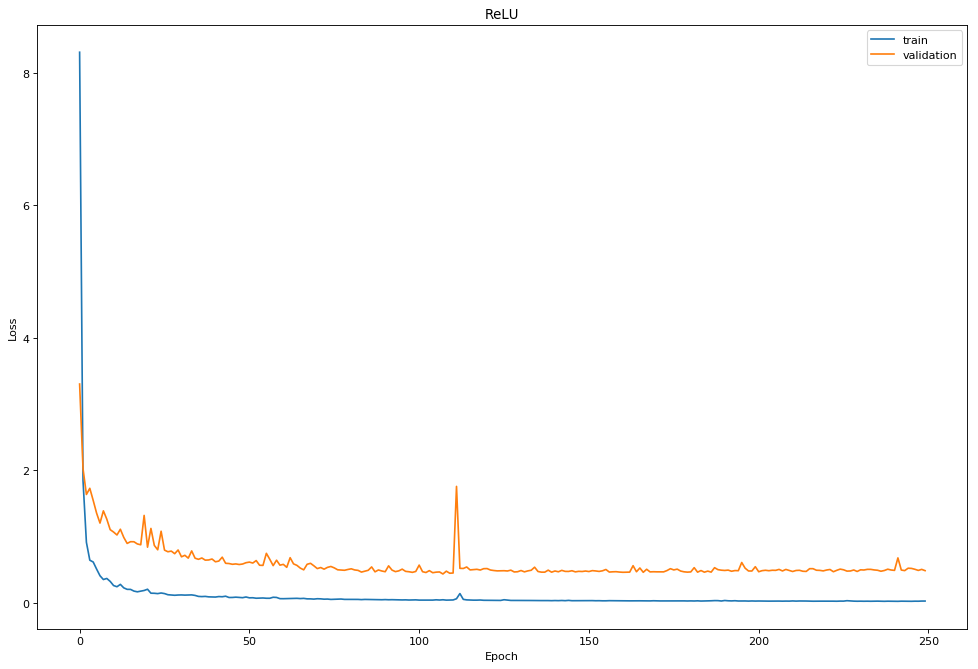

In [27]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('ReLU')
plt.plot(history_relu.history['loss'],label='train');
plt.plot(history_relu.history['val_loss'],label='validation');
plt.ylabel('Loss');
plt.xlabel('Epoch')
plt.legend();
plt.show()

Se obtiene un desempeño bastante deficiente comparado a lo oque se obtuvo con función de activación sigmoidal , además,
como se comentaba anteriormente se tuvo que disminuir el learning rate en un factor de 10, ya que de lo contrario el entrenamiento divergia. De todas maneras el modelo converge a un valor razonable de MSE sin aparente overfitting.

Es probable que modelos que incluyan capas RELU son más efectivos en redes más profundas y/o que contengan fases previas convolucionales.

> d) Repita b) y c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

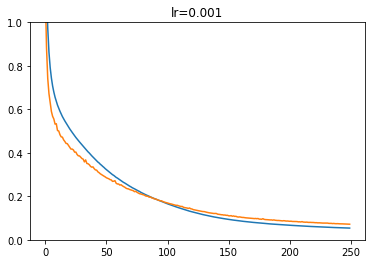

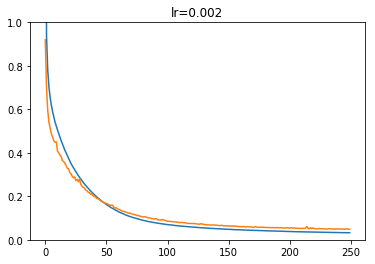

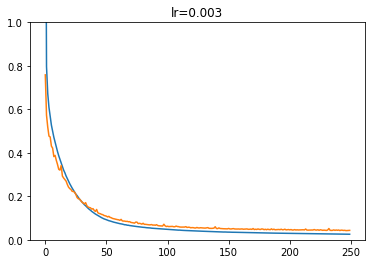

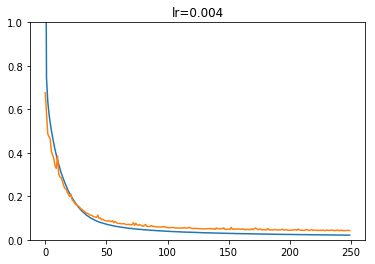

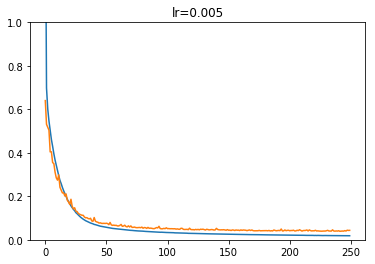

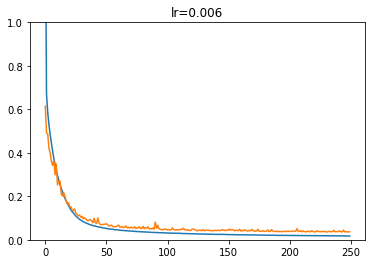

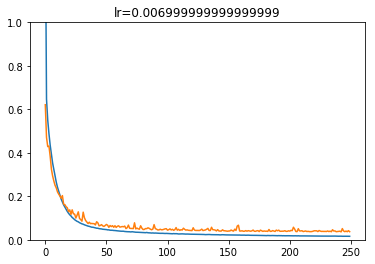

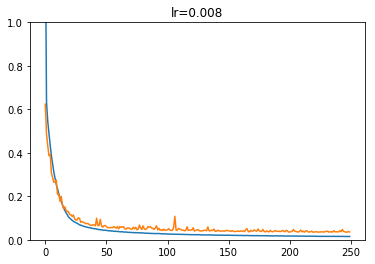

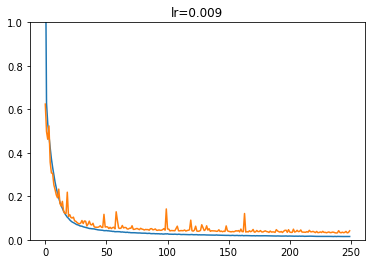

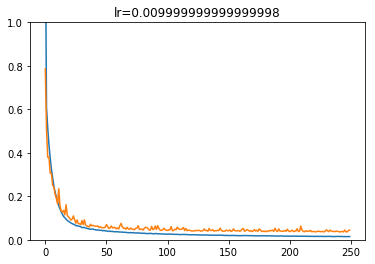

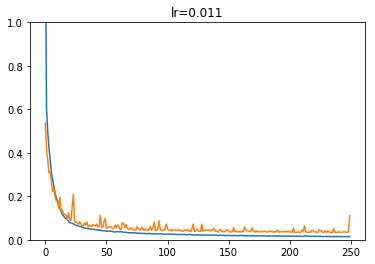

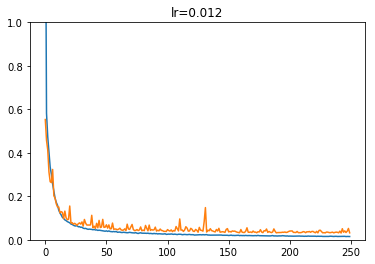

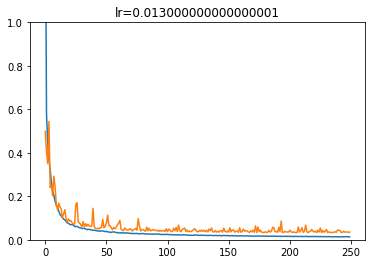

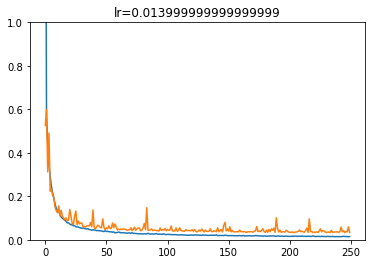

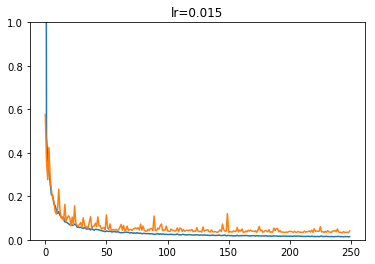

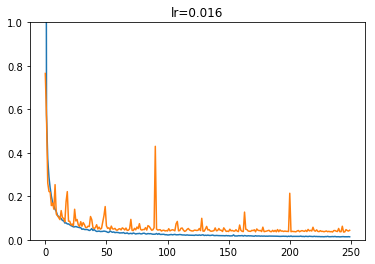

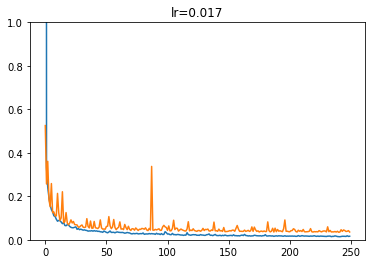

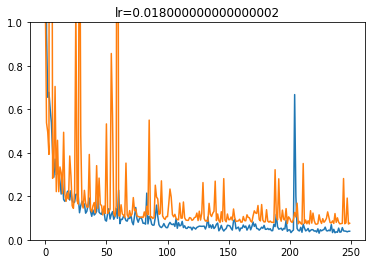

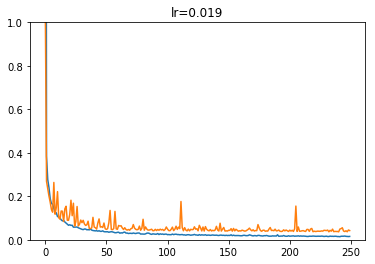

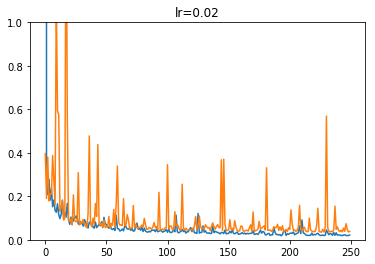

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
lr=0.02;
n_lr = 20;
learn_rate = np.linspace(1/n_lr,1,n_lr)*lr; #20 puntos de (0,1]
plt.figure();
for i in learn_rate:
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=i),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
    plt.title('lr='+str(i));
    plt.plot(history.history['loss'],label='train');
    plt.plot(history.history['val_loss'],label='validation');
    plt.ylim([0,1]);

plt.show();

Al aumentar el learning rate se llega a un valor "estacionario" de manera más rapida pero se agrega más ruido. El valor optimo (que obtiene un mse menor en validation set) es lr=0.008.

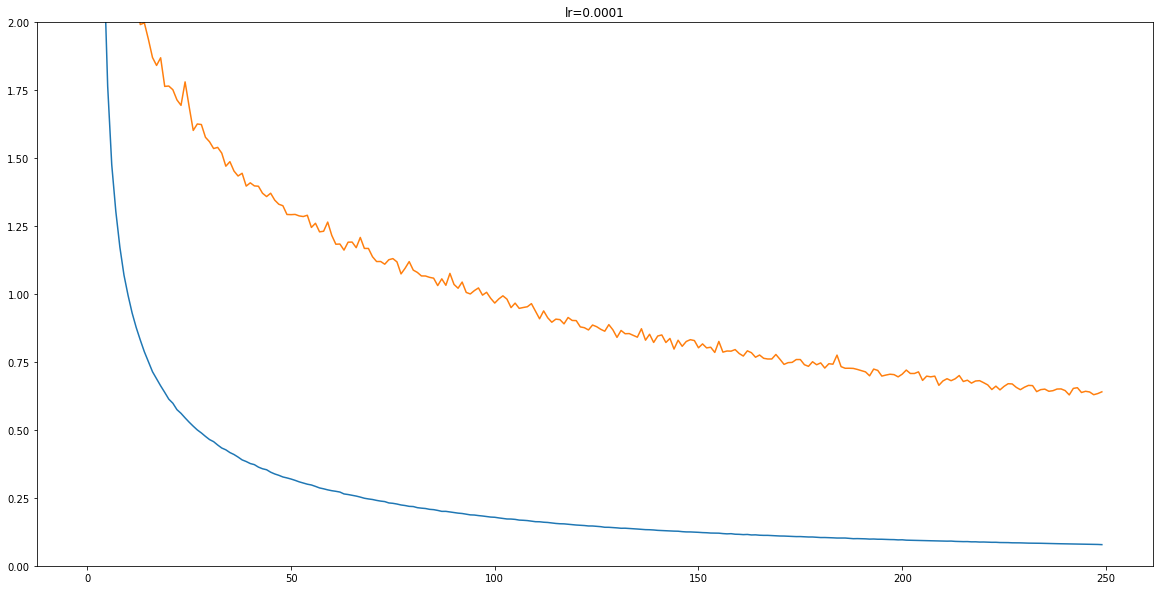

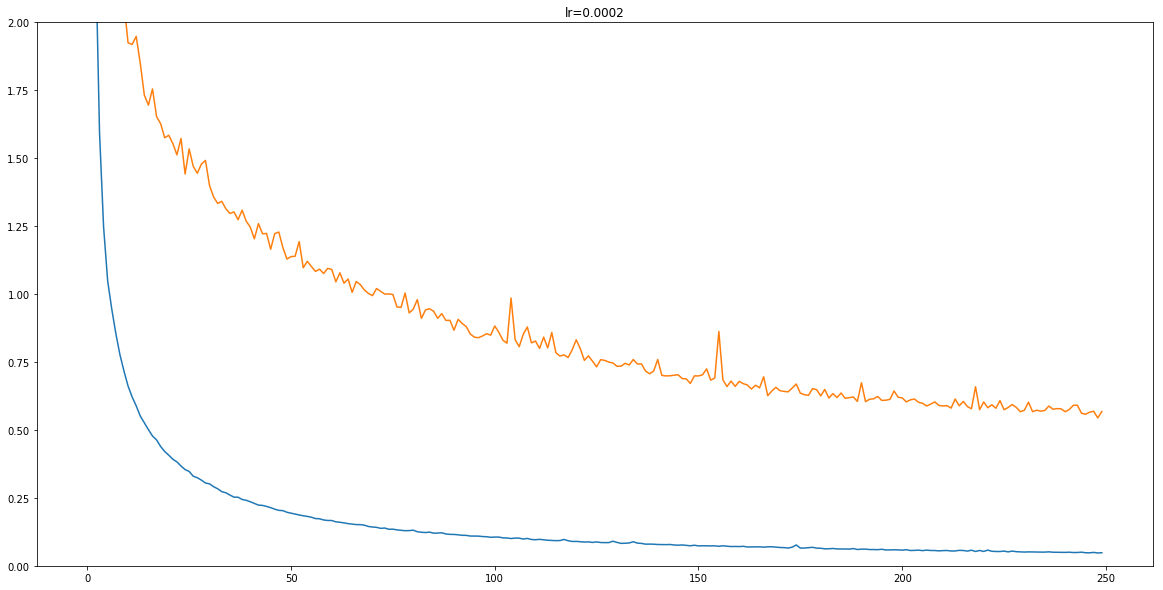

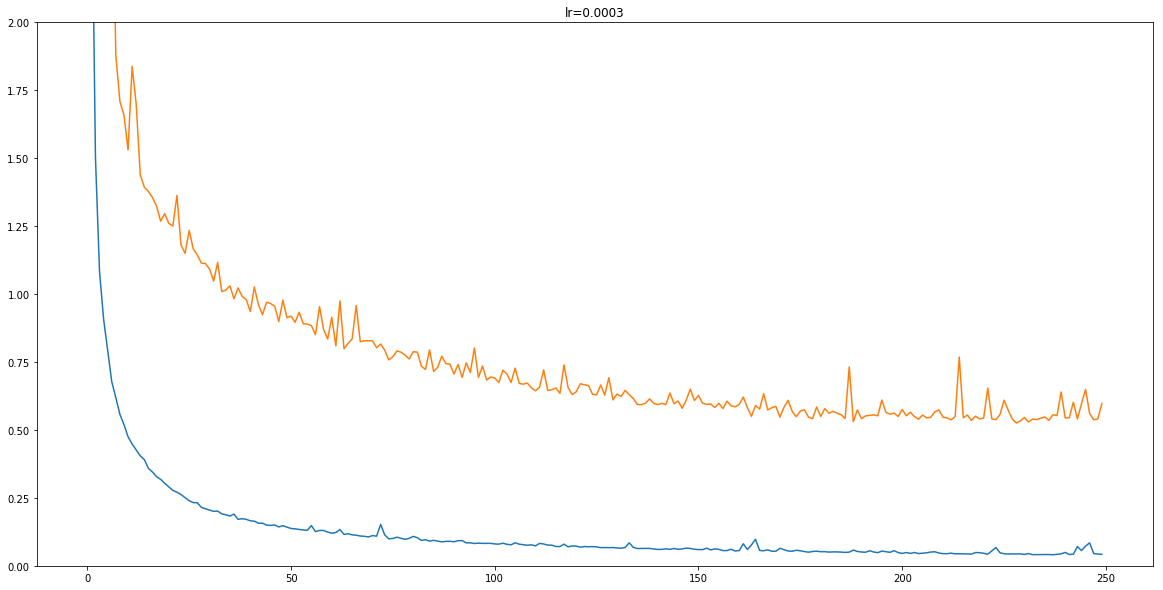

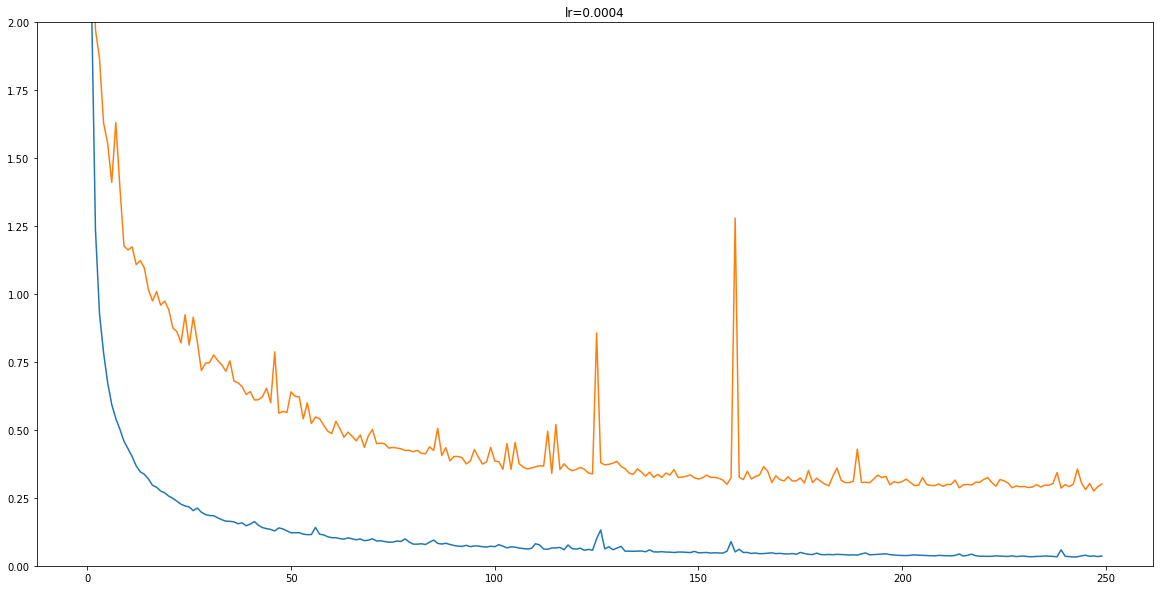

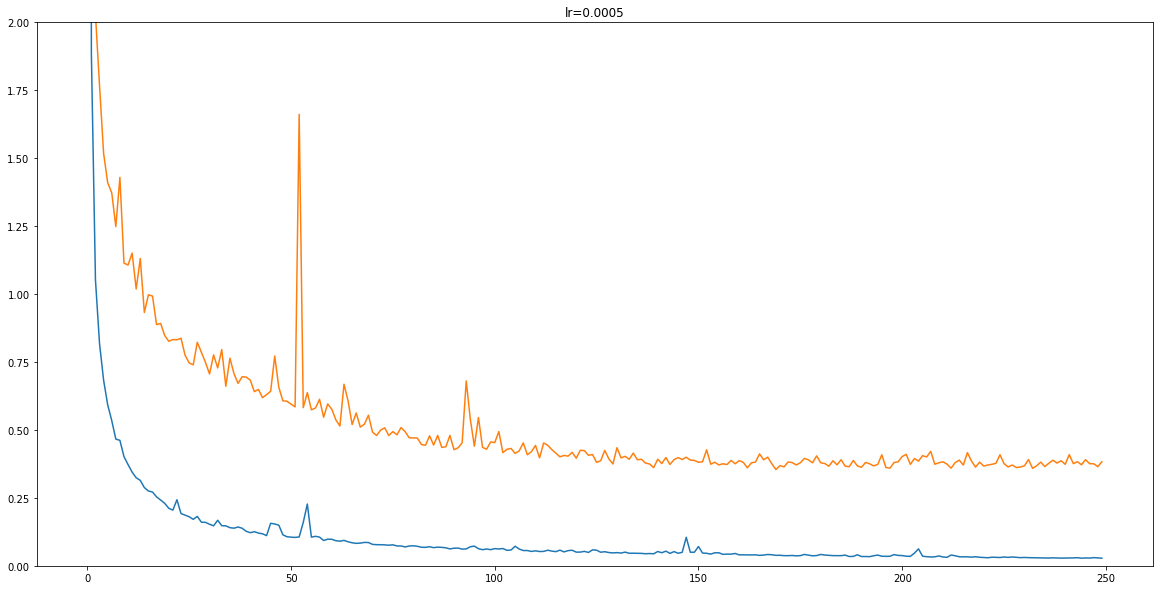

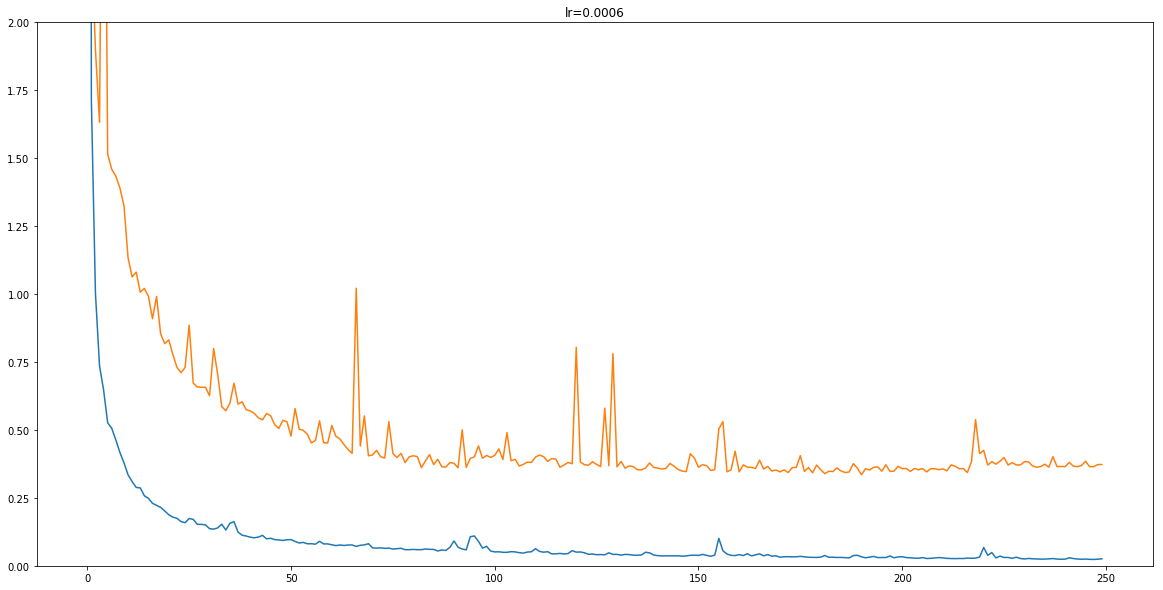

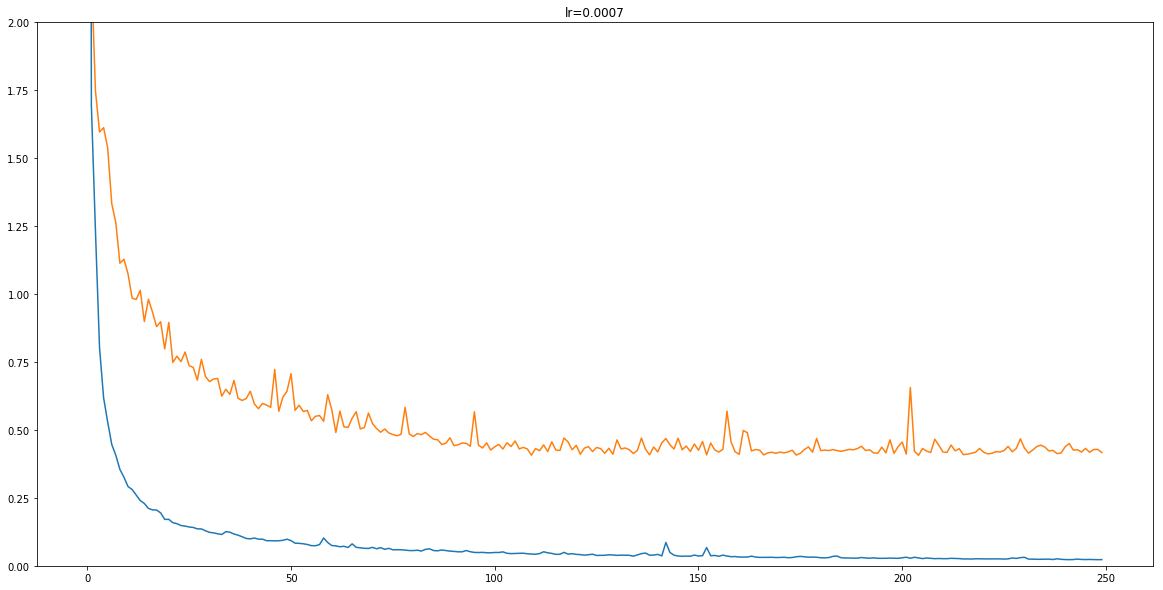

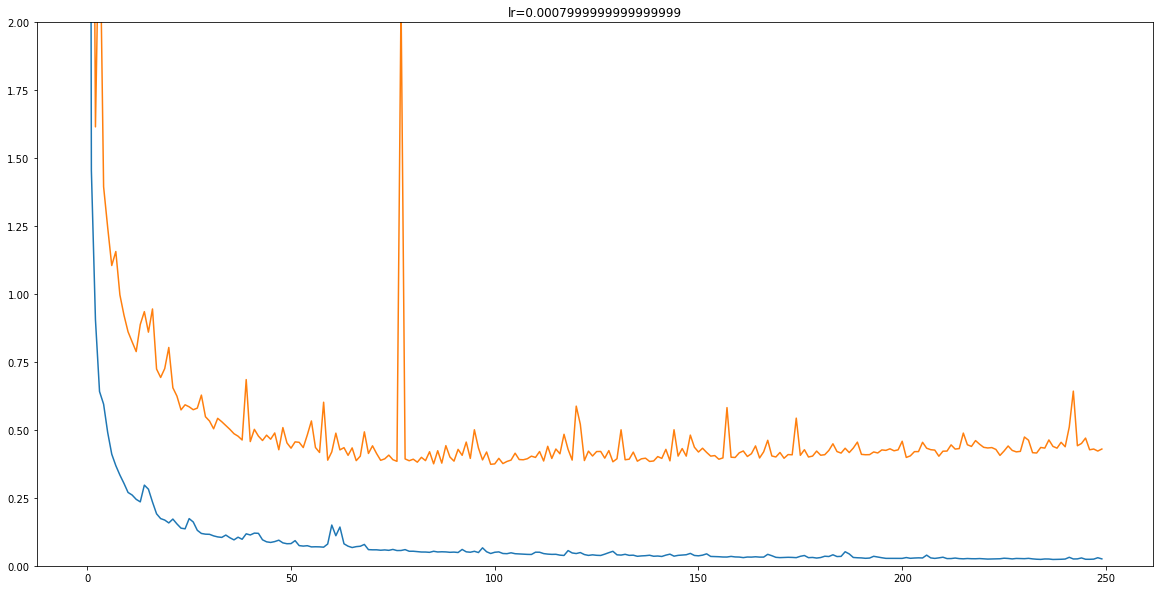

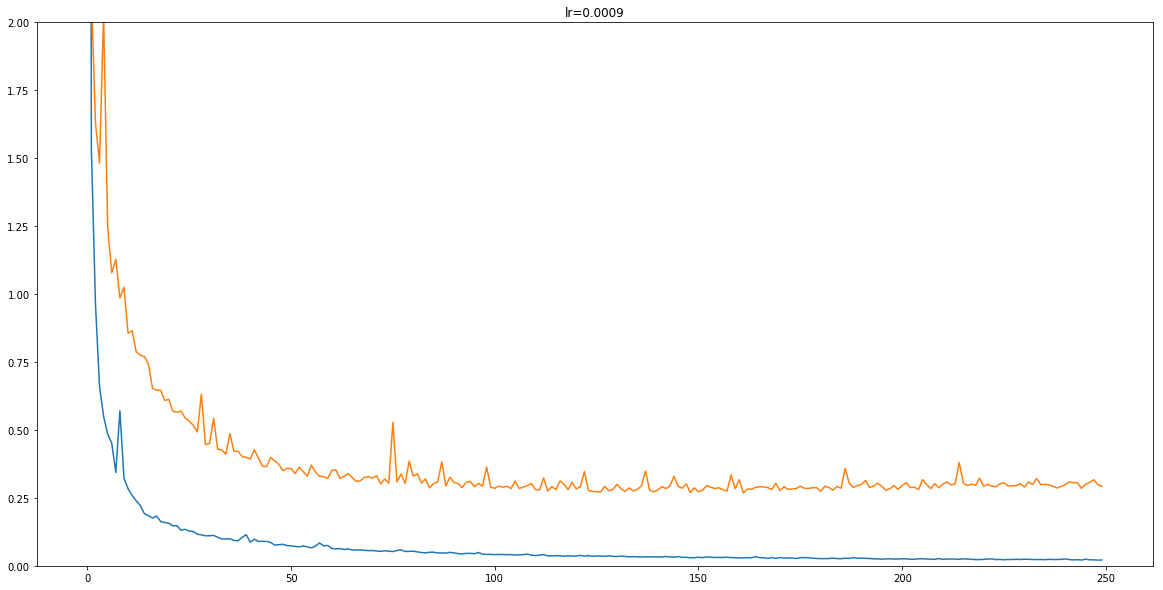

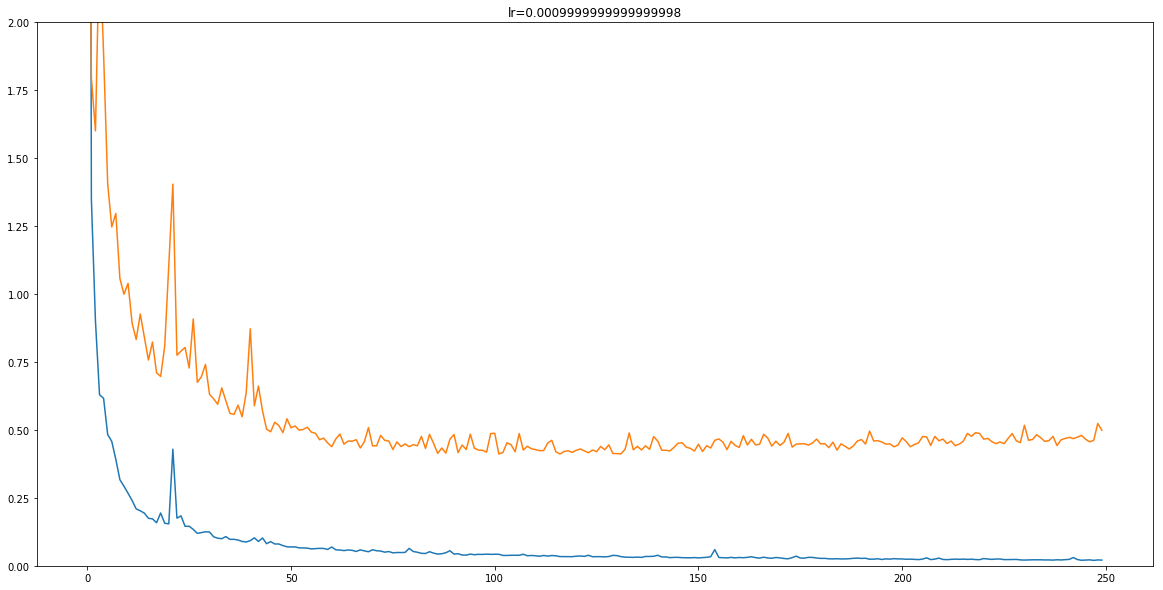

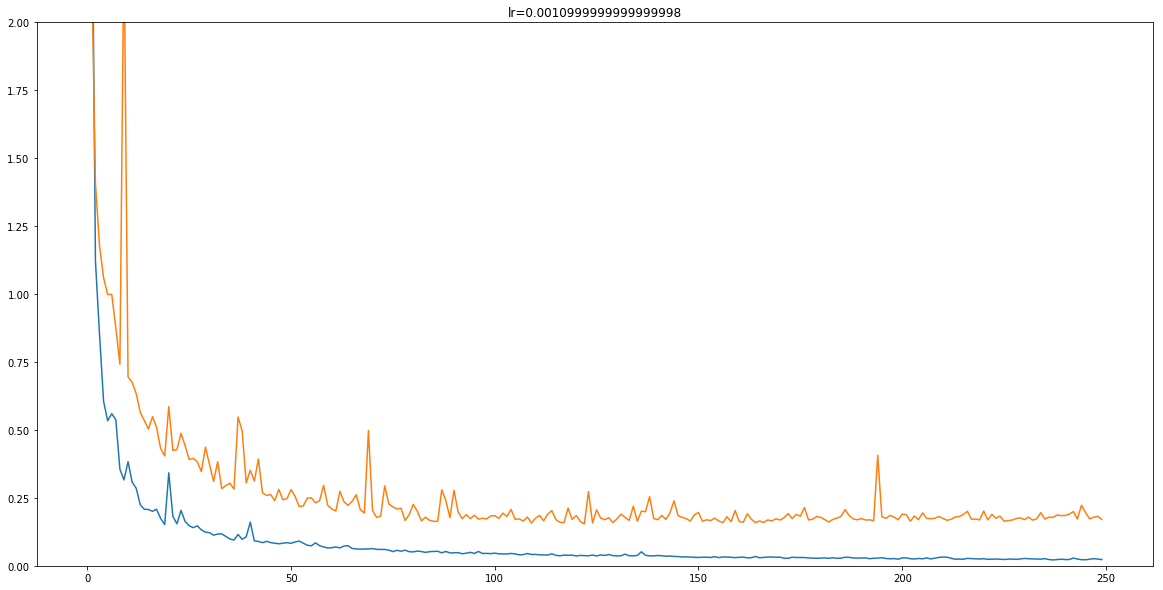

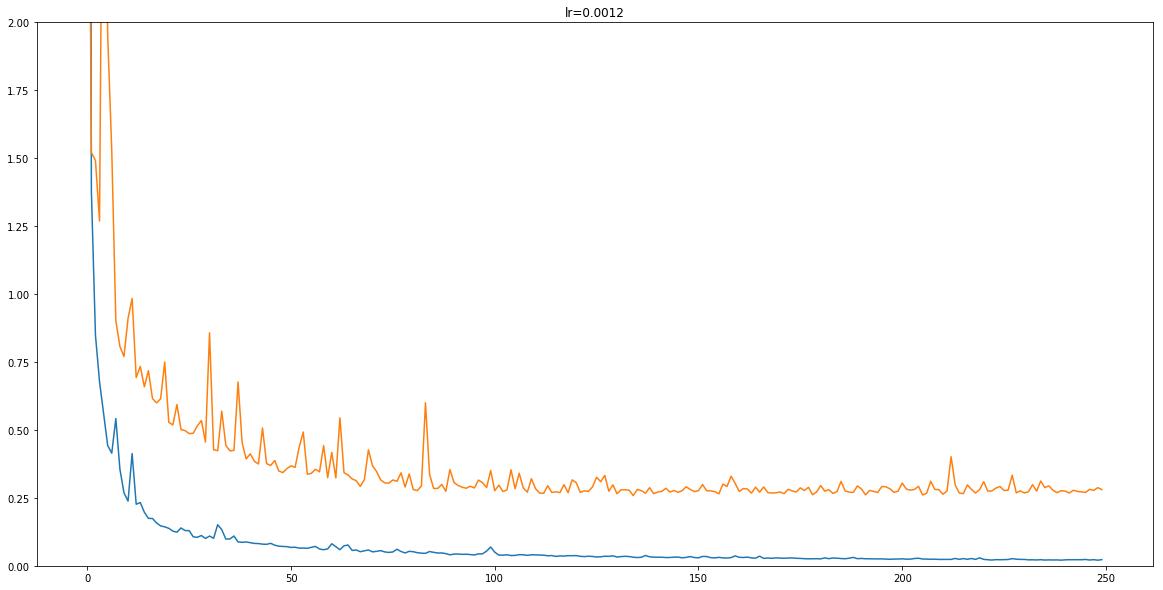

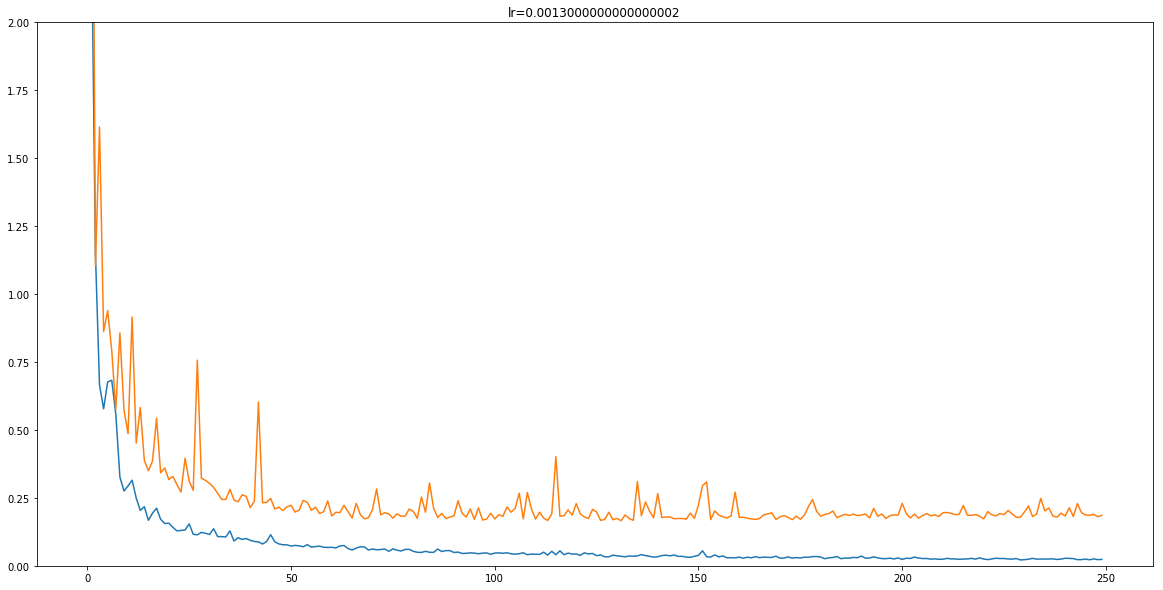

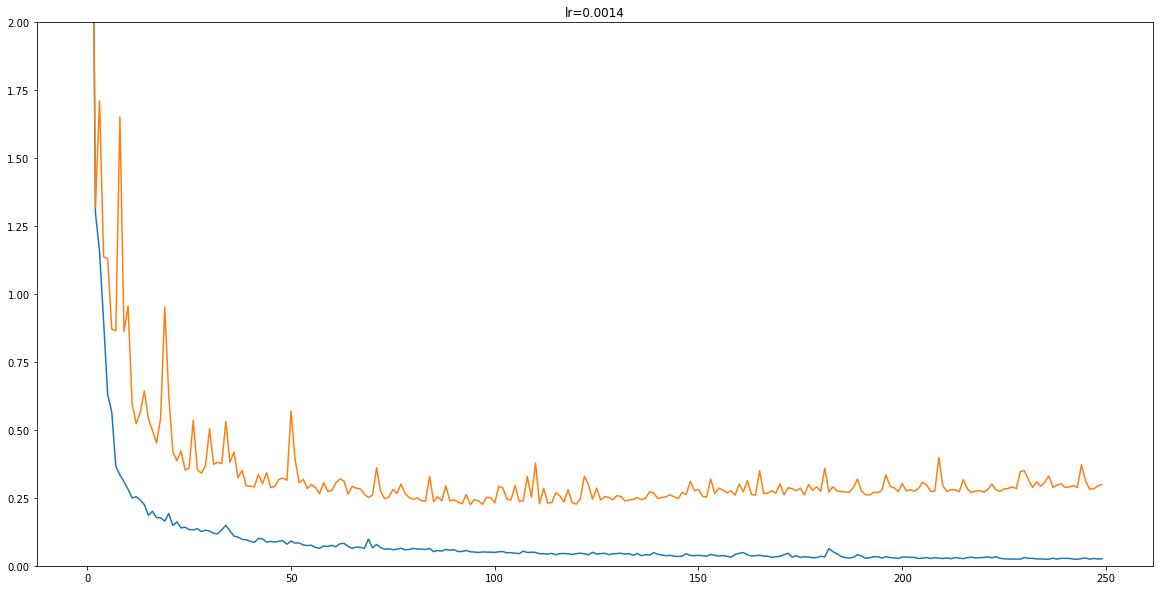

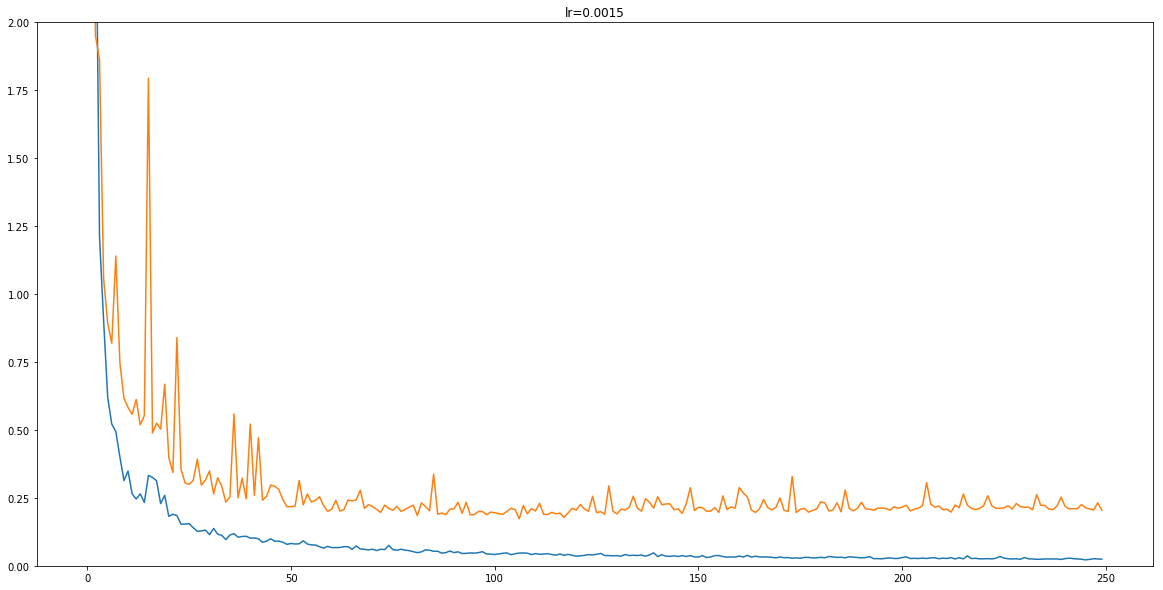

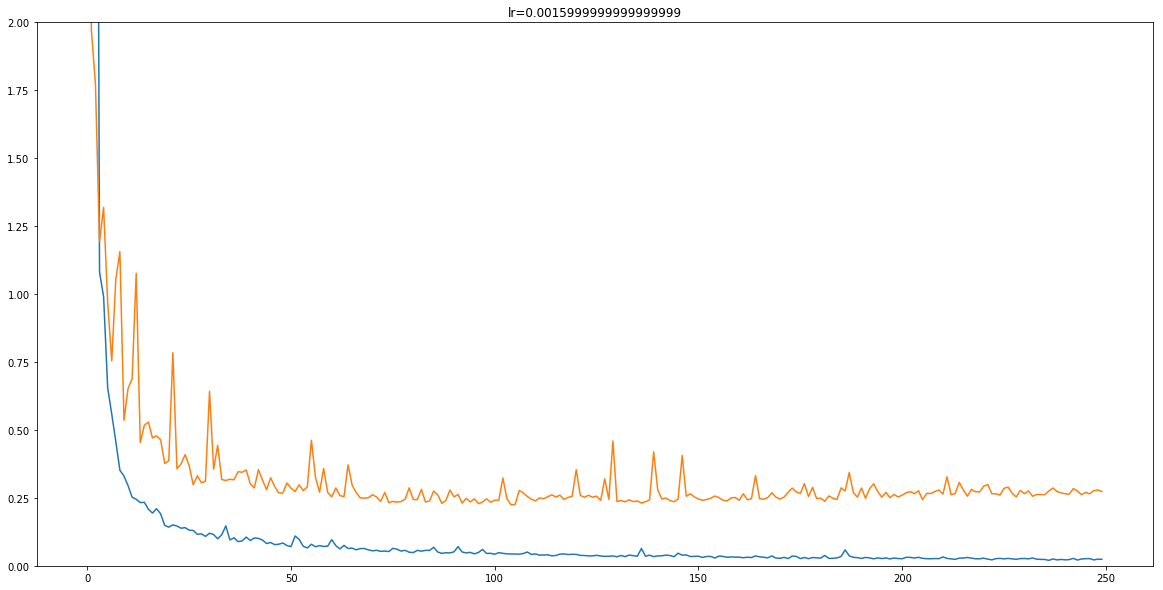

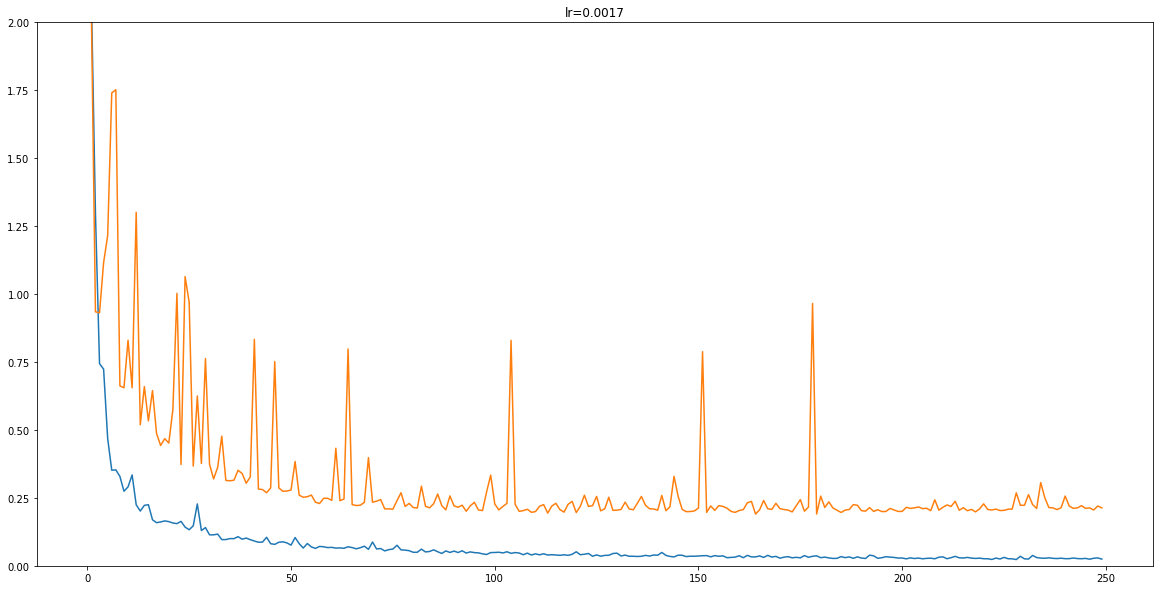

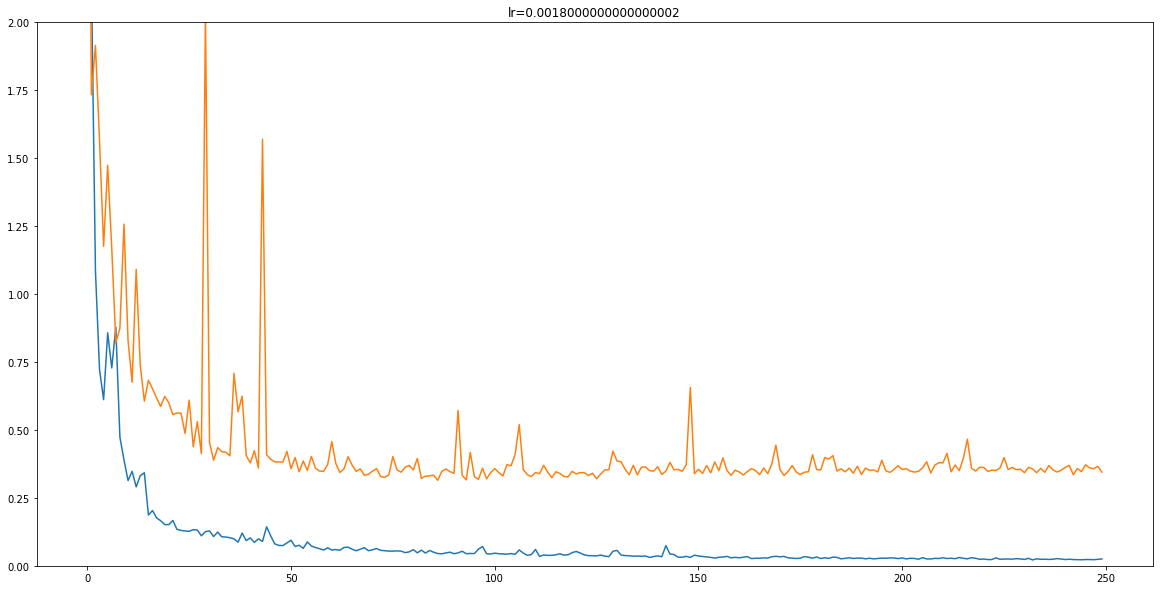

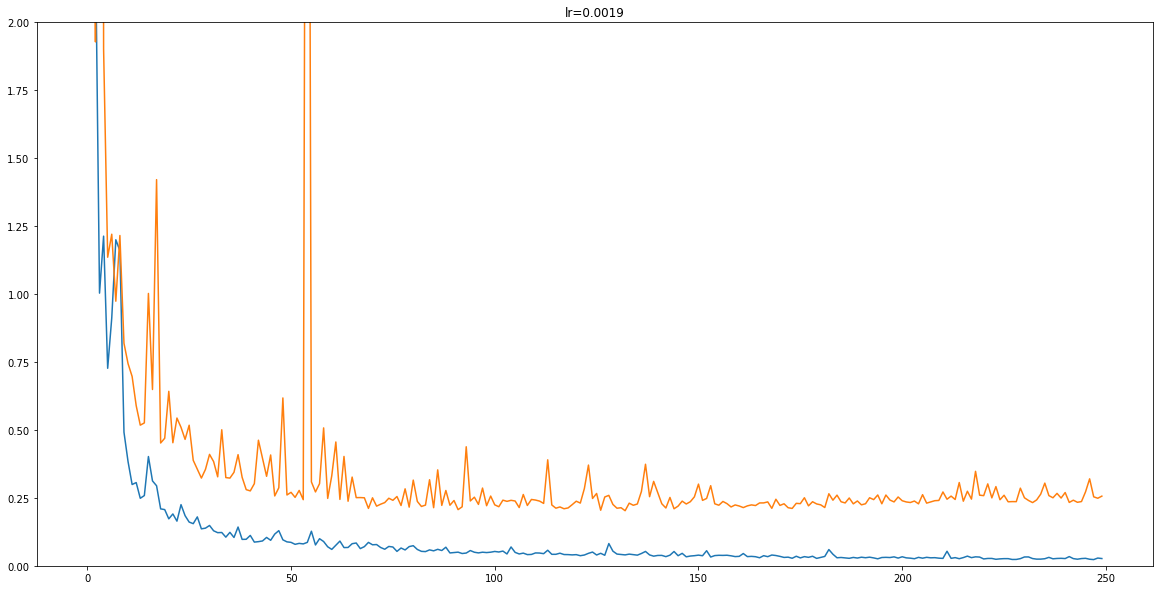

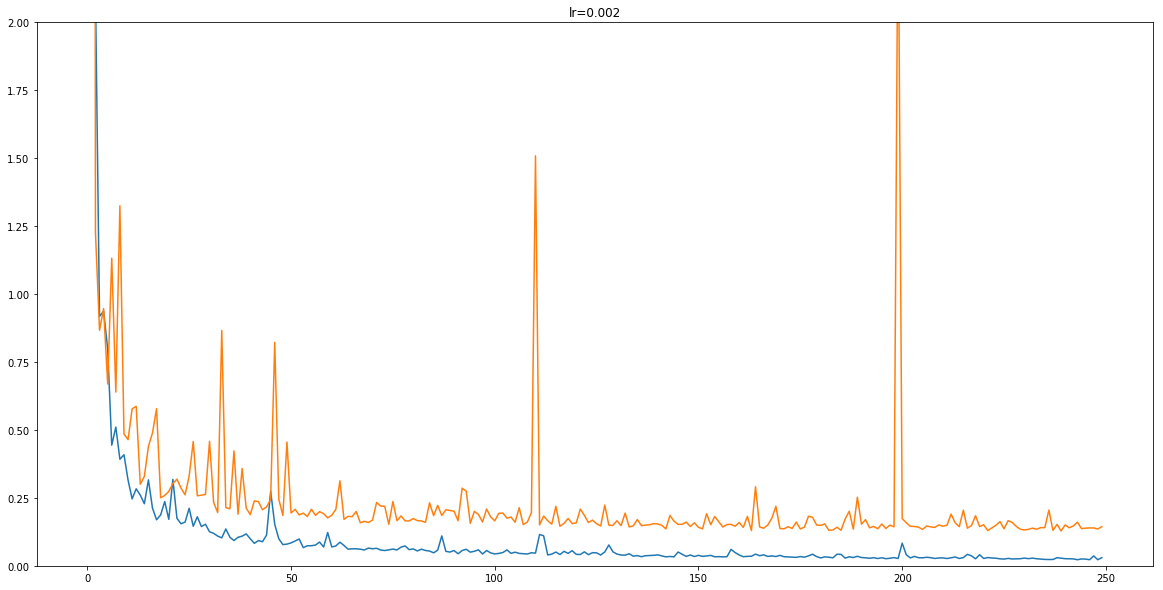

In [29]:
lr=0.002;
n_lr = 20;
learn_rate = np.linspace(1/n_lr,1,n_lr)*lr; #20 puntos de (0,1]
for i in learn_rate:
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=i),loss='mean_squared_error')
    history_relu = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
    plt.title('lr='+str(i));
    plt.plot(history_relu.history['loss'],label='train');
    plt.plot(history_relu.history['val_loss'],label='validation');
    plt.ylim([0,2])

plt.show();

El resultado es analogo a lo obtenido con activación sigmoide. Como es de esperar al aumentar el learning rate el modelo converge de manera más rapida, pero junto a esto se agrega "ruido". Junto a lo anterior, en este caso, se converge a un valor menor MSE en el validation set al aumentar el learning rate. El ruido es posible justificarlo con que exista un overshoot debido a que el paso es demasiado grande y por lo tanto se aleja del optimo en vez de lograr una mejora. En este caso el optimo es para lr=0.0004

> e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 155us/step - loss: 10.9966 - val_loss: 0.3586
Epoch 2/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.2803 - val_loss: 0.2585
Epoch 3/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.1995 - val_loss: 0.2005
Epoch 4/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1740 - val_loss: 0.1699
Epoch 5/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1589 - val_loss: 0.2737
Epoch 6/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1416 - val_loss: 0.1801
Epoch 7/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.1277 - val_loss: 0.1145
Epoch 8/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1060 - val_loss: 0.2714
Epoch 9/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.1136 - val_loss: 0.1058
Epoch 10/250
9

9745/9745 [==============================] - 1s 81us/step - loss: 0.0203 - val_loss: 0.0377
Epoch 156/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0195 - val_loss: 0.0669
Epoch 157/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0200 - val_loss: 0.0404
Epoch 158/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0191 - val_loss: 0.0402
Epoch 159/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0201 - val_loss: 0.0527
Epoch 160/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0206 - val_loss: 0.0469
Epoch 161/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0196 - val_loss: 0.0579
Epoch 162/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0204 - val_loss: 0.0386
Epoch 163/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0204 - val_loss: 0.0402
Epoch 164/250
9745/9745 [==============================] - 1

9745/9745 [==============================] - 1s 81us/step - loss: 0.1327 - val_loss: 1.1831
Epoch 60/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.1307 - val_loss: 0.2876
Epoch 61/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1236 - val_loss: 0.3109
Epoch 62/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.1200 - val_loss: 0.5197
Epoch 63/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1181 - val_loss: 0.3178
Epoch 64/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.1284 - val_loss: 0.4159
Epoch 65/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1730 - val_loss: 0.3225
Epoch 66/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1201 - val_loss: 0.2938
Epoch 67/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.1167 - val_loss: 0.2896
Epoch 68/250
9745/9745 [==============================] - 1s 80us/st

Epoch 137/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0677 - val_loss: 0.2624
Epoch 138/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0713 - val_loss: 0.2483
Epoch 139/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0696 - val_loss: 0.2343
Epoch 140/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0687 - val_loss: 0.2440
Epoch 141/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0682 - val_loss: 0.2671
Epoch 142/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0685 - val_loss: 0.3273
Epoch 143/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0738 - val_loss: 0.2421
Epoch 144/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0708 - val_loss: 0.2277
Epoch 145/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0669 - val_loss: 0.2255
Epoch 146/250
9745/9745 [=====================

9745/9745 [==============================] - 1s 81us/step - loss: 0.0341 - val_loss: 0.0460
Epoch 42/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0335 - val_loss: 0.0431
Epoch 43/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0334 - val_loss: 0.0526
Epoch 44/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0348 - val_loss: 0.0529
Epoch 45/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0322 - val_loss: 0.0465
Epoch 46/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0313 - val_loss: 0.1293
Epoch 47/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0317 - val_loss: 0.0483
Epoch 48/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0317 - val_loss: 0.0420
Epoch 49/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0313 - val_loss: 0.0488
Epoch 50/250
9745/9745 [==============================] - 1s 81us/st

Epoch 119/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0173 - val_loss: 0.0332
Epoch 120/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0171 - val_loss: 0.0350
Epoch 121/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0169 - val_loss: 0.0315
Epoch 122/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0170 - val_loss: 0.0315
Epoch 123/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0165 - val_loss: 0.0334
Epoch 124/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0172 - val_loss: 0.0314
Epoch 125/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0165 - val_loss: 0.0327
Epoch 126/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0170 - val_loss: 0.0318
Epoch 127/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0167 - val_loss: 0.0336
Epoch 128/250
9745/9745 [=====================

9745/9745 [==============================] - 1s 80us/step - loss: 0.0567 - val_loss: 0.0880
Epoch 24/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0548 - val_loss: 0.0873
Epoch 25/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0533 - val_loss: 0.0770
Epoch 26/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0523 - val_loss: 0.1210
Epoch 27/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0509 - val_loss: 0.1329
Epoch 28/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0499 - val_loss: 0.0955
Epoch 29/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0488 - val_loss: 0.0728
Epoch 30/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0479 - val_loss: 0.0730
Epoch 31/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0463 - val_loss: 0.0873
Epoch 32/250
9745/9745 [==============================] - 1s 81us/st

9745/9745 [==============================] - 1s 82us/step - loss: 0.0214 - val_loss: 0.0449
Epoch 179/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0214 - val_loss: 0.0454
Epoch 180/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0212 - val_loss: 0.0448
Epoch 181/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0213 - val_loss: 0.0449
Epoch 182/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0213 - val_loss: 0.0451
Epoch 183/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0211 - val_loss: 0.0450
Epoch 184/250
9745/9745 [==============================] - 1s 80us/step - loss: 0.0212 - val_loss: 0.0448
Epoch 185/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0212 - val_loss: 0.0454
Epoch 186/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0210 - val_loss: 0.0449
Epoch 187/250
9745/9745 [==============================] - 1

9745/9745 [==============================] - 1s 81us/step - loss: 0.1597 - val_loss: 0.1741
Epoch 6/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1414 - val_loss: 0.1349
Epoch 7/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.1262 - val_loss: 0.1530
Epoch 8/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.1161 - val_loss: 0.1353
Epoch 9/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.1067 - val_loss: 0.1103
Epoch 10/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0995 - val_loss: 0.1083
Epoch 11/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0929 - val_loss: 0.1138
Epoch 12/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0887 - val_loss: 0.1004
Epoch 13/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0835 - val_loss: 0.0944
Epoch 14/250
9745/9745 [==============================] - 1s 81us/step -

9745/9745 [==============================] - 1s 81us/step - loss: 0.0353 - val_loss: 0.0532
Epoch 161/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0352 - val_loss: 0.0524
Epoch 162/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0352 - val_loss: 0.0524
Epoch 163/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0351 - val_loss: 0.0524
Epoch 164/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0351 - val_loss: 0.0524
Epoch 165/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0350 - val_loss: 0.0519
Epoch 166/250
9745/9745 [==============================] - 1s 81us/step - loss: 0.0350 - val_loss: 0.0521
Epoch 167/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.0349 - val_loss: 0.0520
Epoch 168/250
9745/9745 [==============================] - 1s 84us/step - loss: 0.0349 - val_loss: 0.0521
Epoch 169/250
9745/9745 [==============================] - 1

9745/9745 [==============================] - 1s 82us/step - loss: 2.4182 - val_loss: 4.2788
Epoch 65/250
9745/9745 [==============================] - 1s 83us/step - loss: 2.4099 - val_loss: 4.2718
Epoch 66/250
9745/9745 [==============================] - 1s 82us/step - loss: 2.4047 - val_loss: 4.2673
Epoch 67/250
9745/9745 [==============================] - 1s 83us/step - loss: 2.3952 - val_loss: 4.2655
Epoch 68/250
9745/9745 [==============================] - 1s 82us/step - loss: 2.3894 - val_loss: 4.2523
Epoch 69/250
9745/9745 [==============================] - 1s 83us/step - loss: 2.3837 - val_loss: 4.2368
Epoch 70/250
9745/9745 [==============================] - 1s 83us/step - loss: 2.3781 - val_loss: 4.2249
Epoch 71/250
9745/9745 [==============================] - 1s 82us/step - loss: 2.3716 - val_loss: 4.2163
Epoch 72/250
9745/9745 [==============================] - 1s 82us/step - loss: 2.3633 - val_loss: 4.2151
Epoch 73/250
9745/9745 [==============================] - 1s 82us/st

9745/9745 [==============================] - 1s 83us/step - loss: 1.9741 - val_loss: 3.6897
Epoch 219/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.9730 - val_loss: 3.6878
Epoch 220/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.9710 - val_loss: 3.6866
Epoch 221/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.9705 - val_loss: 3.6840
Epoch 222/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.9691 - val_loss: 3.6822
Epoch 223/250
9745/9745 [==============================] - 1s 82us/step - loss: 1.9677 - val_loss: 3.6803
Epoch 224/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.9667 - val_loss: 3.6794
Epoch 225/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.9653 - val_loss: 3.6768
Epoch 226/250
9745/9745 [==============================] - 1s 86us/step - loss: 1.9636 - val_loss: 3.6765
Epoch 227/250
9745/9745 [==============================] - 1

Epoch 123/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.2581 - val_loss: 0.2907
Epoch 124/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.2578 - val_loss: 0.2903
Epoch 125/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.2575 - val_loss: 0.2901
Epoch 126/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.2572 - val_loss: 0.2898
Epoch 127/250
9745/9745 [==============================] - 1s 84us/step - loss: 0.2570 - val_loss: 0.2896
Epoch 128/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.2567 - val_loss: 0.2894
Epoch 129/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.2564 - val_loss: 0.2890
Epoch 130/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.2562 - val_loss: 0.2885
Epoch 131/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.2559 - val_loss: 0.2881
Epoch 132/250
9745/9745 [=====================

9745/9745 [==============================] - 1s 83us/step - loss: 0.5816 - val_loss: 0.5142
Epoch 28/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5799 - val_loss: 0.5127
Epoch 29/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.5783 - val_loss: 0.5117
Epoch 30/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5767 - val_loss: 0.5104
Epoch 31/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5752 - val_loss: 0.5091
Epoch 32/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5738 - val_loss: 0.5077
Epoch 33/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.5725 - val_loss: 0.5069
Epoch 34/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5711 - val_loss: 0.5059
Epoch 35/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5698 - val_loss: 0.5046
Epoch 36/250
9745/9745 [==============================] - 1s 83us/st

9745/9745 [==============================] - 1s 83us/step - loss: 0.5264 - val_loss: 0.4679
Epoch 106/250
9745/9745 [==============================] - 1s 84us/step - loss: 0.5260 - val_loss: 0.4676
Epoch 107/250
9745/9745 [==============================] - 1s 82us/step - loss: 0.5257 - val_loss: 0.4673
Epoch 108/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5254 - val_loss: 0.4671
Epoch 109/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5250 - val_loss: 0.4668
Epoch 110/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5247 - val_loss: 0.4665
Epoch 111/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5244 - val_loss: 0.4663
Epoch 112/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5241 - val_loss: 0.4660
Epoch 113/250
9745/9745 [==============================] - 1s 83us/step - loss: 0.5238 - val_loss: 0.4657
Epoch 114/250
9745/9745 [==============================] - 1

9745/9745 [==============================] - 1s 84us/step - loss: 1.3375 - val_loss: 1.1708
Epoch 10/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.3249 - val_loss: 1.1598
Epoch 11/250
9745/9745 [==============================] - 1s 85us/step - loss: 1.3138 - val_loss: 1.1494
Epoch 12/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.3039 - val_loss: 1.1402
Epoch 13/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.2950 - val_loss: 1.1318
Epoch 14/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.2869 - val_loss: 1.1249
Epoch 15/250
9745/9745 [==============================] - 1s 85us/step - loss: 1.2795 - val_loss: 1.1179
Epoch 16/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.2727 - val_loss: 1.1117
Epoch 17/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.2664 - val_loss: 1.1062
Epoch 18/250
9745/9745 [==============================] - 1s 84us/st

9745/9745 [==============================] - 1s 84us/step - loss: 1.0799 - val_loss: 0.9332
Epoch 165/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.0795 - val_loss: 0.9328
Epoch 166/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.0791 - val_loss: 0.9325
Epoch 167/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.0787 - val_loss: 0.9321
Epoch 168/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.0783 - val_loss: 0.9317
Epoch 169/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.0779 - val_loss: 0.9314
Epoch 170/250
9745/9745 [==============================] - 1s 90us/step - loss: 1.0775 - val_loss: 0.9310
Epoch 171/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.0771 - val_loss: 0.9306
Epoch 172/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.0768 - val_loss: 0.9303
Epoch 173/250
9745/9745 [==============================] - 1

9745/9745 [==============================] - 1s 85us/step - loss: 1.4404 - val_loss: 1.2796
Epoch 69/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4399 - val_loss: 1.2791
Epoch 70/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4394 - val_loss: 1.2787
Epoch 71/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4390 - val_loss: 1.2782
Epoch 72/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.4385 - val_loss: 1.2777
Epoch 73/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4381 - val_loss: 1.2773
Epoch 74/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4377 - val_loss: 1.2769
Epoch 75/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.4372 - val_loss: 1.2764
Epoch 76/250
9745/9745 [==============================] - 1s 85us/step - loss: 1.4368 - val_loss: 1.2760
Epoch 77/250
9745/9745 [==============================] - 1s 84us/st

9745/9745 [==============================] - 1s 85us/step - loss: 1.4040 - val_loss: 1.2429
Epoch 223/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4039 - val_loss: 1.2428
Epoch 224/250
9745/9745 [==============================] - 1s 85us/step - loss: 1.4037 - val_loss: 1.2427
Epoch 225/250
9745/9745 [==============================] - 1s 83us/step - loss: 1.4036 - val_loss: 1.2426
Epoch 226/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4035 - val_loss: 1.2424
Epoch 227/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4034 - val_loss: 1.2423
Epoch 228/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4032 - val_loss: 1.2422
Epoch 229/250
9745/9745 [==============================] - 1s 85us/step - loss: 1.4031 - val_loss: 1.2420
Epoch 230/250
9745/9745 [==============================] - 1s 84us/step - loss: 1.4030 - val_loss: 1.2419
Epoch 231/250
9745/9745 [==============================] - 1

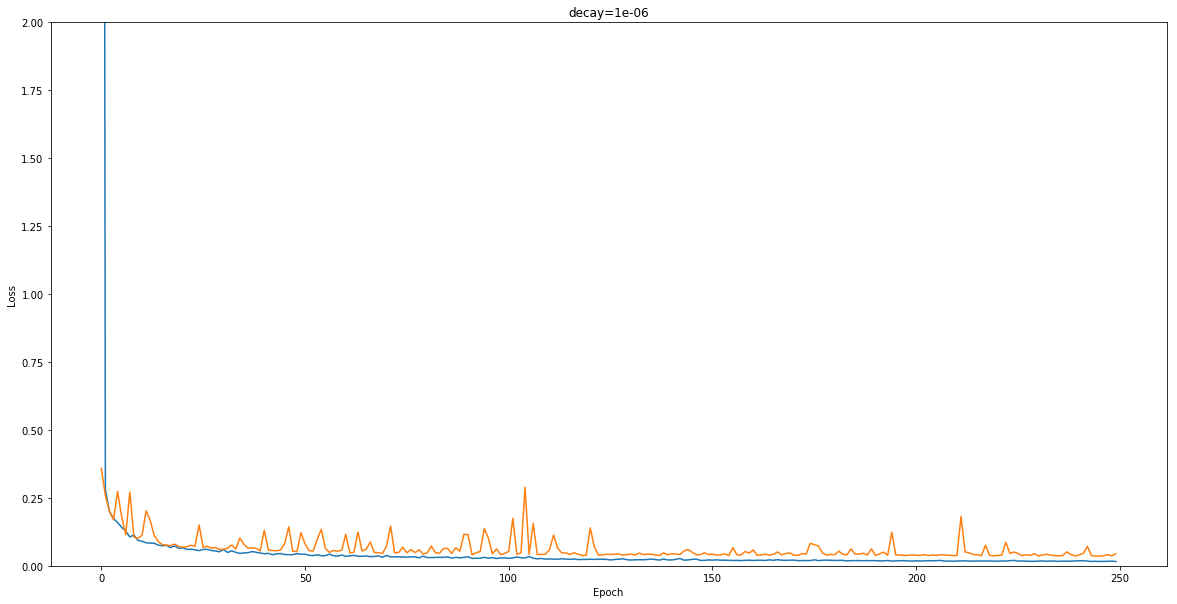

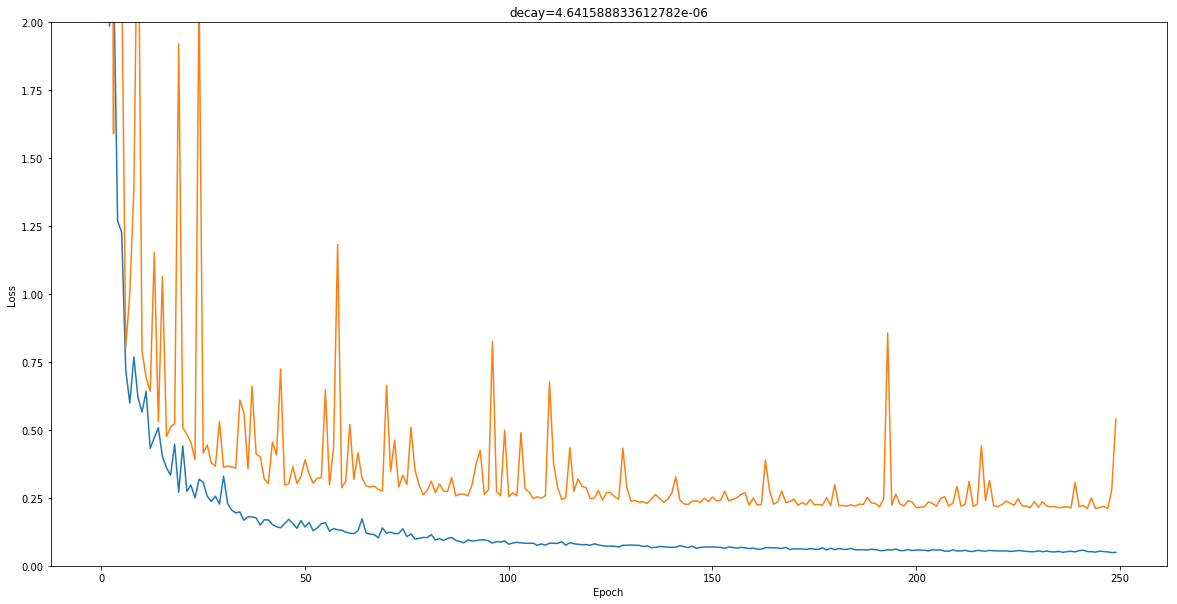

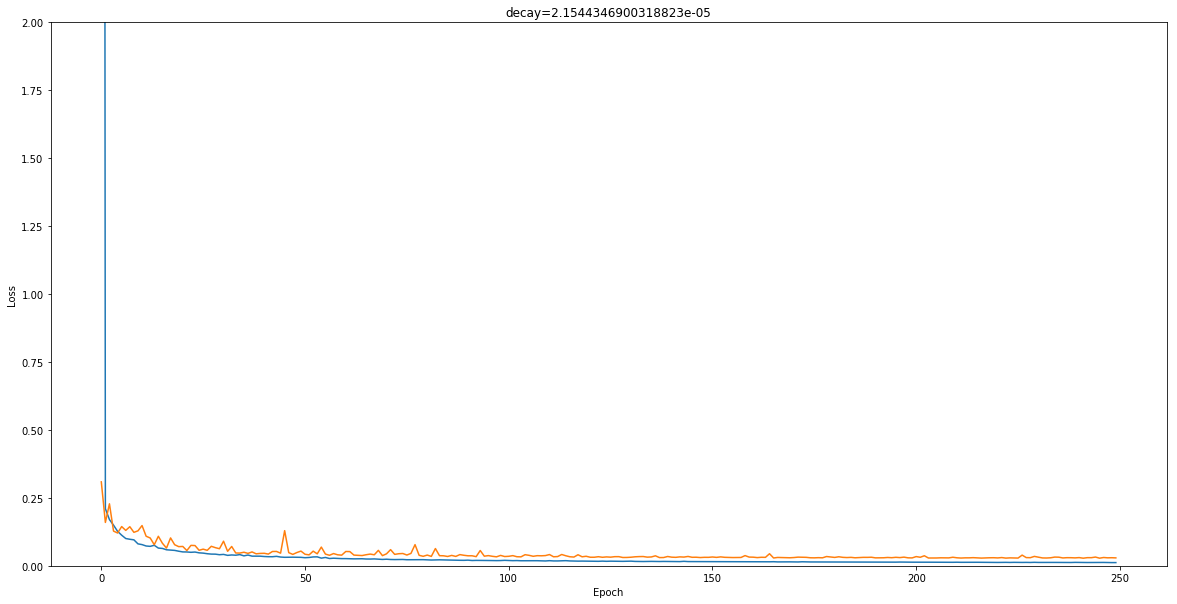

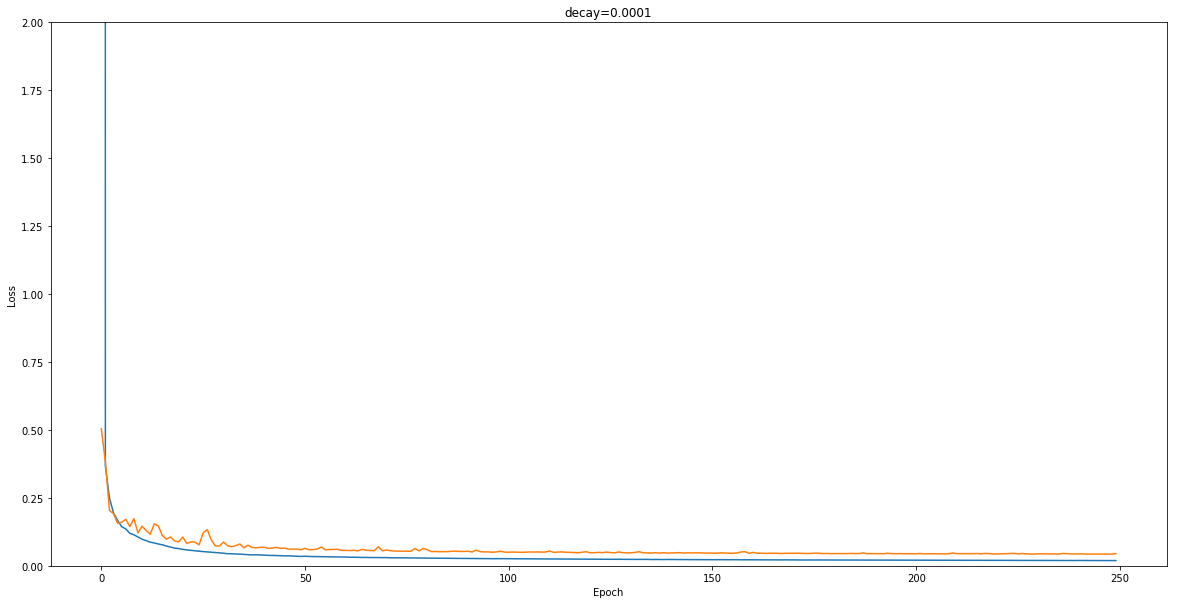

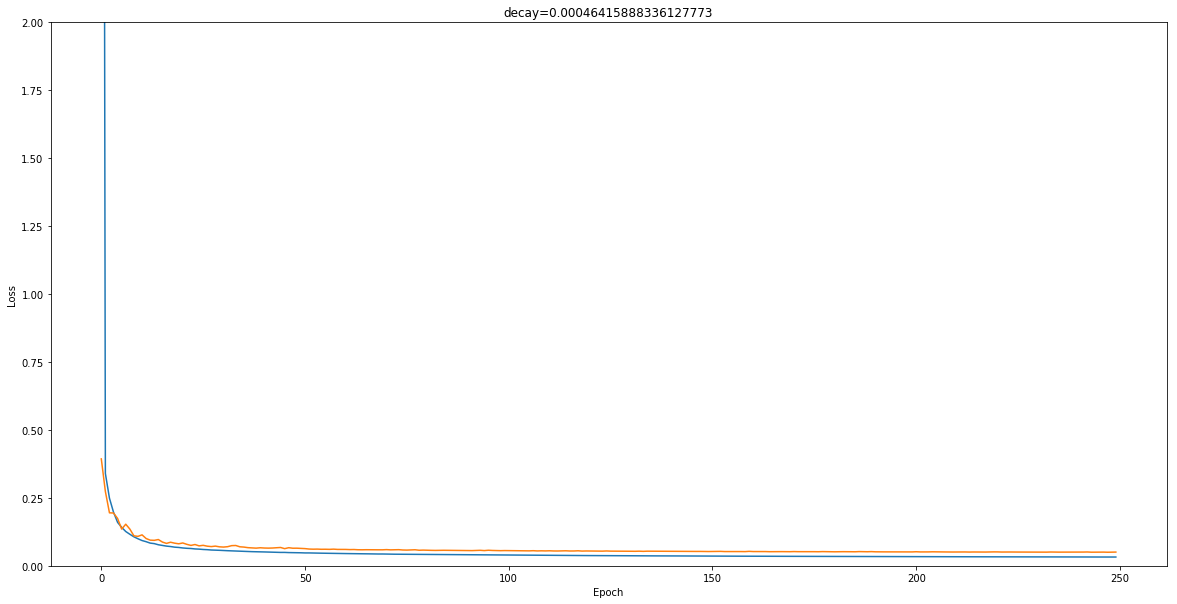

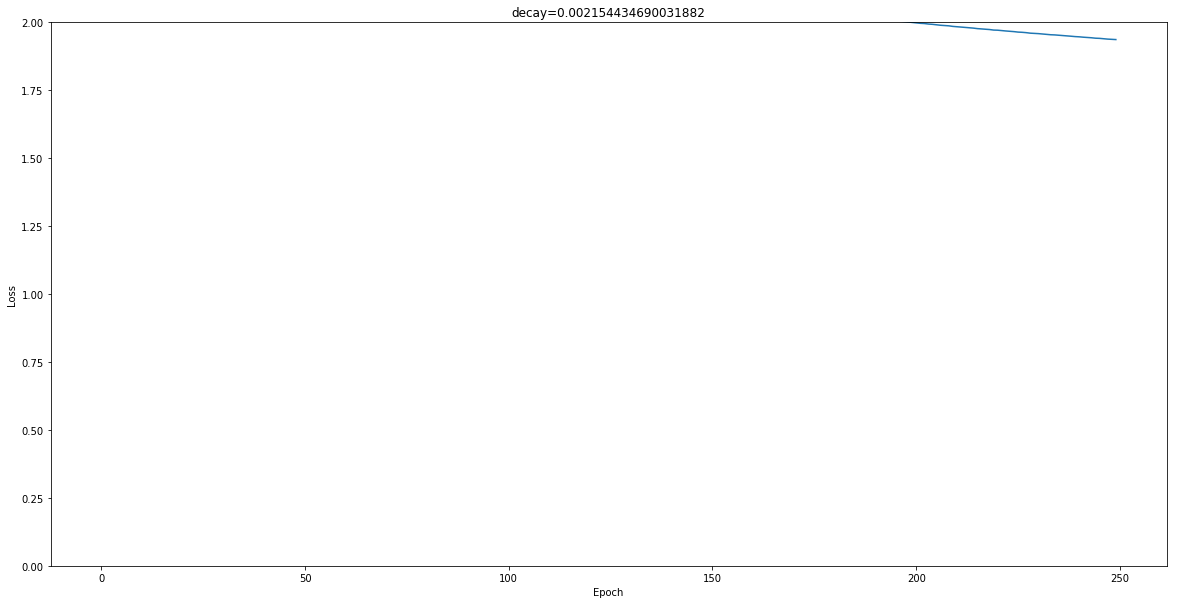

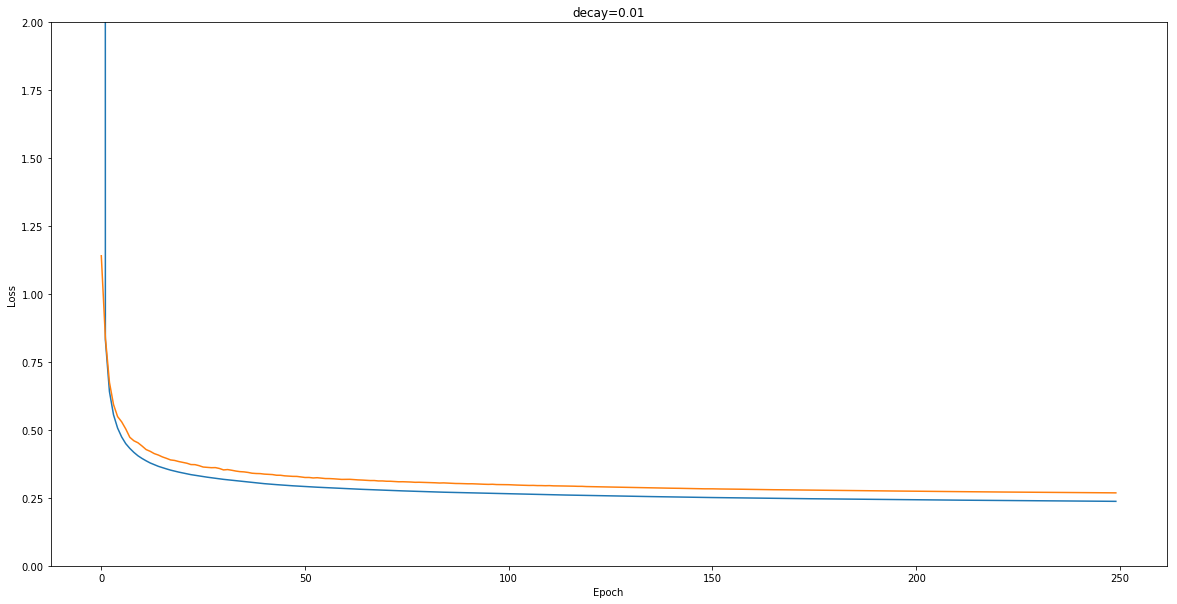

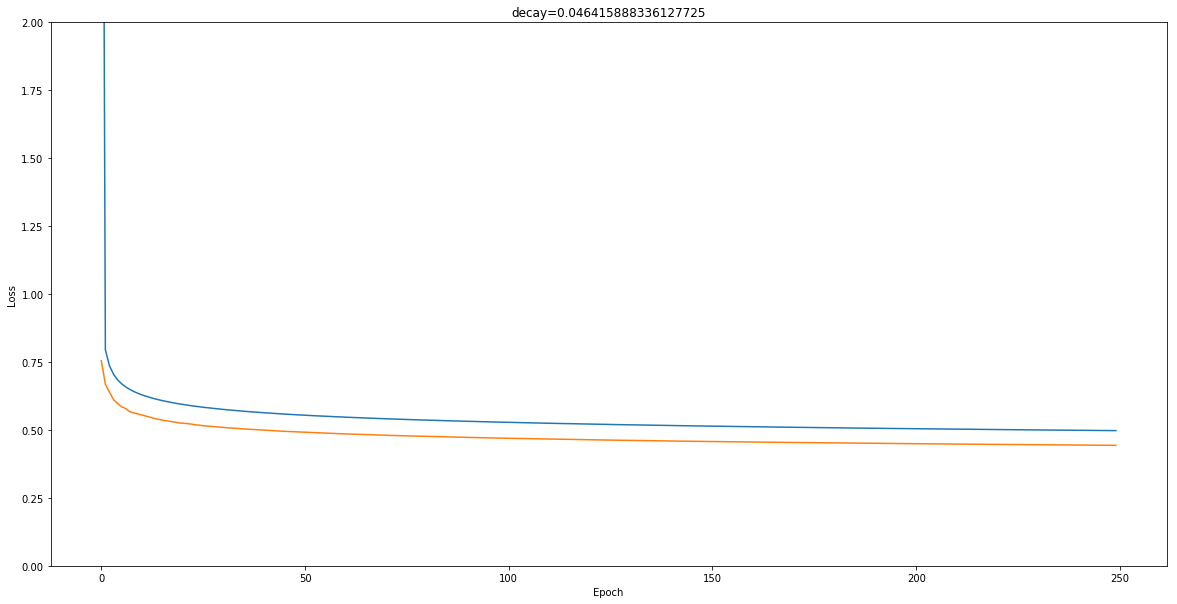

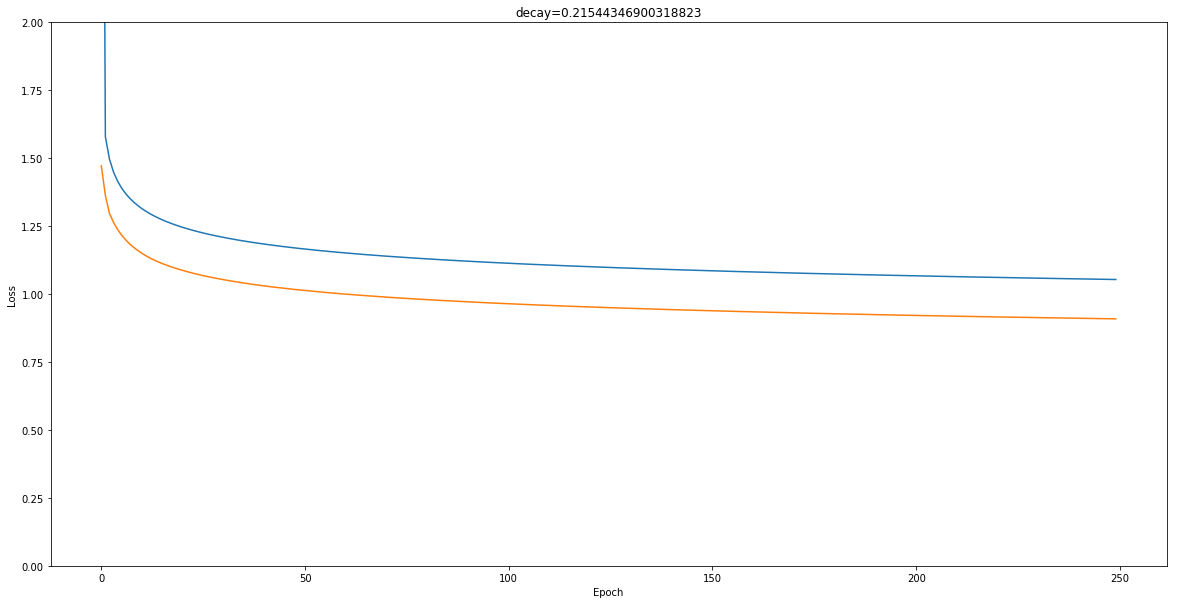

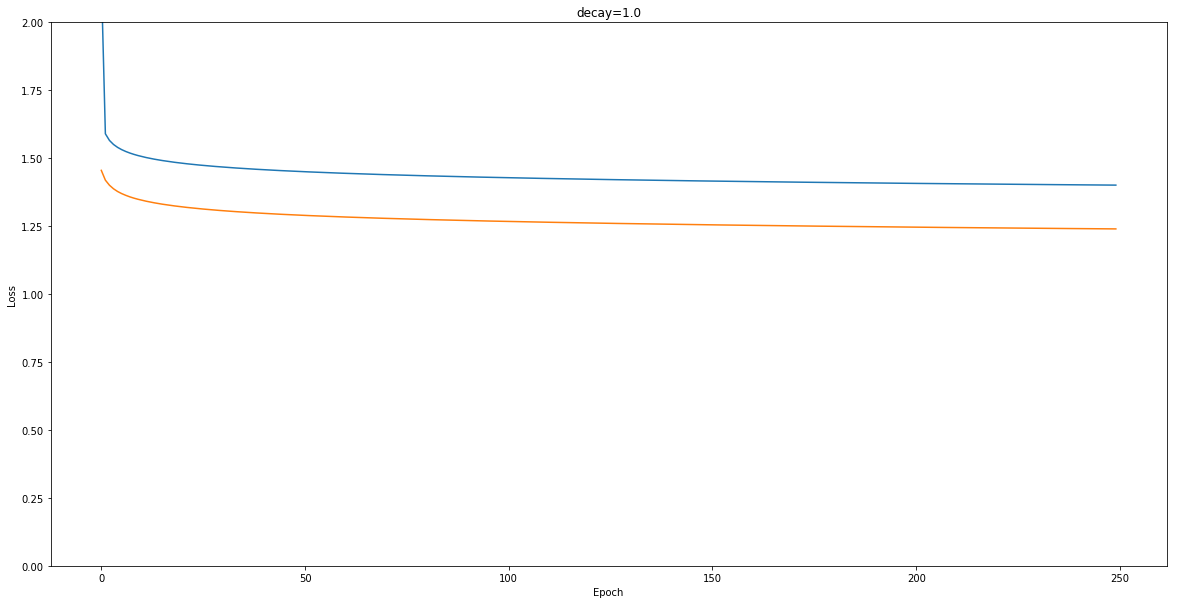

In [30]:
n_decay = 10;
lear_decay = np.logspace(-6,0,n_decay);

for i in lear_decay:
    sgd = SGD(lr=0.02, decay=i);
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=sgd,loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
    plt.plot(history.history['loss'],label='train');
    plt.plot(history.history['val_loss'],label='validation');
    plt.title("decay="+str(i));
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.ylim([0,2]);
    
plt.show();

*Hay algunas imagenes que no corresponden. <br>
Independiente del aparente error que se produjo en un par de plots es posible observar que con un learing rate decay se logra suavizar la curva MSE, pero eso a un costo en rendimiento. Para valores pequeños de decay se obtiene un buen rendimiento(no cae), y con un buen suavizado.

lr_decay=1e-06
lr_decay=4.641588833612782e-06
lr_decay=2.1544346900318823e-05
lr_decay=0.0001
lr_decay=0.00046415888336127773
lr_decay=0.002154434690031882
lr_decay=0.01
lr_decay=0.046415888336127725
lr_decay=0.21544346900318823
lr_decay=1.0


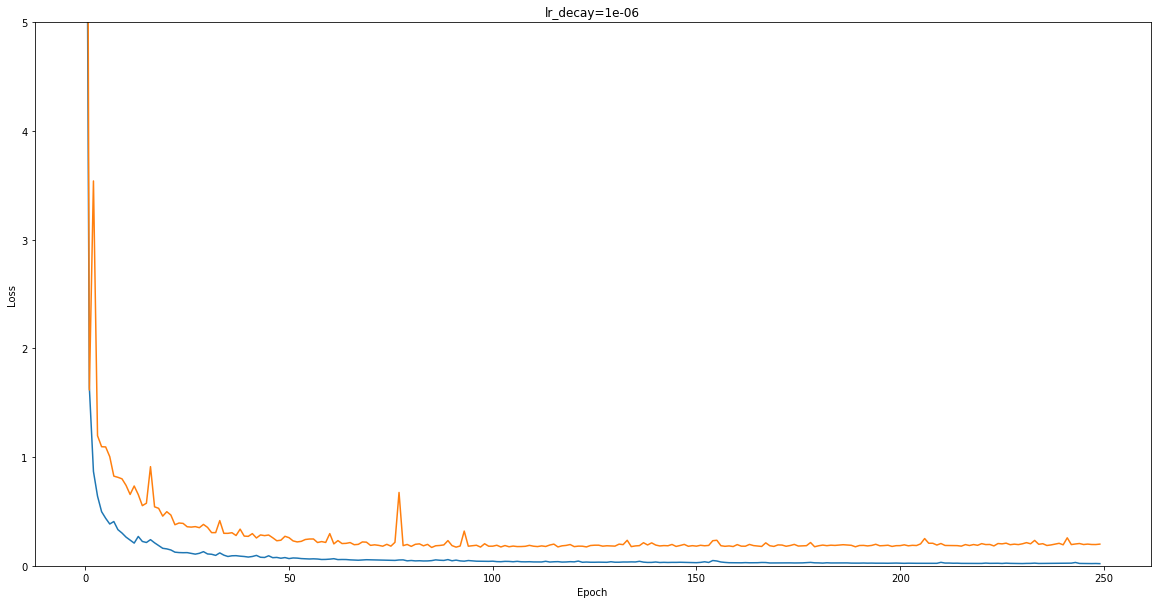

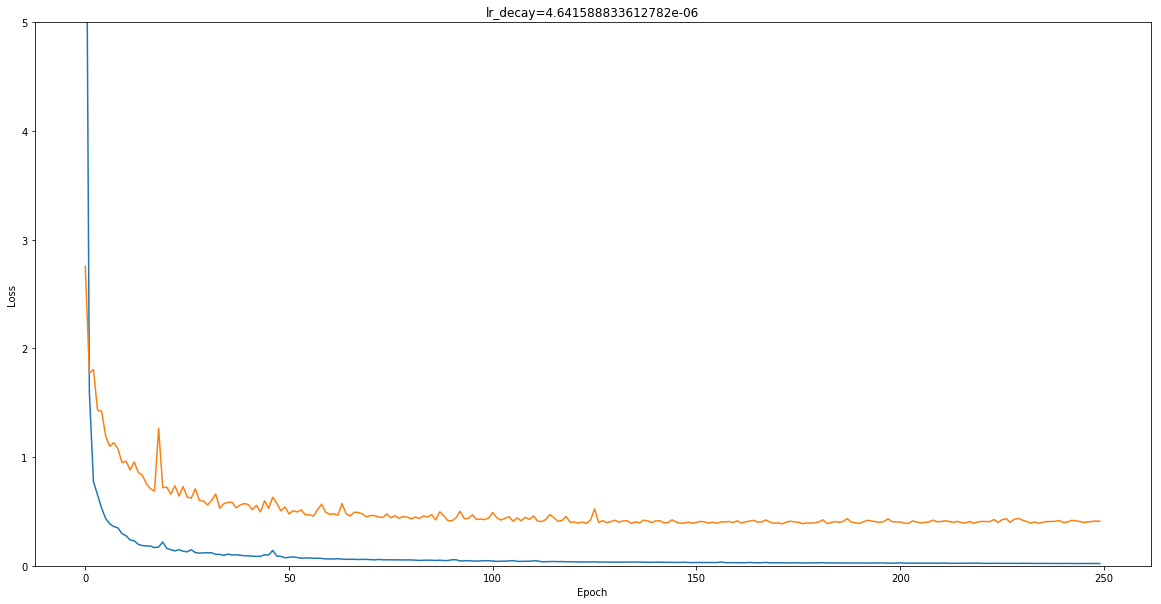

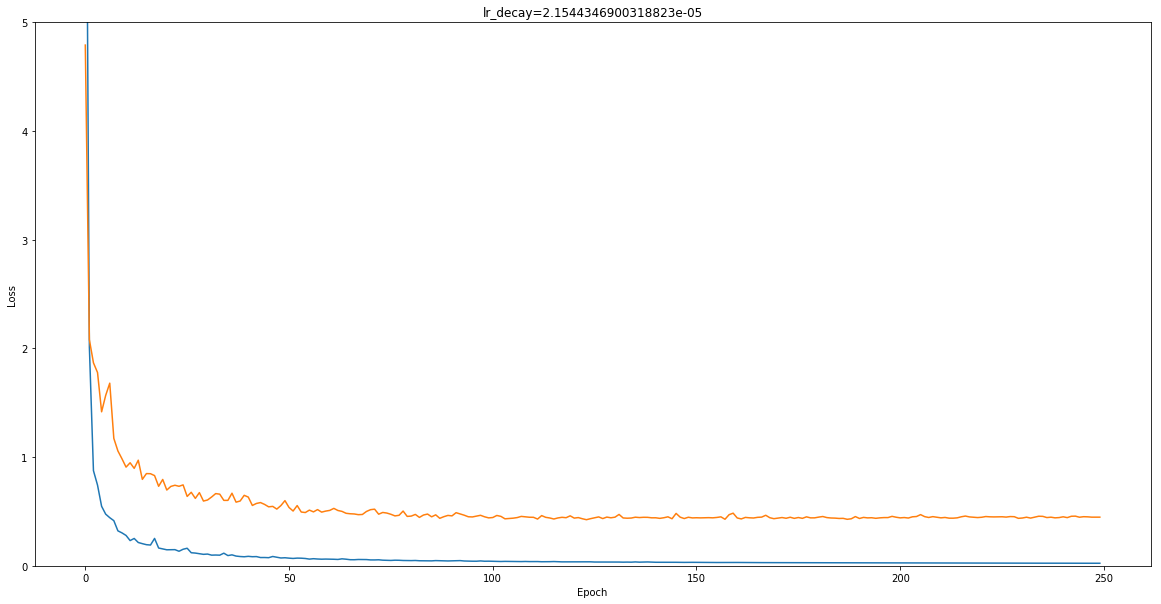

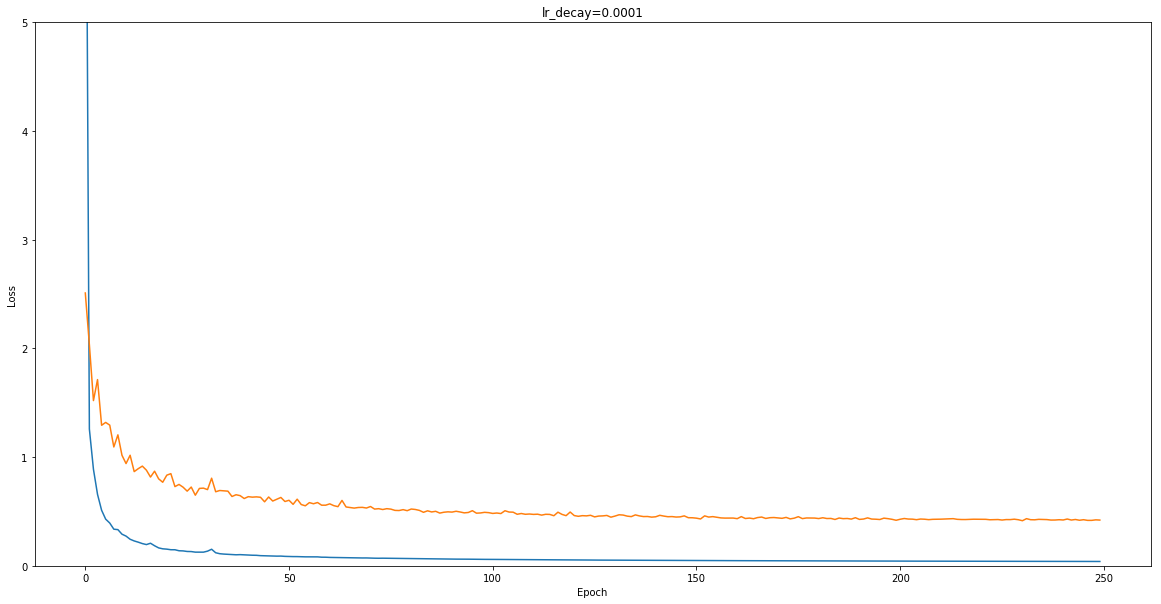

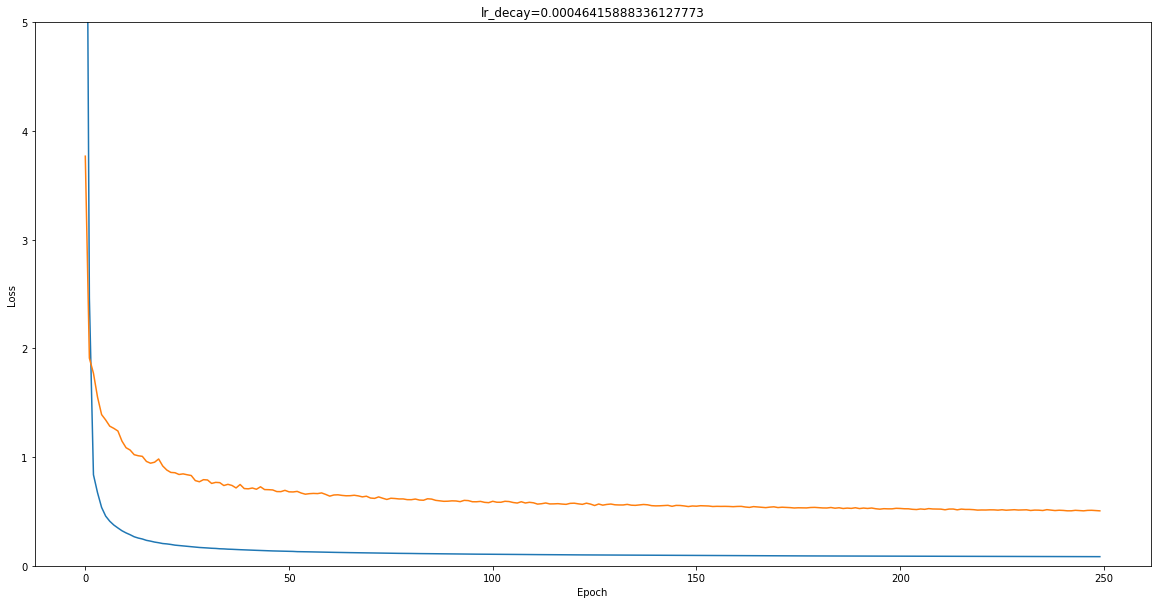

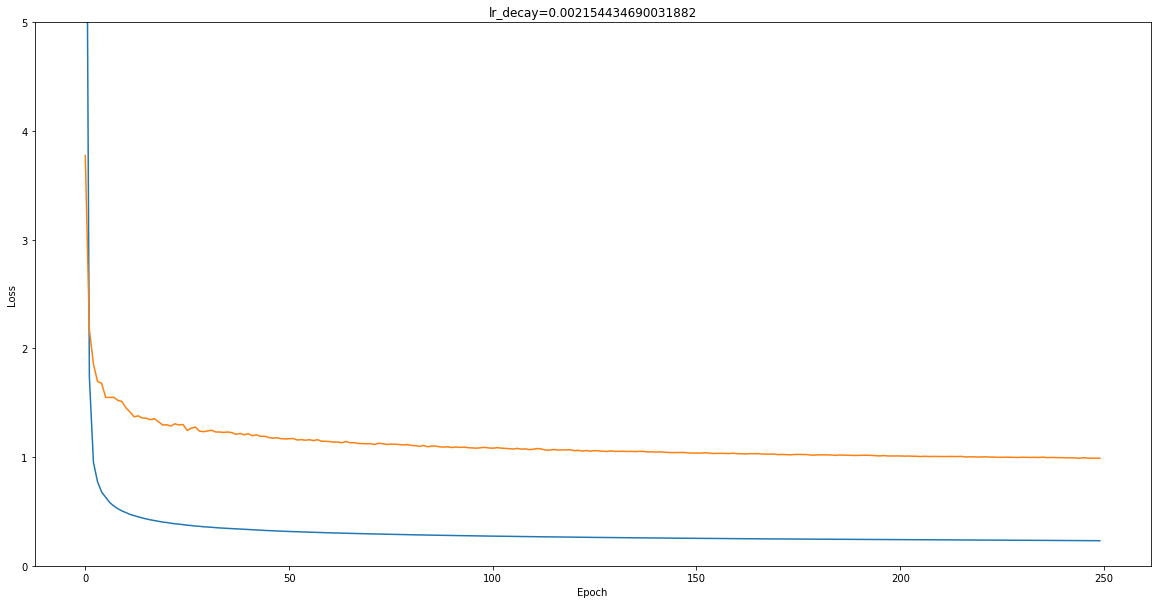

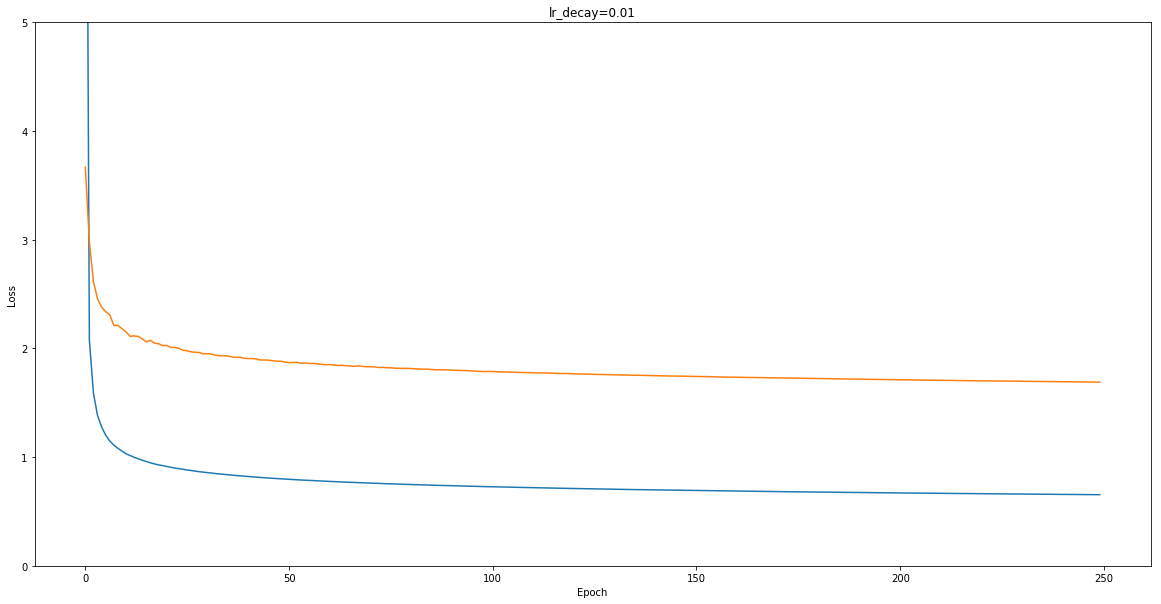

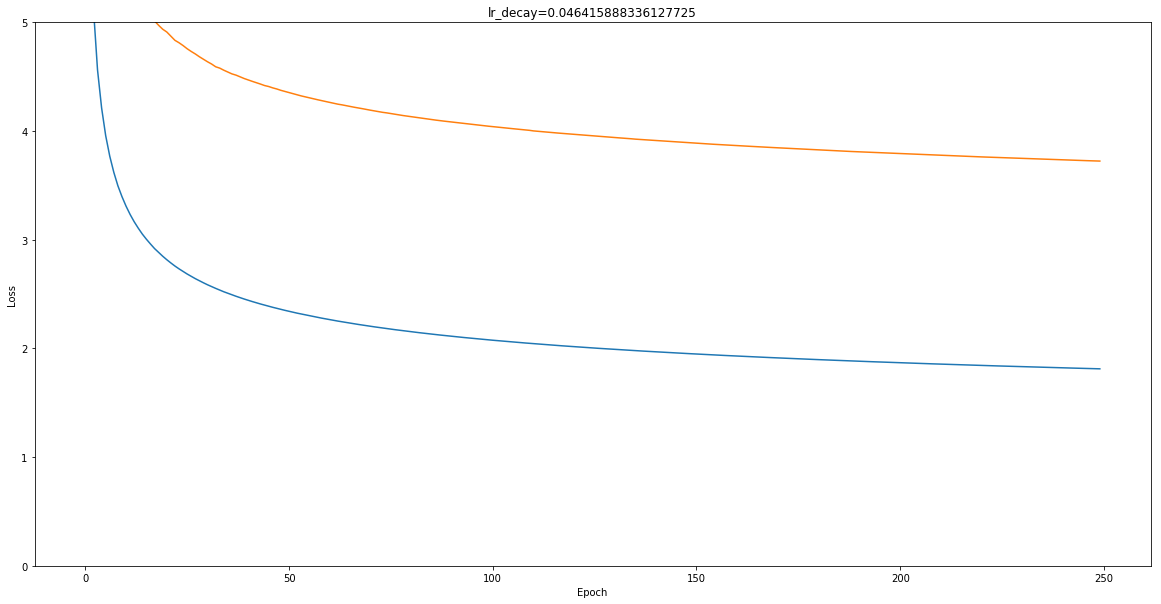

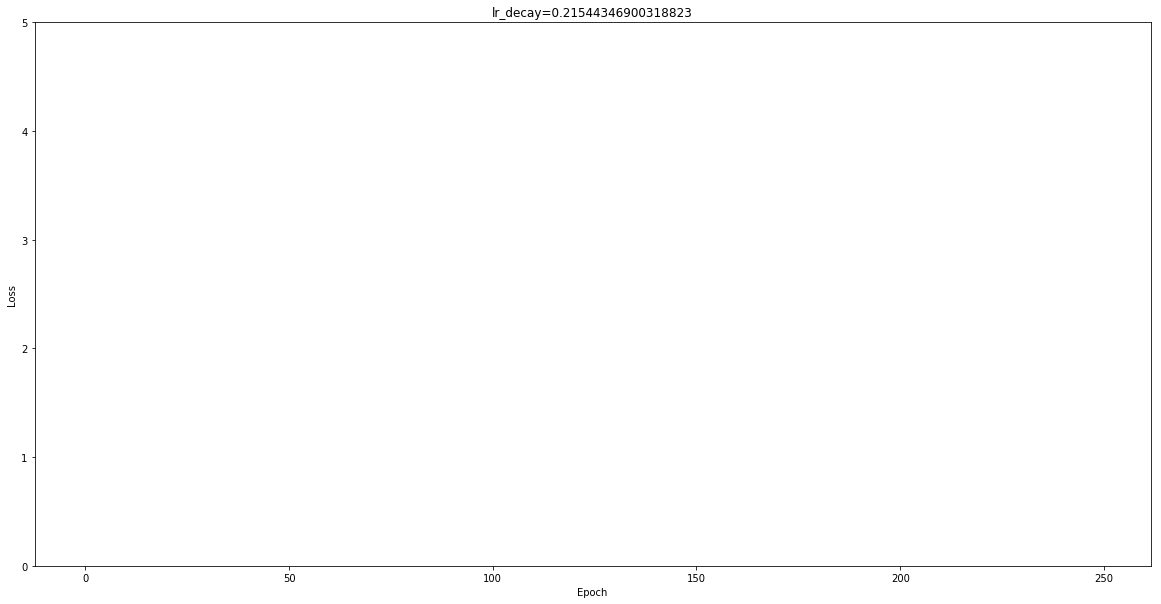

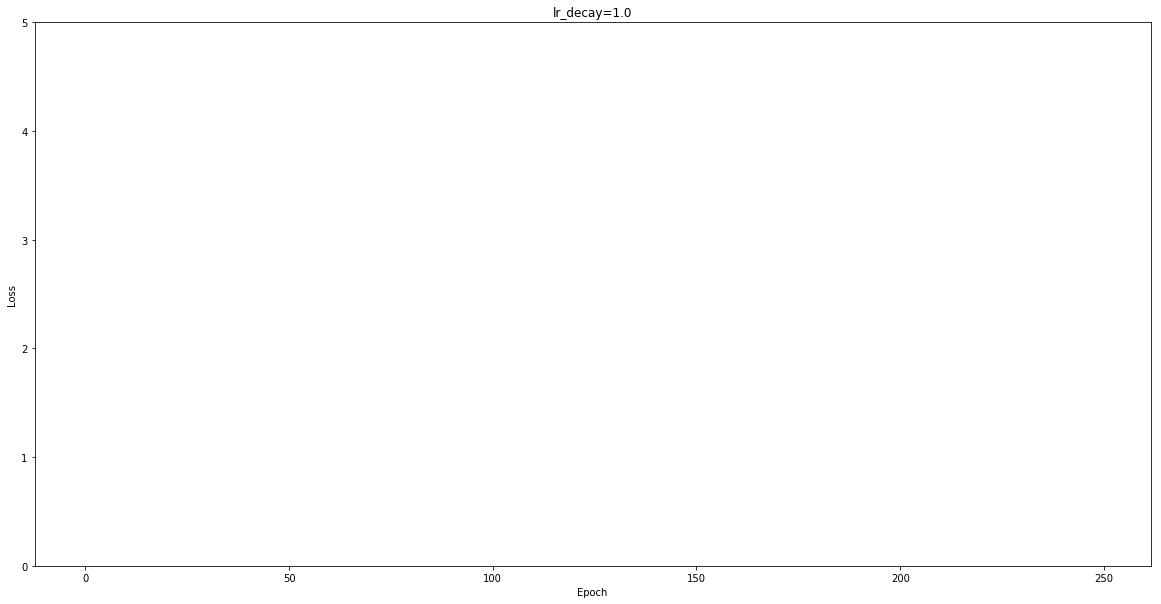

In [31]:

for i in lear_decay:
    sgd = SGD(lr=0.001, decay=i);   
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=sgd,loss='mean_squared_error')
    history_relu = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
    print('lr_decay='+str(i))
    plt.plot(history_relu.history['loss'],label='train');
    plt.plot(history_relu.history['val_loss'],label='validation');
    plt.title('lr_decay='+str(i))
    plt.ylabel('Loss');
    plt.xlabel('Epoch')
    plt.ylim([0,5]);
    
plt.show();

Los resultados son analogos para RELU, esta tiene un buen desempeño solo para el menor valor de decay, ya que el resto baja mucho el rendimiento en el validation set. Lo anterior se debe a que el valor inicial de learning rate es muy pequeño.

> f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.

In [32]:
n_batches = 7
batch_sizes = [16*2**i for i in range(n_batches)];
#model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 2s - loss: 1.0931 - val_loss: 0.7958
Epoch 2/250
 - 1s - loss: 0.4999 - val_loss: 0.6790
Epoch 3/250
 - 1s - loss: 0.3676 - val_loss: 0.2893
Epoch 4/250
 - 1s - loss: 0.2940 - val_loss: 0.4044
Epoch 5/250
 - 1s - loss: 0.2382 - val_loss: 0.2039
Epoch 6/250
 - 1s - loss: 0.2051 - val_loss: 0.4933
Epoch 7/250
 - 1s - loss: 0.1697 - val_loss: 0.1477
Epoch 8/250
 - 1s - loss: 0.1451 - val_loss: 0.2952
Epoch 9/250
 - 1s - loss: 0.1267 - val_loss: 4.0274
Epoch 10/250
 - 1s - loss: 0.1237 - val_loss: 0.1095
Epoch 11/250
 - 1s - loss: 0.1007 - val_loss: 0.1465
Epoch 12/250
 - 1s - loss: 0.0883 - val_loss: 0.1580
Epoch 13/250
 - 1s - loss: 0.0849 - val_loss: 0.0895
Epoch 14/250
 - 1s - loss: 0.0781 - val_loss: 0.0998
Epoch 15/250
 - 1s - loss: 0.0741 - val_loss: 0.6811
Epoch 16/250
 - 1s - loss: 0.0703 - val_loss: 0.0820
Epoch 17/250
 - 1s - loss: 0.0646 - val_loss: 0.1131
Epoch 18/250
 - 1s - loss: 0.0601 - val_loss: 0.0826
Epoch 1

Epoch 154/250
 - 1s - loss: 0.0148 - val_loss: 0.0588
Epoch 155/250
 - 1s - loss: 0.0147 - val_loss: 0.0541
Epoch 156/250
 - 1s - loss: 0.0141 - val_loss: 0.0488
Epoch 157/250
 - 1s - loss: 0.0151 - val_loss: 0.0358
Epoch 158/250
 - 1s - loss: 0.0151 - val_loss: 0.0376
Epoch 159/250
 - 1s - loss: 0.0149 - val_loss: 0.0966
Epoch 160/250
 - 1s - loss: 0.0152 - val_loss: 0.0565
Epoch 161/250
 - 1s - loss: 0.0145 - val_loss: 0.0368
Epoch 162/250
 - 1s - loss: 0.0144 - val_loss: 0.0452
Epoch 163/250
 - 1s - loss: 0.0139 - val_loss: 0.0813
Epoch 164/250
 - 1s - loss: 0.0141 - val_loss: 0.0369
Epoch 165/250
 - 1s - loss: 0.0160 - val_loss: 0.0511
Epoch 166/250
 - 1s - loss: 0.0142 - val_loss: 0.0354
Epoch 167/250
 - 1s - loss: 0.0146 - val_loss: 0.0562
Epoch 168/250
 - 1s - loss: 0.0149 - val_loss: 0.2180
Epoch 169/250
 - 1s - loss: 0.0146 - val_loss: 0.0660
Epoch 170/250
 - 1s - loss: 0.0146 - val_loss: 0.0481
Epoch 171/250
 - 1s - loss: 0.0138 - val_loss: 0.0458
Epoch 172/250
 - 1s - loss: 

Epoch 56/250
 - 1s - loss: 0.0379 - val_loss: 0.0671
Epoch 57/250
 - 1s - loss: 0.0365 - val_loss: 0.0510
Epoch 58/250
 - 1s - loss: 0.0357 - val_loss: 0.0486
Epoch 59/250
 - 1s - loss: 0.0361 - val_loss: 0.0555
Epoch 60/250
 - 1s - loss: 0.0354 - val_loss: 0.0482
Epoch 61/250
 - 1s - loss: 0.0349 - val_loss: 0.0511
Epoch 62/250
 - 1s - loss: 0.0344 - val_loss: 0.0523
Epoch 63/250
 - 1s - loss: 0.0338 - val_loss: 0.0643
Epoch 64/250
 - 1s - loss: 0.0352 - val_loss: 0.0593
Epoch 65/250
 - 1s - loss: 0.0343 - val_loss: 0.0476
Epoch 66/250
 - 1s - loss: 0.0340 - val_loss: 0.0607
Epoch 67/250
 - 1s - loss: 0.0335 - val_loss: 0.0462
Epoch 68/250
 - 1s - loss: 0.0327 - val_loss: 0.0481
Epoch 69/250
 - 1s - loss: 0.0324 - val_loss: 0.0469
Epoch 70/250
 - 1s - loss: 0.0327 - val_loss: 0.0456
Epoch 71/250
 - 1s - loss: 0.0321 - val_loss: 0.0580
Epoch 72/250
 - 1s - loss: 0.0321 - val_loss: 0.0563
Epoch 73/250
 - 1s - loss: 0.0325 - val_loss: 0.0472
Epoch 74/250
 - 1s - loss: 0.0320 - val_loss: 

Epoch 209/250
 - 1s - loss: 0.0169 - val_loss: 0.0314
Epoch 210/250
 - 1s - loss: 0.0168 - val_loss: 0.0345
Epoch 211/250
 - 1s - loss: 0.0164 - val_loss: 0.0331
Epoch 212/250
 - 1s - loss: 0.0165 - val_loss: 0.0482
Epoch 213/250
 - 1s - loss: 0.0167 - val_loss: 0.0329
Epoch 214/250
 - 1s - loss: 0.0165 - val_loss: 0.0396
Epoch 215/250
 - 1s - loss: 0.0162 - val_loss: 0.0323
Epoch 216/250
 - 1s - loss: 0.0166 - val_loss: 0.0326
Epoch 217/250
 - 1s - loss: 0.0168 - val_loss: 0.0463
Epoch 218/250
 - 1s - loss: 0.0162 - val_loss: 0.0370
Epoch 219/250
 - 1s - loss: 0.0162 - val_loss: 0.0350
Epoch 220/250
 - 1s - loss: 0.0163 - val_loss: 0.0317
Epoch 221/250
 - 1s - loss: 0.0162 - val_loss: 0.0329
Epoch 222/250
 - 1s - loss: 0.0162 - val_loss: 0.0319
Epoch 223/250
 - 1s - loss: 0.0158 - val_loss: 0.0336
Epoch 224/250
 - 1s - loss: 0.0158 - val_loss: 0.0307
Epoch 225/250
 - 1s - loss: 0.0161 - val_loss: 0.0359
Epoch 226/250
 - 1s - loss: 0.0168 - val_loss: 0.0348
Epoch 227/250
 - 1s - loss: 

Epoch 112/250
 - 1s - loss: 0.0350 - val_loss: 0.0505
Epoch 113/250
 - 1s - loss: 0.0353 - val_loss: 0.0578
Epoch 114/250
 - 1s - loss: 0.0333 - val_loss: 0.0513
Epoch 115/250
 - 1s - loss: 0.0352 - val_loss: 0.0745
Epoch 116/250
 - 1s - loss: 0.0337 - val_loss: 0.0719
Epoch 117/250
 - 1s - loss: 0.0336 - val_loss: 0.0831
Epoch 118/250
 - 1s - loss: 0.0333 - val_loss: 0.0511
Epoch 119/250
 - 1s - loss: 0.0334 - val_loss: 0.0538
Epoch 120/250
 - 1s - loss: 0.0325 - val_loss: 0.0529
Epoch 121/250
 - 1s - loss: 0.0323 - val_loss: 0.0551
Epoch 122/250
 - 1s - loss: 0.0327 - val_loss: 0.0541
Epoch 123/250
 - 1s - loss: 0.0330 - val_loss: 0.0536
Epoch 124/250
 - 1s - loss: 0.0324 - val_loss: 0.0521
Epoch 125/250
 - 1s - loss: 0.0323 - val_loss: 0.0530
Epoch 126/250
 - 1s - loss: 0.0323 - val_loss: 0.0524
Epoch 127/250
 - 1s - loss: 0.0320 - val_loss: 0.0694
Epoch 128/250
 - 1s - loss: 0.0322 - val_loss: 0.0529
Epoch 129/250
 - 1s - loss: 0.0316 - val_loss: 0.0583
Epoch 130/250
 - 1s - loss: 

 - 0s - loss: 0.4172 - val_loss: 0.3708
Epoch 14/250
 - 0s - loss: 0.4023 - val_loss: 0.3410
Epoch 15/250
 - 0s - loss: 0.3875 - val_loss: 0.3839
Epoch 16/250
 - 0s - loss: 0.3744 - val_loss: 0.3979
Epoch 17/250
 - 0s - loss: 0.3605 - val_loss: 0.3183
Epoch 18/250
 - 0s - loss: 0.3463 - val_loss: 0.2986
Epoch 19/250
 - 0s - loss: 0.3335 - val_loss: 0.3332
Epoch 20/250
 - 0s - loss: 0.3223 - val_loss: 0.3033
Epoch 21/250
 - 0s - loss: 0.3110 - val_loss: 0.2810
Epoch 22/250
 - 0s - loss: 0.3008 - val_loss: 0.2903
Epoch 23/250
 - 0s - loss: 0.2930 - val_loss: 0.2732
Epoch 24/250
 - 0s - loss: 0.2801 - val_loss: 0.2570
Epoch 25/250
 - 0s - loss: 0.2726 - val_loss: 0.2661
Epoch 26/250
 - 0s - loss: 0.2669 - val_loss: 0.2405
Epoch 27/250
 - 0s - loss: 0.2560 - val_loss: 0.2713
Epoch 28/250
 - 0s - loss: 0.2476 - val_loss: 0.2507
Epoch 29/250
 - 0s - loss: 0.2395 - val_loss: 0.2344
Epoch 30/250
 - 0s - loss: 0.2313 - val_loss: 0.2671
Epoch 31/250
 - 0s - loss: 0.2249 - val_loss: 0.2152
Epoch 

Epoch 167/250
 - 0s - loss: 0.0397 - val_loss: 0.0899
Epoch 168/250
 - 0s - loss: 0.0398 - val_loss: 0.0864
Epoch 169/250
 - 0s - loss: 0.0401 - val_loss: 0.0592
Epoch 170/250
 - 0s - loss: 0.0391 - val_loss: 0.0993
Epoch 171/250
 - 0s - loss: 0.0403 - val_loss: 0.0667
Epoch 172/250
 - 0s - loss: 0.0392 - val_loss: 0.0675
Epoch 173/250
 - 0s - loss: 0.0389 - val_loss: 0.0573
Epoch 174/250
 - 0s - loss: 0.0389 - val_loss: 0.0654
Epoch 175/250
 - 0s - loss: 0.0390 - val_loss: 0.0568
Epoch 176/250
 - 0s - loss: 0.0388 - val_loss: 0.0608
Epoch 177/250
 - 0s - loss: 0.0385 - val_loss: 0.0635
Epoch 178/250
 - 0s - loss: 0.0386 - val_loss: 0.1132
Epoch 179/250
 - 0s - loss: 0.0406 - val_loss: 0.0792
Epoch 180/250
 - 0s - loss: 0.0373 - val_loss: 0.0658
Epoch 181/250
 - 0s - loss: 0.0375 - val_loss: 0.0620
Epoch 182/250
 - 0s - loss: 0.0370 - val_loss: 0.0697
Epoch 183/250
 - 0s - loss: 0.0382 - val_loss: 0.0654
Epoch 184/250
 - 0s - loss: 0.0374 - val_loss: 0.0567
Epoch 185/250
 - 0s - loss: 

 - 0s - loss: 0.1941 - val_loss: 0.2467
Epoch 70/250
 - 0s - loss: 0.1898 - val_loss: 0.2072
Epoch 71/250
 - 0s - loss: 0.1855 - val_loss: 0.2119
Epoch 72/250
 - 0s - loss: 0.1853 - val_loss: 0.2219
Epoch 73/250
 - 0s - loss: 0.1812 - val_loss: 0.1944
Epoch 74/250
 - 0s - loss: 0.1769 - val_loss: 0.1902
Epoch 75/250
 - 0s - loss: 0.1734 - val_loss: 0.1919
Epoch 76/250
 - 0s - loss: 0.1722 - val_loss: 0.2011
Epoch 77/250
 - 0s - loss: 0.1691 - val_loss: 0.1743
Epoch 78/250
 - 0s - loss: 0.1669 - val_loss: 0.1795
Epoch 79/250
 - 0s - loss: 0.1637 - val_loss: 0.1855
Epoch 80/250
 - 0s - loss: 0.1619 - val_loss: 0.1688
Epoch 81/250
 - 0s - loss: 0.1592 - val_loss: 0.1789
Epoch 82/250
 - 0s - loss: 0.1569 - val_loss: 0.1701
Epoch 83/250
 - 0s - loss: 0.1536 - val_loss: 0.1793
Epoch 84/250
 - 0s - loss: 0.1517 - val_loss: 0.1636
Epoch 85/250
 - 0s - loss: 0.1497 - val_loss: 0.1590
Epoch 86/250
 - 0s - loss: 0.1469 - val_loss: 0.1571
Epoch 87/250
 - 0s - loss: 0.1463 - val_loss: 0.1581
Epoch 

Epoch 222/250
 - 0s - loss: 0.0511 - val_loss: 0.0700
Epoch 223/250
 - 0s - loss: 0.0510 - val_loss: 0.0716
Epoch 224/250
 - 0s - loss: 0.0509 - val_loss: 0.0769
Epoch 225/250
 - 0s - loss: 0.0510 - val_loss: 0.0793
Epoch 226/250
 - 0s - loss: 0.0511 - val_loss: 0.0807
Epoch 227/250
 - 0s - loss: 0.0515 - val_loss: 0.0777
Epoch 228/250
 - 0s - loss: 0.0504 - val_loss: 0.0943
Epoch 229/250
 - 0s - loss: 0.0507 - val_loss: 0.0764
Epoch 230/250
 - 0s - loss: 0.0497 - val_loss: 0.0913
Epoch 231/250
 - 0s - loss: 0.0506 - val_loss: 0.0758
Epoch 232/250
 - 0s - loss: 0.0496 - val_loss: 0.0867
Epoch 233/250
 - 0s - loss: 0.0508 - val_loss: 0.0794
Epoch 234/250
 - 0s - loss: 0.0493 - val_loss: 0.0661
Epoch 235/250
 - 0s - loss: 0.0488 - val_loss: 0.0694
Epoch 236/250
 - 0s - loss: 0.0484 - val_loss: 0.0704
Epoch 237/250
 - 0s - loss: 0.0484 - val_loss: 0.0703
Epoch 238/250
 - 0s - loss: 0.0482 - val_loss: 0.0681
Epoch 239/250
 - 0s - loss: 0.0479 - val_loss: 0.1149
Epoch 240/250
 - 0s - loss: 

Epoch 125/250
 - 0s - loss: 0.2138 - val_loss: 0.2022
Epoch 126/250
 - 0s - loss: 0.2086 - val_loss: 0.2172
Epoch 127/250
 - 0s - loss: 0.2087 - val_loss: 0.2270
Epoch 128/250
 - 0s - loss: 0.2074 - val_loss: 0.2388
Epoch 129/250
 - 0s - loss: 0.2082 - val_loss: 0.2022
Epoch 130/250
 - 0s - loss: 0.2021 - val_loss: 0.2089
Epoch 131/250
 - 0s - loss: 0.2023 - val_loss: 0.2863
Epoch 132/250
 - 0s - loss: 0.2049 - val_loss: 0.1943
Epoch 133/250
 - 0s - loss: 0.1981 - val_loss: 0.2414
Epoch 134/250
 - 0s - loss: 0.2013 - val_loss: 0.1894
Epoch 135/250
 - 0s - loss: 0.1945 - val_loss: 0.2321
Epoch 136/250
 - 0s - loss: 0.1940 - val_loss: 0.1893
Epoch 137/250
 - 0s - loss: 0.1914 - val_loss: 0.1970
Epoch 138/250
 - 0s - loss: 0.1902 - val_loss: 0.1860
Epoch 139/250
 - 0s - loss: 0.1885 - val_loss: 0.2118
Epoch 140/250
 - 0s - loss: 0.1877 - val_loss: 0.2050
Epoch 141/250
 - 0s - loss: 0.1853 - val_loss: 0.2117
Epoch 142/250
 - 0s - loss: 0.1844 - val_loss: 0.2240
Epoch 143/250
 - 0s - loss: 

 - 0s - loss: 0.6576 - val_loss: 0.5471
Epoch 27/250
 - 0s - loss: 0.6523 - val_loss: 0.5403
Epoch 28/250
 - 0s - loss: 0.6461 - val_loss: 0.5307
Epoch 29/250
 - 0s - loss: 0.6387 - val_loss: 0.5310
Epoch 30/250
 - 0s - loss: 0.6319 - val_loss: 0.5257
Epoch 31/250
 - 0s - loss: 0.6280 - val_loss: 0.5230
Epoch 32/250
 - 0s - loss: 0.6218 - val_loss: 0.5202
Epoch 33/250
 - 0s - loss: 0.6158 - val_loss: 0.5140
Epoch 34/250
 - 0s - loss: 0.6117 - val_loss: 0.5073
Epoch 35/250
 - 0s - loss: 0.6059 - val_loss: 0.5127
Epoch 36/250
 - 0s - loss: 0.6022 - val_loss: 0.5063
Epoch 37/250
 - 0s - loss: 0.5971 - val_loss: 0.5121
Epoch 38/250
 - 0s - loss: 0.5923 - val_loss: 0.4939
Epoch 39/250
 - 0s - loss: 0.5875 - val_loss: 0.5020
Epoch 40/250
 - 0s - loss: 0.5846 - val_loss: 0.4872
Epoch 41/250
 - 0s - loss: 0.5790 - val_loss: 0.4824
Epoch 42/250
 - 0s - loss: 0.5747 - val_loss: 0.4857
Epoch 43/250
 - 0s - loss: 0.5717 - val_loss: 0.4771
Epoch 44/250
 - 0s - loss: 0.5681 - val_loss: 0.4836
Epoch 

Epoch 180/250
 - 0s - loss: 0.2816 - val_loss: 0.2567
Epoch 181/250
 - 0s - loss: 0.2804 - val_loss: 0.2577
Epoch 182/250
 - 0s - loss: 0.2798 - val_loss: 0.2554
Epoch 183/250
 - 0s - loss: 0.2780 - val_loss: 0.2569
Epoch 184/250
 - 0s - loss: 0.2761 - val_loss: 0.2526
Epoch 185/250
 - 0s - loss: 0.2765 - val_loss: 0.2529
Epoch 186/250
 - 0s - loss: 0.2737 - val_loss: 0.2616
Epoch 187/250
 - 0s - loss: 0.2740 - val_loss: 0.2517
Epoch 188/250
 - 0s - loss: 0.2713 - val_loss: 0.2498
Epoch 189/250
 - 0s - loss: 0.2704 - val_loss: 0.2489
Epoch 190/250
 - 0s - loss: 0.2684 - val_loss: 0.2499
Epoch 191/250
 - 0s - loss: 0.2673 - val_loss: 0.2468
Epoch 192/250
 - 0s - loss: 0.2655 - val_loss: 0.2451
Epoch 193/250
 - 0s - loss: 0.2652 - val_loss: 0.2445
Epoch 194/250
 - 0s - loss: 0.2633 - val_loss: 0.2450
Epoch 195/250
 - 0s - loss: 0.2619 - val_loss: 0.2456
Epoch 196/250
 - 0s - loss: 0.2604 - val_loss: 0.2409
Epoch 197/250
 - 0s - loss: 0.2602 - val_loss: 0.2404
Epoch 198/250
 - 0s - loss: 

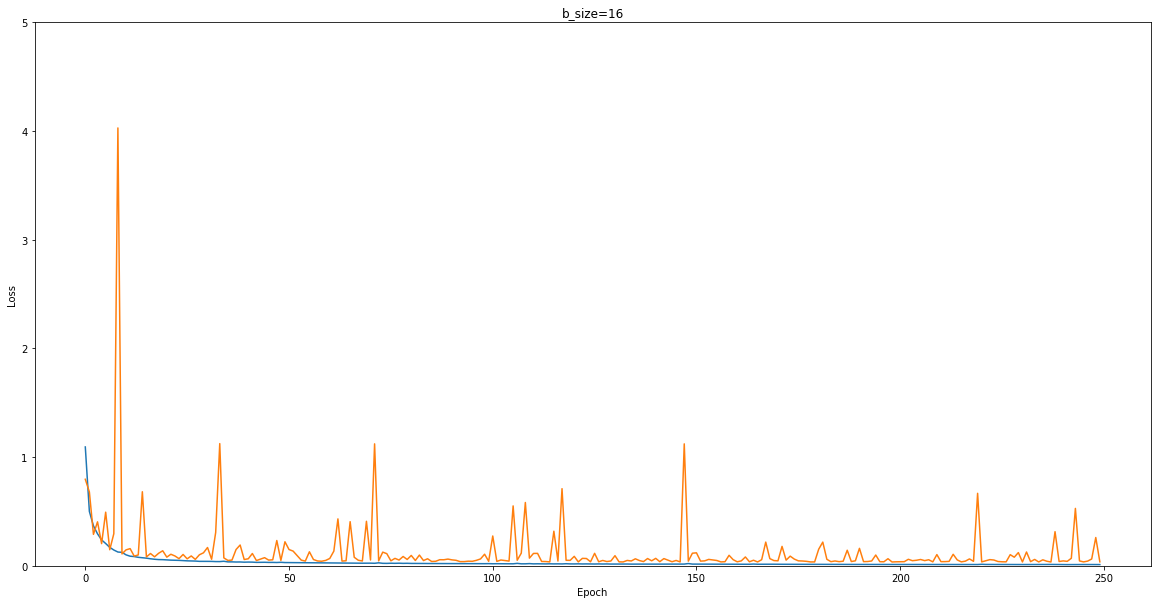

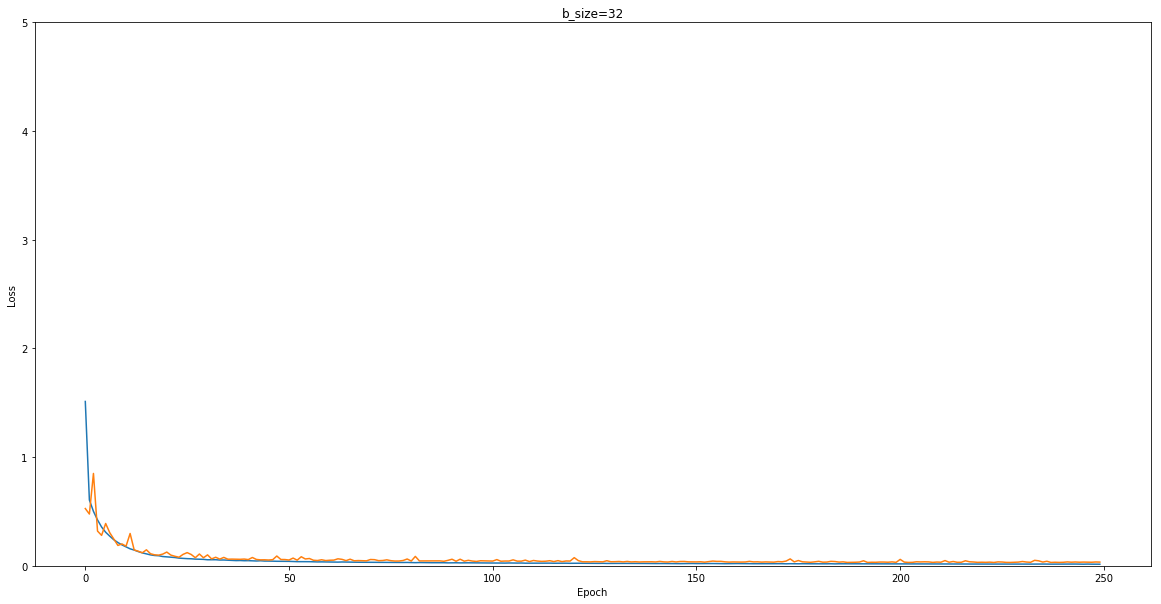

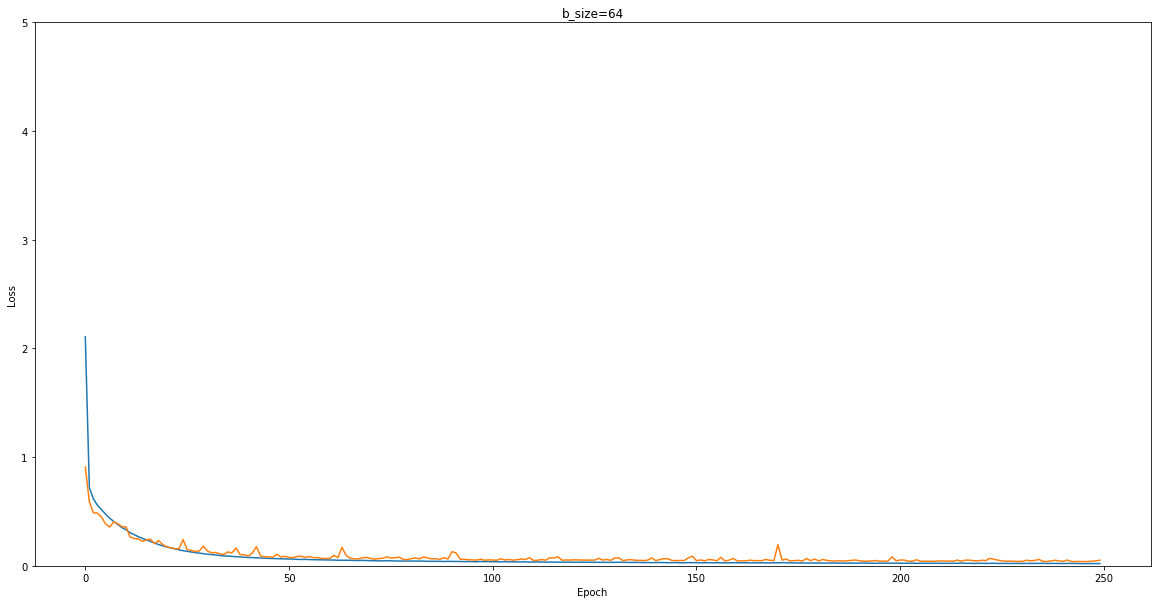

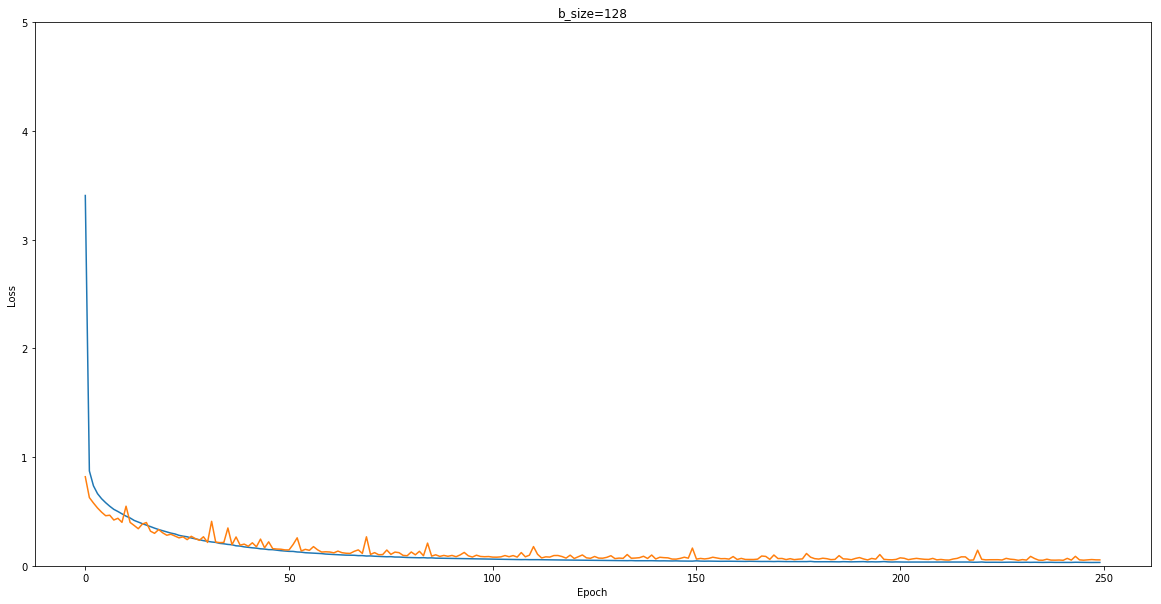

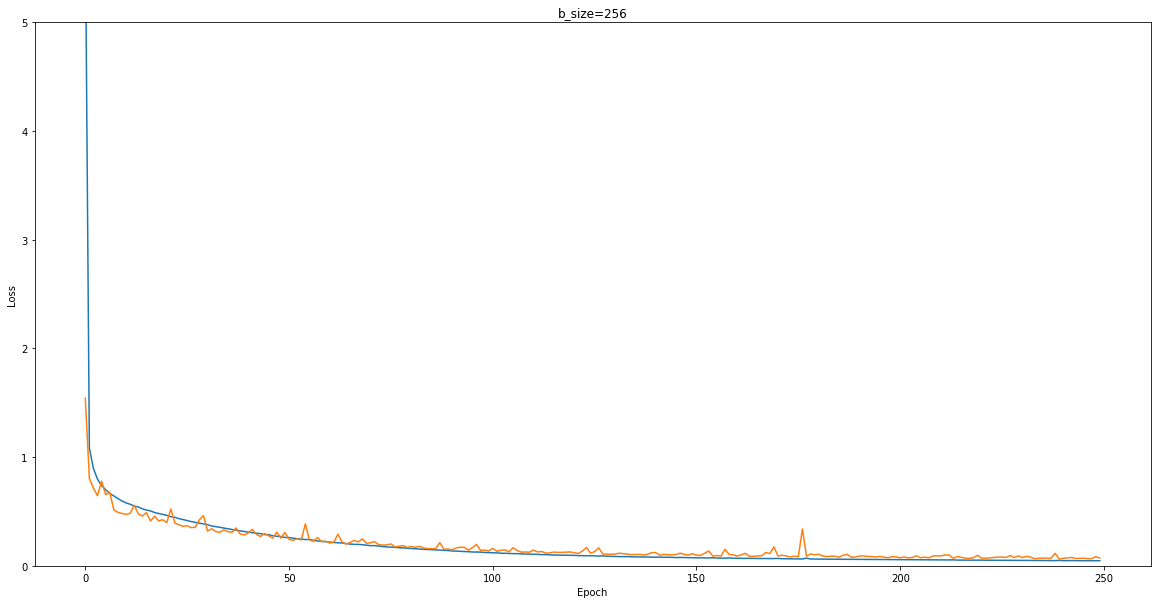

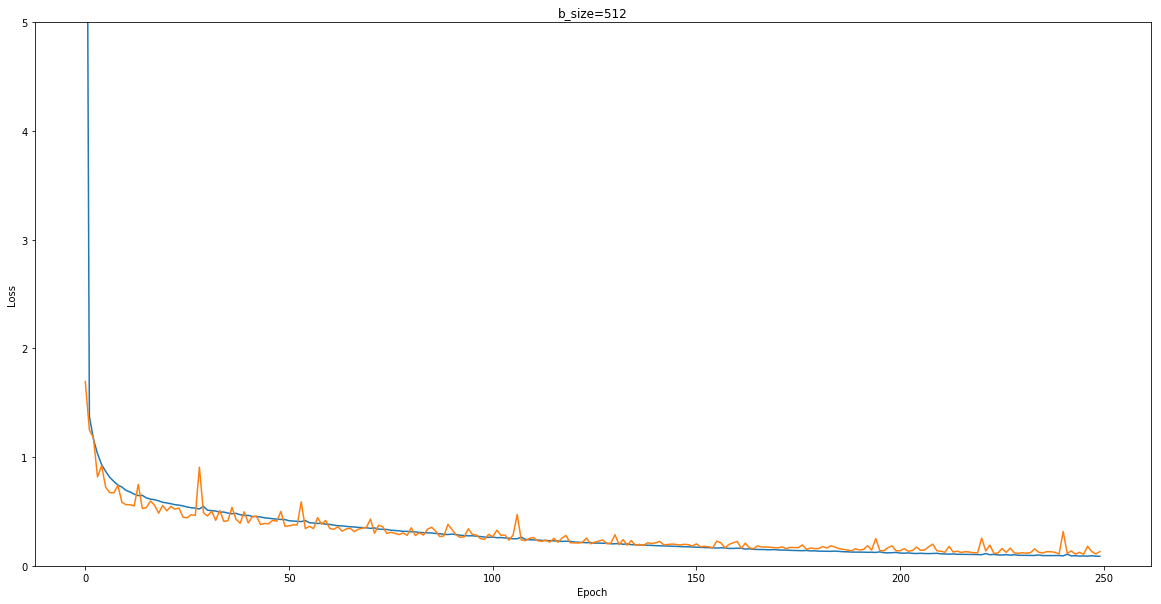

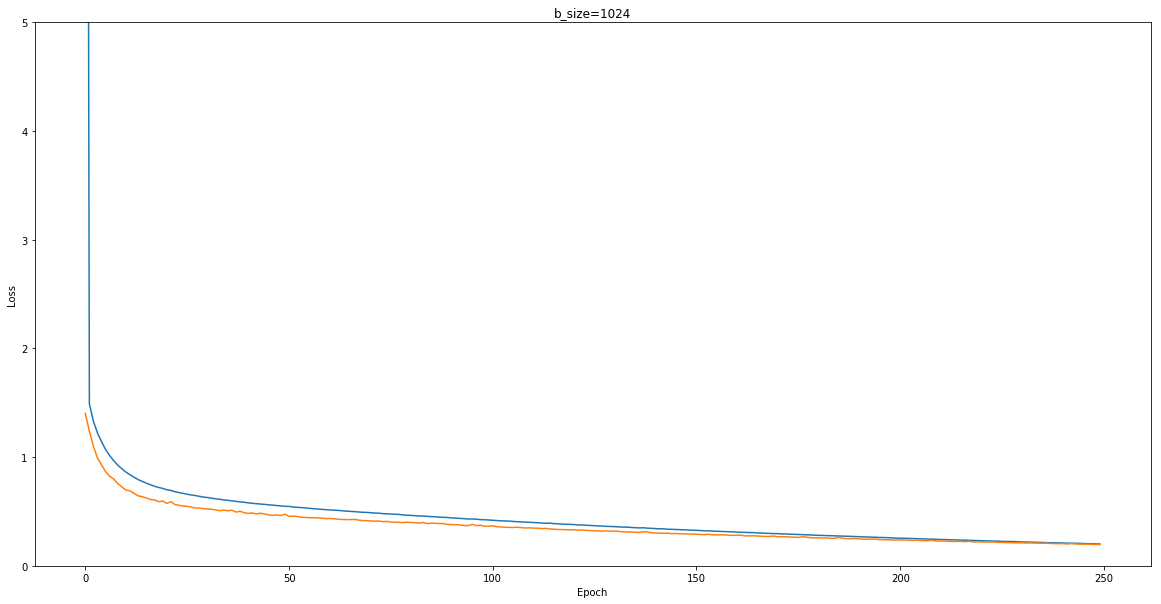

In [33]:

for i in batch_sizes:
    sgd = SGD(lr=0.01);
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=sgd,loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train,batch_size=int(i), epochs=250,verbose=2, validation_data=(X_val_scaled, y_val))
    plt.plot(history.history['loss'],label='train');
    plt.plot(history.history['val_loss'],label='validation');
    print('b_size='+str(i));
    plt.title('b_size='+str(i))
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.ylim([0,1]);
    
plt.show();

El aprendizaje sucede más lento al aumentar el batch size, ademas este es más suave. El valor final al que converge la red se ve afectado por el tamaño del batch, siendo este cercano al valor SGD puro para valores pequeños de batch size. Al aumentar el tamaño del batch se tiene una mejora en la velocidad de aprendizaje (entrenamiento), ya que se utilizan mejor las capacidades de GPU.

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 2s - loss: 8.8340 - val_loss: 12.4540
Epoch 2/250
 - 1s - loss: 3.0602 - val_loss: 3.4733
Epoch 3/250
 - 1s - loss: 2.2690 - val_loss: 2.1867
Epoch 4/250
 - 1s - loss: 2.2226 - val_loss: 1.1334
Epoch 5/250
 - 1s - loss: 0.9466 - val_loss: 3.4765
Epoch 6/250
 - 1s - loss: 0.8607 - val_loss: 1.5646
Epoch 7/250
 - 1s - loss: 0.5826 - val_loss: 0.7207
Epoch 8/250
 - 1s - loss: 0.4565 - val_loss: 0.7662
Epoch 9/250
 - 1s - loss: 0.3921 - val_loss: 0.6524
Epoch 10/250
 - 1s - loss: 0.3061 - val_loss: 0.5483
Epoch 11/250
 - 1s - loss: 0.3334 - val_loss: 0.4543
Epoch 12/250
 - 1s - loss: 0.3016 - val_loss: 0.4970
Epoch 13/250
 - 1s - loss: 0.2565 - val_loss: 0.4817
Epoch 14/250
 - 1s - loss: 0.2300 - val_loss: 0.4016
Epoch 15/250
 - 1s - loss: 0.2164 - val_loss: 0.5328
Epoch 16/250
 - 1s - loss: 0.1870 - val_loss: 0.3879
Epoch 17/250
 - 1s - loss: 0.2052 - val_loss: 0.3852
Epoch 18/250
 - 1s - loss: 0.3027 - val_loss: 0.5456
Epoch 

Epoch 154/250
 - 2s - loss: 0.0284 - val_loss: 0.2944
Epoch 155/250
 - 2s - loss: 0.0281 - val_loss: 0.5430
Epoch 156/250
 - 2s - loss: 0.0312 - val_loss: 0.2623
Epoch 157/250
 - 1s - loss: 0.0277 - val_loss: 0.3064
Epoch 158/250
 - 2s - loss: 0.0279 - val_loss: 0.2867
Epoch 159/250
 - 2s - loss: 0.0279 - val_loss: 0.2844
Epoch 160/250
 - 2s - loss: 0.0313 - val_loss: 0.5679
Epoch 161/250
 - 2s - loss: 0.0320 - val_loss: 0.3630
Epoch 162/250
 - 2s - loss: 0.0287 - val_loss: 0.2561
Epoch 163/250
 - 2s - loss: 0.0284 - val_loss: 0.2649
Epoch 164/250
 - 2s - loss: 0.0280 - val_loss: 0.2562
Epoch 165/250
 - 2s - loss: 0.0263 - val_loss: 0.2587
Epoch 166/250
 - 1s - loss: 0.0262 - val_loss: 0.2761
Epoch 167/250
 - 2s - loss: 0.0262 - val_loss: 0.4032
Epoch 168/250
 - 2s - loss: 0.0284 - val_loss: 0.2643
Epoch 169/250
 - 2s - loss: 0.0279 - val_loss: 0.4850
Epoch 170/250
 - 2s - loss: 0.0290 - val_loss: 0.2793
Epoch 171/250
 - 2s - loss: 0.0413 - val_loss: 0.2916
Epoch 172/250
 - 2s - loss: 

Epoch 56/250
 - 1s - loss: 0.0636 - val_loss: 0.4244
Epoch 57/250
 - 1s - loss: 0.0662 - val_loss: 0.4408
Epoch 58/250
 - 1s - loss: 0.0618 - val_loss: 0.4565
Epoch 59/250
 - 1s - loss: 0.0637 - val_loss: 0.4685
Epoch 60/250
 - 1s - loss: 0.0603 - val_loss: 0.4283
Epoch 61/250
 - 1s - loss: 0.0624 - val_loss: 0.4699
Epoch 62/250
 - 1s - loss: 0.0626 - val_loss: 0.4151
Epoch 63/250
 - 1s - loss: 0.0623 - val_loss: 0.4220
Epoch 64/250
 - 1s - loss: 0.0815 - val_loss: 0.4347
Epoch 65/250
 - 1s - loss: 0.0679 - val_loss: 0.4265
Epoch 66/250
 - 1s - loss: 0.0553 - val_loss: 0.5106
Epoch 67/250
 - 1s - loss: 0.0571 - val_loss: 0.4395
Epoch 68/250
 - 1s - loss: 0.0567 - val_loss: 0.4386
Epoch 69/250
 - 1s - loss: 0.0564 - val_loss: 0.5280
Epoch 70/250
 - 1s - loss: 0.0541 - val_loss: 0.4288
Epoch 71/250
 - 1s - loss: 0.0535 - val_loss: 0.5123
Epoch 72/250
 - 1s - loss: 0.0526 - val_loss: 0.5022
Epoch 73/250
 - 1s - loss: 0.0533 - val_loss: 0.4602
Epoch 74/250
 - 1s - loss: 0.0512 - val_loss: 

Epoch 209/250
 - 1s - loss: 0.0242 - val_loss: 0.4894
Epoch 210/250
 - 1s - loss: 0.0303 - val_loss: 0.4475
Epoch 211/250
 - 1s - loss: 0.0245 - val_loss: 0.4504
Epoch 212/250
 - 1s - loss: 0.0278 - val_loss: 0.4581
Epoch 213/250
 - 1s - loss: 0.0251 - val_loss: 0.4571
Epoch 214/250
 - 1s - loss: 0.0242 - val_loss: 0.4554
Epoch 215/250
 - 1s - loss: 0.0264 - val_loss: 0.4775
Epoch 216/250
 - 1s - loss: 0.0227 - val_loss: 0.4644
Epoch 217/250
 - 1s - loss: 0.0226 - val_loss: 0.4569
Epoch 218/250
 - 1s - loss: 0.0217 - val_loss: 0.5227
Epoch 219/250
 - 1s - loss: 0.0224 - val_loss: 0.4527
Epoch 220/250
 - 1s - loss: 0.0219 - val_loss: 0.4622
Epoch 221/250
 - 1s - loss: 0.0226 - val_loss: 0.4533
Epoch 222/250
 - 1s - loss: 0.0228 - val_loss: 0.4694
Epoch 223/250
 - 1s - loss: 0.0223 - val_loss: 0.4544
Epoch 224/250
 - 1s - loss: 0.0215 - val_loss: 0.4508
Epoch 225/250
 - 1s - loss: 0.0226 - val_loss: 0.4573
Epoch 226/250
 - 1s - loss: 0.0217 - val_loss: 0.4711
Epoch 227/250
 - 1s - loss: 

Epoch 112/250
 - 1s - loss: 0.0572 - val_loss: 0.5692
Epoch 113/250
 - 1s - loss: 0.0561 - val_loss: 0.5128
Epoch 114/250
 - 1s - loss: 0.0566 - val_loss: 0.5216
Epoch 115/250
 - 1s - loss: 0.0565 - val_loss: 0.5065
Epoch 116/250
 - 1s - loss: 0.0564 - val_loss: 0.5071
Epoch 117/250
 - 1s - loss: 0.0550 - val_loss: 0.5120
Epoch 118/250
 - 1s - loss: 0.0520 - val_loss: 0.4939
Epoch 119/250
 - 1s - loss: 0.0563 - val_loss: 0.5630
Epoch 120/250
 - 1s - loss: 0.0622 - val_loss: 0.6035
Epoch 121/250
 - 1s - loss: 0.0534 - val_loss: 0.4830
Epoch 122/250
 - 1s - loss: 0.0569 - val_loss: 0.5224
Epoch 123/250
 - 1s - loss: 0.0522 - val_loss: 0.4854
Epoch 124/250
 - 1s - loss: 0.0546 - val_loss: 0.4864
Epoch 125/250
 - 1s - loss: 0.0546 - val_loss: 0.4968
Epoch 126/250
 - 1s - loss: 0.0519 - val_loss: 0.5150
Epoch 127/250
 - 1s - loss: 0.0561 - val_loss: 0.4916
Epoch 128/250
 - 1s - loss: 0.0512 - val_loss: 0.5332
Epoch 129/250
 - 1s - loss: 0.0539 - val_loss: 0.5078
Epoch 130/250
 - 1s - loss: 

Epoch 13/250
 - 0s - loss: 0.5694 - val_loss: 1.8313
Epoch 14/250
 - 0s - loss: 0.5273 - val_loss: 1.9068
Epoch 15/250
 - 0s - loss: 0.5066 - val_loss: 1.7275
Epoch 16/250
 - 0s - loss: 0.4695 - val_loss: 2.9237
Epoch 17/250
 - 0s - loss: 0.4687 - val_loss: 1.6868
Epoch 18/250
 - 0s - loss: 0.4333 - val_loss: 7.0339
Epoch 19/250
 - 0s - loss: 0.5006 - val_loss: 1.6454
Epoch 20/250
 - 0s - loss: 0.3955 - val_loss: 1.4979
Epoch 21/250
 - 0s - loss: 0.3763 - val_loss: 1.5211
Epoch 22/250
 - 0s - loss: 0.3764 - val_loss: 1.5519
Epoch 23/250
 - 0s - loss: 0.3552 - val_loss: 1.6549
Epoch 24/250
 - 0s - loss: 0.3400 - val_loss: 1.4904
Epoch 25/250
 - 0s - loss: 0.3312 - val_loss: 1.4630
Epoch 26/250
 - 0s - loss: 0.3342 - val_loss: 1.4549
Epoch 27/250
 - 0s - loss: 0.3277 - val_loss: 2.6018
Epoch 28/250
 - 0s - loss: 0.3239 - val_loss: 1.3659
Epoch 29/250
 - 0s - loss: 0.2998 - val_loss: 1.3220
Epoch 30/250
 - 0s - loss: 0.2874 - val_loss: 1.7417
Epoch 31/250
 - 0s - loss: 0.2843 - val_loss: 

Epoch 167/250
 - 0s - loss: 0.0669 - val_loss: 0.7766
Epoch 168/250
 - 0s - loss: 0.0712 - val_loss: 0.8220
Epoch 169/250
 - 0s - loss: 0.0727 - val_loss: 0.7247
Epoch 170/250
 - 0s - loss: 0.0749 - val_loss: 1.2519
Epoch 171/250
 - 0s - loss: 0.1099 - val_loss: 0.7572
Epoch 172/250
 - 0s - loss: 0.0742 - val_loss: 0.7586
Epoch 173/250
 - 0s - loss: 0.0805 - val_loss: 0.7375
Epoch 174/250
 - 0s - loss: 0.0758 - val_loss: 0.7361
Epoch 175/250
 - 0s - loss: 0.0845 - val_loss: 0.8369
Epoch 176/250
 - 0s - loss: 0.0680 - val_loss: 0.7652
Epoch 177/250
 - 0s - loss: 0.0681 - val_loss: 0.7560
Epoch 178/250
 - 0s - loss: 0.0680 - val_loss: 0.7529
Epoch 179/250
 - 0s - loss: 0.0740 - val_loss: 0.7981
Epoch 180/250
 - 0s - loss: 0.0671 - val_loss: 0.7343
Epoch 181/250
 - 0s - loss: 0.0685 - val_loss: 0.7336
Epoch 182/250
 - 0s - loss: 0.0978 - val_loss: 1.0416
Epoch 183/250
 - 0s - loss: 0.0726 - val_loss: 0.7560
Epoch 184/250
 - 0s - loss: 0.0644 - val_loss: 0.7869
Epoch 185/250
 - 0s - loss: 

 - 0s - loss: 0.2347 - val_loss: 1.9395
Epoch 70/250
 - 0s - loss: 0.2337 - val_loss: 1.8661
Epoch 71/250
 - 0s - loss: 0.2236 - val_loss: 1.5794
Epoch 72/250
 - 0s - loss: 0.2241 - val_loss: 1.3113
Epoch 73/250
 - 0s - loss: 0.2028 - val_loss: 1.1859
Epoch 74/250
 - 0s - loss: 0.2093 - val_loss: 1.2874
Epoch 75/250
 - 0s - loss: 0.2122 - val_loss: 1.8224
Epoch 76/250
 - 0s - loss: 0.2095 - val_loss: 1.4858
Epoch 77/250
 - 0s - loss: 0.2080 - val_loss: 1.3221
Epoch 78/250
 - 0s - loss: 0.2062 - val_loss: 1.5039
Epoch 79/250
 - 0s - loss: 0.1972 - val_loss: 3.6805
Epoch 80/250
 - 0s - loss: 0.2369 - val_loss: 1.1907
Epoch 81/250
 - 0s - loss: 0.1976 - val_loss: 1.8532
Epoch 82/250
 - 0s - loss: 0.2197 - val_loss: 1.3121
Epoch 83/250
 - 0s - loss: 0.1882 - val_loss: 1.0941
Epoch 84/250
 - 0s - loss: 0.1850 - val_loss: 1.1490
Epoch 85/250
 - 0s - loss: 0.1792 - val_loss: 1.1483
Epoch 86/250
 - 0s - loss: 0.1896 - val_loss: 1.3539
Epoch 87/250
 - 0s - loss: 0.1789 - val_loss: 1.1038
Epoch 

Epoch 222/250
 - 0s - loss: 0.0858 - val_loss: 0.7929
Epoch 223/250
 - 0s - loss: 0.0837 - val_loss: 0.8308
Epoch 224/250
 - 0s - loss: 0.0821 - val_loss: 1.4399
Epoch 225/250
 - 0s - loss: 0.1842 - val_loss: 0.7744
Epoch 226/250
 - 0s - loss: 0.0807 - val_loss: 0.7936
Epoch 227/250
 - 0s - loss: 0.0997 - val_loss: 0.7525
Epoch 228/250
 - 0s - loss: 0.0843 - val_loss: 0.8193
Epoch 229/250
 - 0s - loss: 0.0815 - val_loss: 0.8196
Epoch 230/250
 - 0s - loss: 0.0835 - val_loss: 0.7899
Epoch 231/250
 - 0s - loss: 0.0929 - val_loss: 0.7587
Epoch 232/250
 - 0s - loss: 0.0842 - val_loss: 1.8461
Epoch 233/250
 - 0s - loss: 0.1250 - val_loss: 0.7714
Epoch 234/250
 - 0s - loss: 0.0865 - val_loss: 0.8450
Epoch 235/250
 - 0s - loss: 0.2606 - val_loss: 1.1098
Epoch 236/250
 - 0s - loss: 0.0972 - val_loss: 1.1181
Epoch 237/250
 - 0s - loss: 0.1104 - val_loss: 0.7602
Epoch 238/250
 - 0s - loss: 0.0824 - val_loss: 0.7745
Epoch 239/250
 - 0s - loss: 0.0796 - val_loss: 0.9378
Epoch 240/250
 - 0s - loss: 

Epoch 125/250
 - 0s - loss: 0.2167 - val_loss: 1.3163
Epoch 126/250
 - 0s - loss: 0.2152 - val_loss: 1.4115
Epoch 127/250
 - 0s - loss: 0.2184 - val_loss: 1.3349
Epoch 128/250
 - 0s - loss: 0.2144 - val_loss: 1.3220
Epoch 129/250
 - 0s - loss: 0.2131 - val_loss: 1.7674
Epoch 130/250
 - 0s - loss: 0.2666 - val_loss: 2.4137
Epoch 131/250
 - 0s - loss: 0.2677 - val_loss: 1.3501
Epoch 132/250
 - 0s - loss: 0.2126 - val_loss: 1.3108
Epoch 133/250
 - 0s - loss: 0.2076 - val_loss: 1.3747
Epoch 134/250
 - 0s - loss: 0.2048 - val_loss: 1.3800
Epoch 135/250
 - 0s - loss: 0.2022 - val_loss: 1.5933
Epoch 136/250
 - 0s - loss: 0.2291 - val_loss: 1.3647
Epoch 137/250
 - 0s - loss: 0.2061 - val_loss: 1.3210
Epoch 138/250
 - 0s - loss: 0.2018 - val_loss: 1.3323
Epoch 139/250
 - 0s - loss: 0.2010 - val_loss: 1.3084
Epoch 140/250
 - 0s - loss: 0.1943 - val_loss: 1.2751
Epoch 141/250
 - 0s - loss: 0.1950 - val_loss: 1.9691
Epoch 142/250
 - 0s - loss: 0.2401 - val_loss: 1.3663
Epoch 143/250
 - 0s - loss: 

 - 0s - loss: 1.1941 - val_loss: 2.5101
Epoch 27/250
 - 0s - loss: 1.1602 - val_loss: 2.3947
Epoch 28/250
 - 0s - loss: 1.1245 - val_loss: 2.3636
Epoch 29/250
 - 0s - loss: 1.1018 - val_loss: 2.3957
Epoch 30/250
 - 0s - loss: 1.0721 - val_loss: 2.2759
Epoch 31/250
 - 0s - loss: 1.0414 - val_loss: 2.2363
Epoch 32/250
 - 0s - loss: 1.0244 - val_loss: 2.1913
Epoch 33/250
 - 0s - loss: 0.9947 - val_loss: 2.1738
Epoch 34/250
 - 0s - loss: 0.9650 - val_loss: 2.1556
Epoch 35/250
 - 0s - loss: 0.9502 - val_loss: 2.1726
Epoch 36/250
 - 0s - loss: 0.9329 - val_loss: 2.1518
Epoch 37/250
 - 0s - loss: 0.9114 - val_loss: 2.1177
Epoch 38/250
 - 0s - loss: 0.8914 - val_loss: 2.1579
Epoch 39/250
 - 0s - loss: 0.8750 - val_loss: 2.0326
Epoch 40/250
 - 0s - loss: 0.8629 - val_loss: 2.0193
Epoch 41/250
 - 0s - loss: 0.8534 - val_loss: 2.0771
Epoch 42/250
 - 0s - loss: 0.8405 - val_loss: 2.0038
Epoch 43/250
 - 0s - loss: 0.8160 - val_loss: 1.9848
Epoch 44/250
 - 0s - loss: 0.8103 - val_loss: 1.9619
Epoch 

Epoch 180/250
 - 0s - loss: 0.2788 - val_loss: 1.1256
Epoch 181/250
 - 0s - loss: 0.2881 - val_loss: 1.1250
Epoch 182/250
 - 0s - loss: 0.2780 - val_loss: 1.1231
Epoch 183/250
 - 0s - loss: 0.2795 - val_loss: 1.0972
Epoch 184/250
 - 0s - loss: 0.2732 - val_loss: 1.1060
Epoch 185/250
 - 0s - loss: 0.2749 - val_loss: 1.1119
Epoch 186/250
 - 0s - loss: 0.2721 - val_loss: 1.1324
Epoch 187/250
 - 0s - loss: 0.2699 - val_loss: 1.1361
Epoch 188/250
 - 0s - loss: 0.2698 - val_loss: 1.0807
Epoch 189/250
 - 0s - loss: 0.2680 - val_loss: 1.0896
Epoch 190/250
 - 0s - loss: 0.2660 - val_loss: 1.1028
Epoch 191/250
 - 0s - loss: 0.2682 - val_loss: 1.0956
Epoch 192/250
 - 0s - loss: 0.2694 - val_loss: 1.0947
Epoch 193/250
 - 0s - loss: 0.2632 - val_loss: 1.0787
Epoch 194/250
 - 0s - loss: 0.2634 - val_loss: 1.0818
Epoch 195/250
 - 0s - loss: 0.2621 - val_loss: 1.0804
Epoch 196/250
 - 0s - loss: 0.2587 - val_loss: 1.0953
Epoch 197/250
 - 0s - loss: 0.2610 - val_loss: 1.1004
Epoch 198/250
 - 0s - loss: 

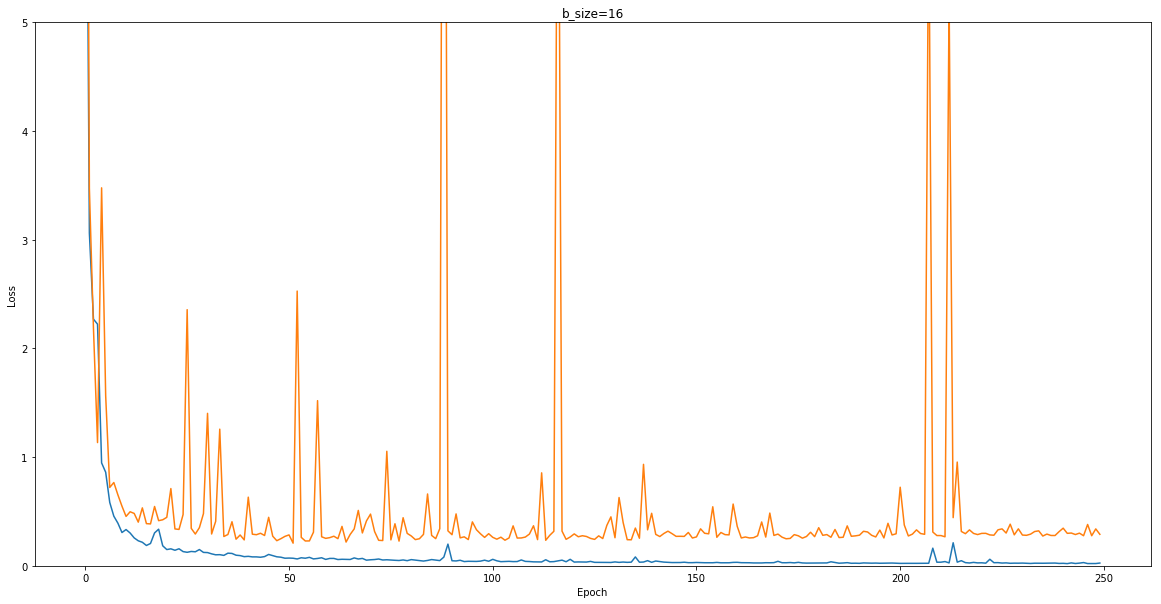

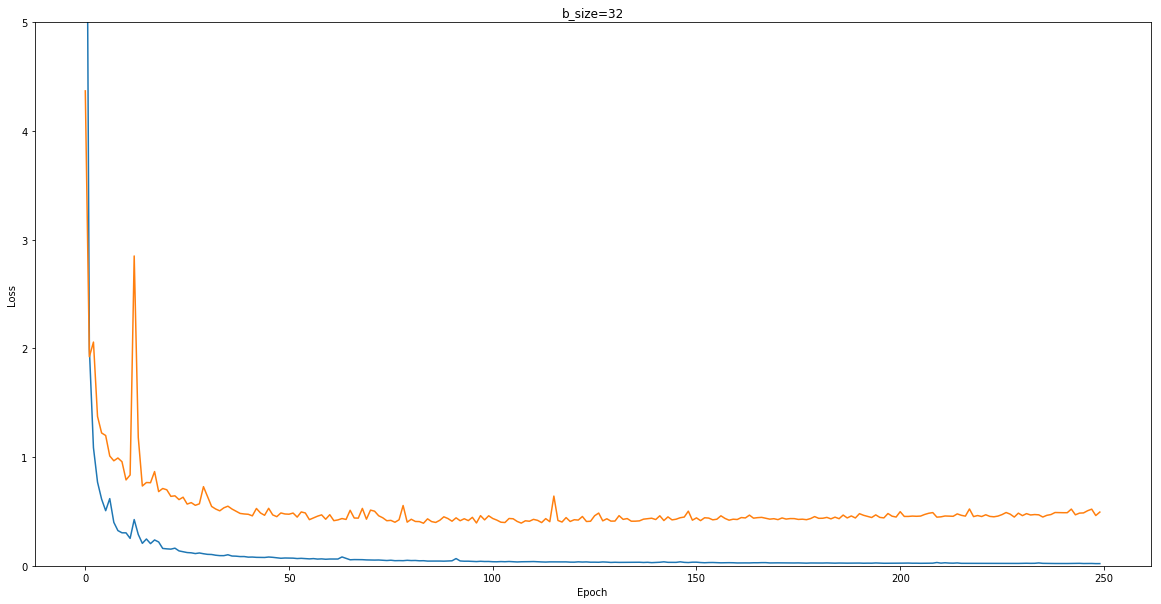

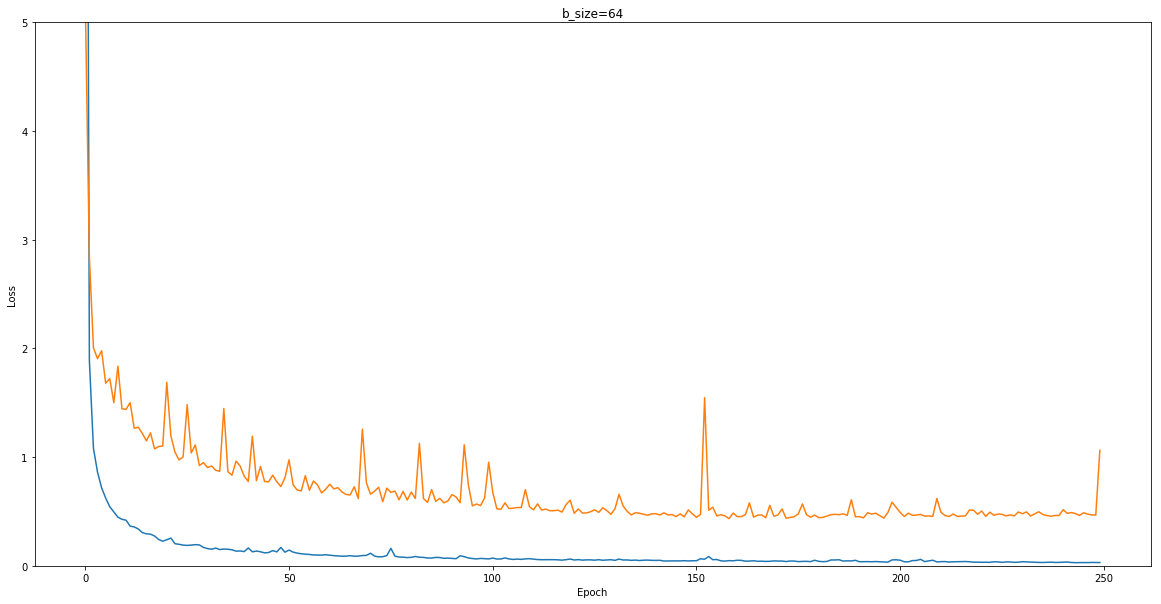

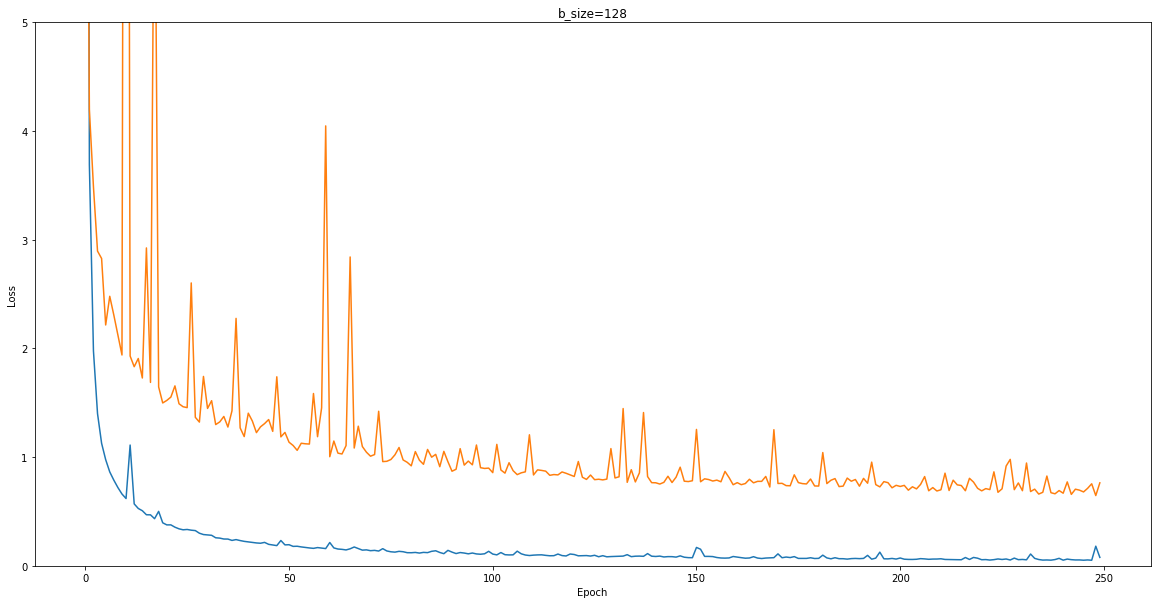

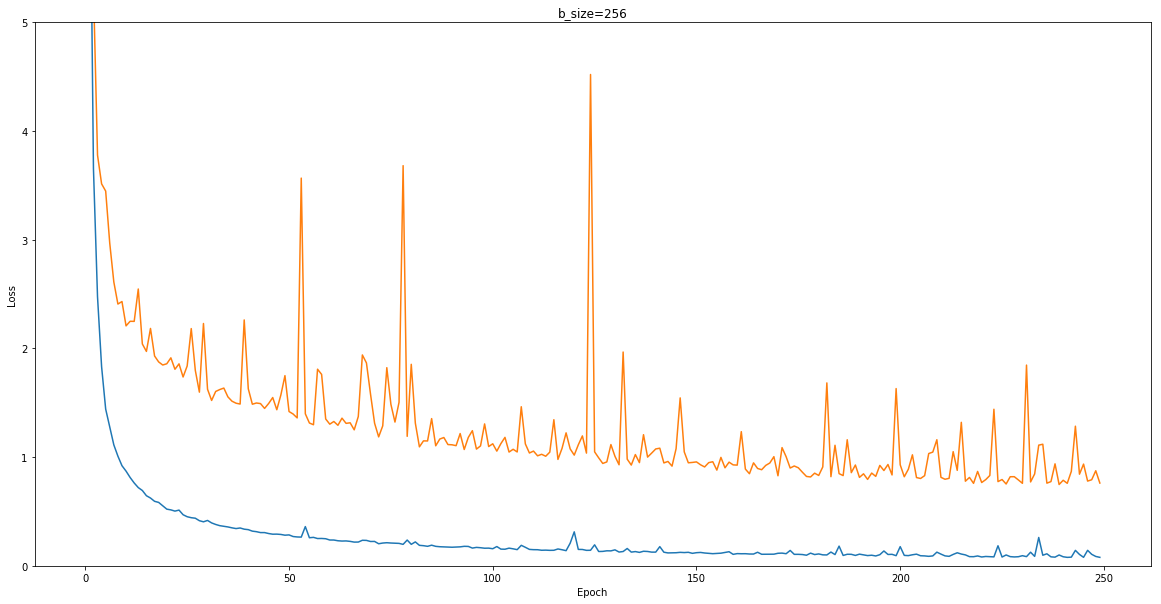

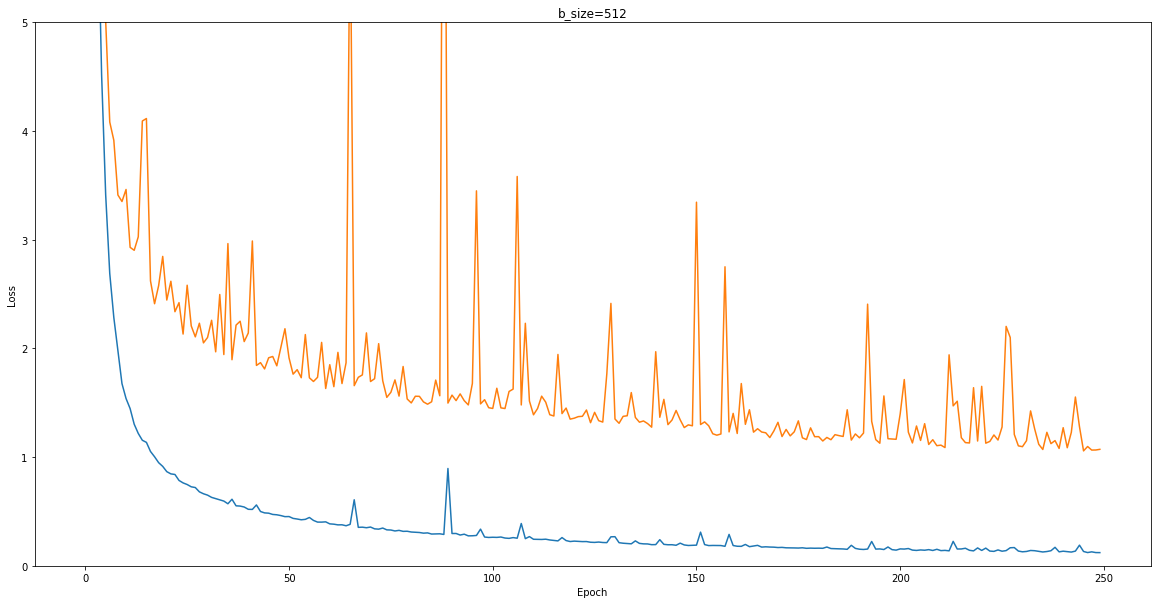

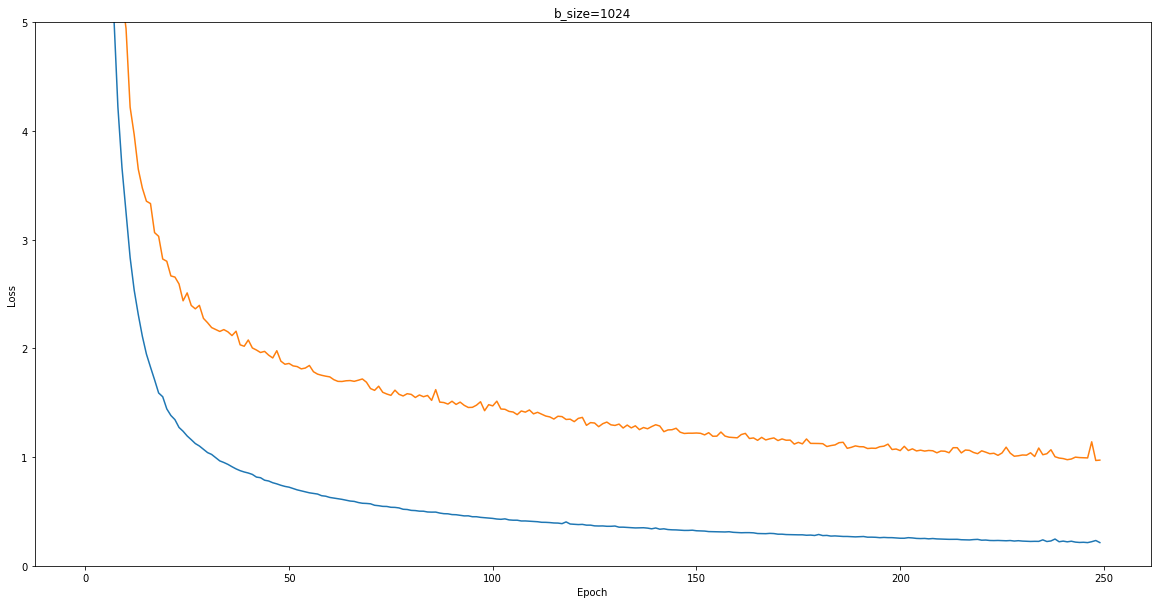

In [34]:
for i in batch_sizes:
    sgd = SGD(lr=0.001);
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=sgd,loss='mean_squared_error')
    history_relu = model.fit(X_train_scaled, y_train,batch_size=int(i), epochs=250,verbose=2, validation_data=(X_val_scaled, y_val))
    plt.plot(history_relu.history['loss'],label='train');
    plt.plot(history_relu.history['val_loss'],label='validation');
    print('b_size='+str(i));
    plt.title('b_size='+str(i))
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.ylim([0,5]);
    
plt.show();

El resultado es analogo para la función de activación RELU.

Se modifico el tamaño minimo de batch_size para lograr una computación más rapida. Ya que (al parecer) utiliza gpu con lo que la ganacia en paralelismo es mucho menor a la perdida en velocidad (frecuencia) en comparación al uso de cpu. 
Por la misma razon se disminuyo la cantidad de pruebas a solo 10.
Además para valores mayores a 1000 el comportamiento es bastante similar y bastante deficiente, por lo que se eligio ver el comportamiento para valores más pequeños.

Sigmoide: batch_size=128 genera un entrenamiento más veloz con convergencia similar.
relu: batch_size=32 genera un entrenamiento más veloz con convergencia similar.

> g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?

In [35]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
optimizers = [SGD(lr=0.01),Adagrad(lr=0.01),Adadelta(lr=0.01),RMSprop(lr=0.01),Adam(lr=0.01)];
optimizers_str=['sgd','Adagrad','Adadelta','RMSprop','Adam'];

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 2s - loss: 1.4431 - val_loss: 0.6956
Epoch 2/250
 - 1s - loss: 0.6051 - val_loss: 0.4447
Epoch 3/250
 - 1s - loss: 0.4993 - val_loss: 0.3955
Epoch 4/250
 - 1s - loss: 0.4225 - val_loss: 0.3538
Epoch 5/250
 - 1s - loss: 0.3641 - val_loss: 0.3416
Epoch 6/250
 - 1s - loss: 0.3205 - val_loss: 0.2683
Epoch 7/250
 - 1s - loss: 0.2780 - val_loss: 0.2760
Epoch 8/250
 - 1s - loss: 0.2463 - val_loss: 0.2246
Epoch 9/250
 - 1s - loss: 0.2187 - val_loss: 0.1927
Epoch 10/250
 - 1s - loss: 0.1977 - val_loss: 0.1726
Epoch 11/250
 - 1s - loss: 0.1741 - val_loss: 0.1703
Epoch 12/250
 - 1s - loss: 0.1547 - val_loss: 0.1462
Epoch 13/250
 - 1s - loss: 0.1452 - val_loss: 0.1413
Epoch 14/250
 - 1s - loss: 0.1302 - val_loss: 0.1410
Epoch 15/250
 - 1s - loss: 0.1205 - val_loss: 0.1423
Epoch 16/250
 - 1s - loss: 0.1096 - val_loss: 0.1984
Epoch 17/250
 - 1s - loss: 0.1047 - val_loss: 0.1191
Epoch 18/250
 - 1s - loss: 0.0976 - val_loss: 0.1267
Epoch 1

Epoch 154/250
 - 1s - loss: 0.0198 - val_loss: 0.0353
Epoch 155/250
 - 1s - loss: 0.0197 - val_loss: 0.0346
Epoch 156/250
 - 1s - loss: 0.0195 - val_loss: 0.0357
Epoch 157/250
 - 1s - loss: 0.0202 - val_loss: 0.0378
Epoch 158/250
 - 1s - loss: 0.0190 - val_loss: 0.0362
Epoch 159/250
 - 1s - loss: 0.0192 - val_loss: 0.0376
Epoch 160/250
 - 1s - loss: 0.0195 - val_loss: 0.0555
Epoch 161/250
 - 1s - loss: 0.0193 - val_loss: 0.0375
Epoch 162/250
 - 1s - loss: 0.0187 - val_loss: 0.0350
Epoch 163/250
 - 1s - loss: 0.0189 - val_loss: 0.0388
Epoch 164/250
 - 1s - loss: 0.0194 - val_loss: 0.0362
Epoch 165/250
 - 1s - loss: 0.0195 - val_loss: 0.0483
Epoch 166/250
 - 1s - loss: 0.0194 - val_loss: 0.0484
Epoch 167/250
 - 1s - loss: 0.0191 - val_loss: 0.0346
Epoch 168/250
 - 1s - loss: 0.0188 - val_loss: 0.0366
Epoch 169/250
 - 1s - loss: 0.0187 - val_loss: 0.0401
Epoch 170/250
 - 1s - loss: 0.0188 - val_loss: 0.0369
Epoch 171/250
 - 1s - loss: 0.0195 - val_loss: 0.0354
Epoch 172/250
 - 1s - loss: 

 - 1s - loss: 0.0529 - val_loss: 0.0871
Epoch 57/250
 - 1s - loss: 0.0524 - val_loss: 0.0870
Epoch 58/250
 - 1s - loss: 0.0516 - val_loss: 0.0864
Epoch 59/250
 - 1s - loss: 0.0513 - val_loss: 0.0863
Epoch 60/250
 - 1s - loss: 0.0508 - val_loss: 0.0857
Epoch 61/250
 - 1s - loss: 0.0503 - val_loss: 0.0852
Epoch 62/250
 - 1s - loss: 0.0497 - val_loss: 0.0872
Epoch 63/250
 - 1s - loss: 0.0493 - val_loss: 0.0864
Epoch 64/250
 - 1s - loss: 0.0487 - val_loss: 0.0850
Epoch 65/250
 - 1s - loss: 0.0485 - val_loss: 0.0851
Epoch 66/250
 - 1s - loss: 0.0480 - val_loss: 0.0830
Epoch 67/250
 - 1s - loss: 0.0476 - val_loss: 0.0842
Epoch 68/250
 - 1s - loss: 0.0472 - val_loss: 0.0821
Epoch 69/250
 - 1s - loss: 0.0467 - val_loss: 0.0835
Epoch 70/250
 - 1s - loss: 0.0463 - val_loss: 0.0837
Epoch 71/250
 - 1s - loss: 0.0460 - val_loss: 0.0823
Epoch 72/250
 - 1s - loss: 0.0455 - val_loss: 0.0810
Epoch 73/250
 - 1s - loss: 0.0451 - val_loss: 0.0819
Epoch 74/250
 - 1s - loss: 0.0448 - val_loss: 0.0806
Epoch 

Epoch 209/250
 - 1s - loss: 0.0228 - val_loss: 0.0616
Epoch 210/250
 - 1s - loss: 0.0226 - val_loss: 0.0613
Epoch 211/250
 - 1s - loss: 0.0226 - val_loss: 0.0612
Epoch 212/250
 - 1s - loss: 0.0226 - val_loss: 0.0611
Epoch 213/250
 - 1s - loss: 0.0225 - val_loss: 0.0615
Epoch 214/250
 - 1s - loss: 0.0225 - val_loss: 0.0608
Epoch 215/250
 - 1s - loss: 0.0224 - val_loss: 0.0605
Epoch 216/250
 - 1s - loss: 0.0223 - val_loss: 0.0608
Epoch 217/250
 - 1s - loss: 0.0222 - val_loss: 0.0610
Epoch 218/250
 - 1s - loss: 0.0222 - val_loss: 0.0610
Epoch 219/250
 - 1s - loss: 0.0221 - val_loss: 0.0605
Epoch 220/250
 - 1s - loss: 0.0220 - val_loss: 0.0606
Epoch 221/250
 - 1s - loss: 0.0220 - val_loss: 0.0607
Epoch 222/250
 - 1s - loss: 0.0218 - val_loss: 0.0606
Epoch 223/250
 - 1s - loss: 0.0218 - val_loss: 0.0609
Epoch 224/250
 - 1s - loss: 0.0218 - val_loss: 0.0602
Epoch 225/250
 - 1s - loss: 0.0217 - val_loss: 0.0608
Epoch 226/250
 - 1s - loss: 0.0216 - val_loss: 0.0608
Epoch 227/250
 - 1s - loss: 

Epoch 112/250
 - 1s - loss: 0.1423 - val_loss: 0.1456
Epoch 113/250
 - 1s - loss: 0.1412 - val_loss: 0.1439
Epoch 114/250
 - 1s - loss: 0.1401 - val_loss: 0.1427
Epoch 115/250
 - 1s - loss: 0.1391 - val_loss: 0.1424
Epoch 116/250
 - 1s - loss: 0.1382 - val_loss: 0.1409
Epoch 117/250
 - 1s - loss: 0.1371 - val_loss: 0.1411
Epoch 118/250
 - 1s - loss: 0.1362 - val_loss: 0.1407
Epoch 119/250
 - 1s - loss: 0.1352 - val_loss: 0.1389
Epoch 120/250
 - 1s - loss: 0.1341 - val_loss: 0.1382
Epoch 121/250
 - 1s - loss: 0.1331 - val_loss: 0.1385
Epoch 122/250
 - 1s - loss: 0.1323 - val_loss: 0.1365
Epoch 123/250
 - 1s - loss: 0.1313 - val_loss: 0.1358
Epoch 124/250
 - 1s - loss: 0.1305 - val_loss: 0.1353
Epoch 125/250
 - 1s - loss: 0.1296 - val_loss: 0.1346
Epoch 126/250
 - 1s - loss: 0.1287 - val_loss: 0.1341
Epoch 127/250
 - 1s - loss: 0.1278 - val_loss: 0.1337
Epoch 128/250
 - 1s - loss: 0.1269 - val_loss: 0.1330
Epoch 129/250
 - 1s - loss: 0.1262 - val_loss: 0.1321
Epoch 130/250
 - 1s - loss: 

 - 1s - loss: 0.4055 - val_loss: 0.6111
Epoch 14/250
 - 1s - loss: 0.4200 - val_loss: 0.5068
Epoch 15/250
 - 1s - loss: 0.4108 - val_loss: 0.3273
Epoch 16/250
 - 1s - loss: 0.3983 - val_loss: 0.5755
Epoch 17/250
 - 1s - loss: 0.3827 - val_loss: 0.7108
Epoch 18/250
 - 1s - loss: 0.3801 - val_loss: 0.5056
Epoch 19/250
 - 1s - loss: 0.3828 - val_loss: 1.1315
Epoch 20/250
 - 1s - loss: 0.3797 - val_loss: 0.2469
Epoch 21/250
 - 1s - loss: 0.3847 - val_loss: 0.5424
Epoch 22/250
 - 1s - loss: 0.3563 - val_loss: 0.5360
Epoch 23/250
 - 1s - loss: 0.3554 - val_loss: 0.1858
Epoch 24/250
 - 1s - loss: 0.3491 - val_loss: 0.5973
Epoch 25/250
 - 1s - loss: 0.3625 - val_loss: 0.4642
Epoch 26/250
 - 1s - loss: 0.3648 - val_loss: 0.7126
Epoch 27/250
 - 1s - loss: 0.3558 - val_loss: 0.2700
Epoch 28/250
 - 1s - loss: 0.3664 - val_loss: 0.4156
Epoch 29/250
 - 1s - loss: 0.3405 - val_loss: 0.2848
Epoch 30/250
 - 1s - loss: 0.3498 - val_loss: 0.2759
Epoch 31/250
 - 1s - loss: 0.3326 - val_loss: 0.3443
Epoch 

Epoch 167/250
 - 1s - loss: 0.2724 - val_loss: 0.3378
Epoch 168/250
 - 1s - loss: 0.2596 - val_loss: 0.2792
Epoch 169/250
 - 1s - loss: 0.2570 - val_loss: 0.2942
Epoch 170/250
 - 1s - loss: 0.2611 - val_loss: 0.2866
Epoch 171/250
 - 1s - loss: 0.2745 - val_loss: 0.3217
Epoch 172/250
 - 1s - loss: 0.2794 - val_loss: 0.2382
Epoch 173/250
 - 1s - loss: 0.2606 - val_loss: 0.2969
Epoch 174/250
 - 1s - loss: 0.2648 - val_loss: 0.2081
Epoch 175/250
 - 1s - loss: 0.2795 - val_loss: 0.2874
Epoch 176/250
 - 1s - loss: 0.2749 - val_loss: 0.2293
Epoch 177/250
 - 1s - loss: 0.2546 - val_loss: 0.4917
Epoch 178/250
 - 1s - loss: 0.2697 - val_loss: 0.2361
Epoch 179/250
 - 1s - loss: 0.2609 - val_loss: 0.1473
Epoch 180/250
 - 1s - loss: 0.2660 - val_loss: 0.3668
Epoch 181/250
 - 1s - loss: 0.2553 - val_loss: 1.1396
Epoch 182/250
 - 1s - loss: 0.2643 - val_loss: 0.1713
Epoch 183/250
 - 1s - loss: 0.2668 - val_loss: 0.9561
Epoch 184/250
 - 1s - loss: 0.2621 - val_loss: 0.3478
Epoch 185/250
 - 1s - loss: 

Epoch 70/250
 - 1s - loss: 0.2247 - val_loss: 0.2410
Epoch 71/250
 - 1s - loss: 0.2366 - val_loss: 0.3005
Epoch 72/250
 - 1s - loss: 0.2283 - val_loss: 0.2168
Epoch 73/250
 - 1s - loss: 0.2365 - val_loss: 0.2503
Epoch 74/250
 - 1s - loss: 0.2440 - val_loss: 0.2790
Epoch 75/250
 - 1s - loss: 0.2516 - val_loss: 0.2138
Epoch 76/250
 - 1s - loss: 0.2399 - val_loss: 0.2559
Epoch 77/250
 - 1s - loss: 0.2353 - val_loss: 0.3531
Epoch 78/250
 - 1s - loss: 0.2490 - val_loss: 0.2215
Epoch 79/250
 - 1s - loss: 0.2240 - val_loss: 0.2963
Epoch 80/250
 - 1s - loss: 0.2300 - val_loss: 0.2206
Epoch 81/250
 - 1s - loss: 0.2507 - val_loss: 0.3005
Epoch 82/250
 - 1s - loss: 0.2787 - val_loss: 0.2402
Epoch 83/250
 - 1s - loss: 0.3021 - val_loss: 0.3424
Epoch 84/250
 - 1s - loss: 0.2561 - val_loss: 0.2508
Epoch 85/250
 - 1s - loss: 0.2271 - val_loss: 0.2298
Epoch 86/250
 - 1s - loss: 0.2120 - val_loss: 0.2383
Epoch 87/250
 - 1s - loss: 0.2369 - val_loss: 0.2509
Epoch 88/250
 - 1s - loss: 0.2152 - val_loss: 

Epoch 223/250
 - 1s - loss: 0.1359 - val_loss: 0.1927
Epoch 224/250
 - 1s - loss: 0.1337 - val_loss: 0.1572
Epoch 225/250
 - 1s - loss: 0.1454 - val_loss: 0.1475
Epoch 226/250
 - 1s - loss: 0.1387 - val_loss: 0.3088
Epoch 227/250
 - 1s - loss: 0.1379 - val_loss: 0.2119
Epoch 228/250
 - 1s - loss: 0.1266 - val_loss: 0.1508
Epoch 229/250
 - 1s - loss: 0.1523 - val_loss: 0.1657
Epoch 230/250
 - 1s - loss: 0.1409 - val_loss: 0.1776
Epoch 231/250
 - 1s - loss: 0.1517 - val_loss: 0.1578
Epoch 232/250
 - 1s - loss: 0.1492 - val_loss: 0.1785
Epoch 233/250
 - 1s - loss: 0.1597 - val_loss: 0.2282
Epoch 234/250
 - 1s - loss: 0.1630 - val_loss: 0.1968
Epoch 235/250
 - 1s - loss: 0.1347 - val_loss: 0.2192
Epoch 236/250
 - 1s - loss: 0.1397 - val_loss: 0.1503
Epoch 237/250
 - 1s - loss: 0.1310 - val_loss: 0.1536
Epoch 238/250
 - 1s - loss: 0.1258 - val_loss: 0.1538
Epoch 239/250
 - 1s - loss: 0.1341 - val_loss: 0.1598
Epoch 240/250
 - 1s - loss: 0.1682 - val_loss: 0.1503
Epoch 241/250
 - 1s - loss: 

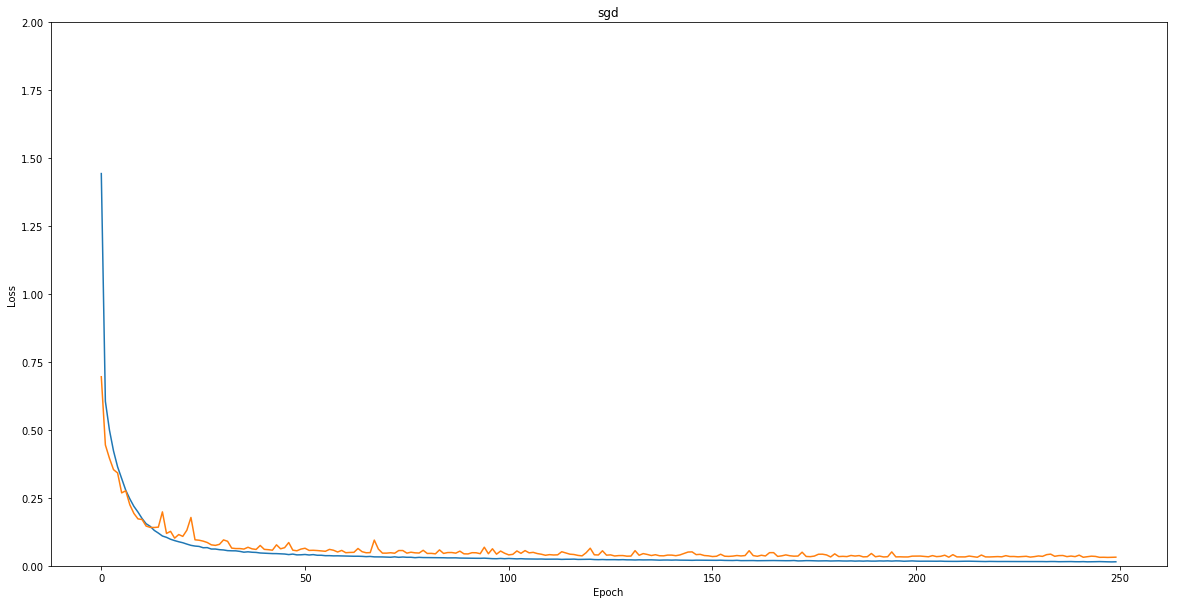

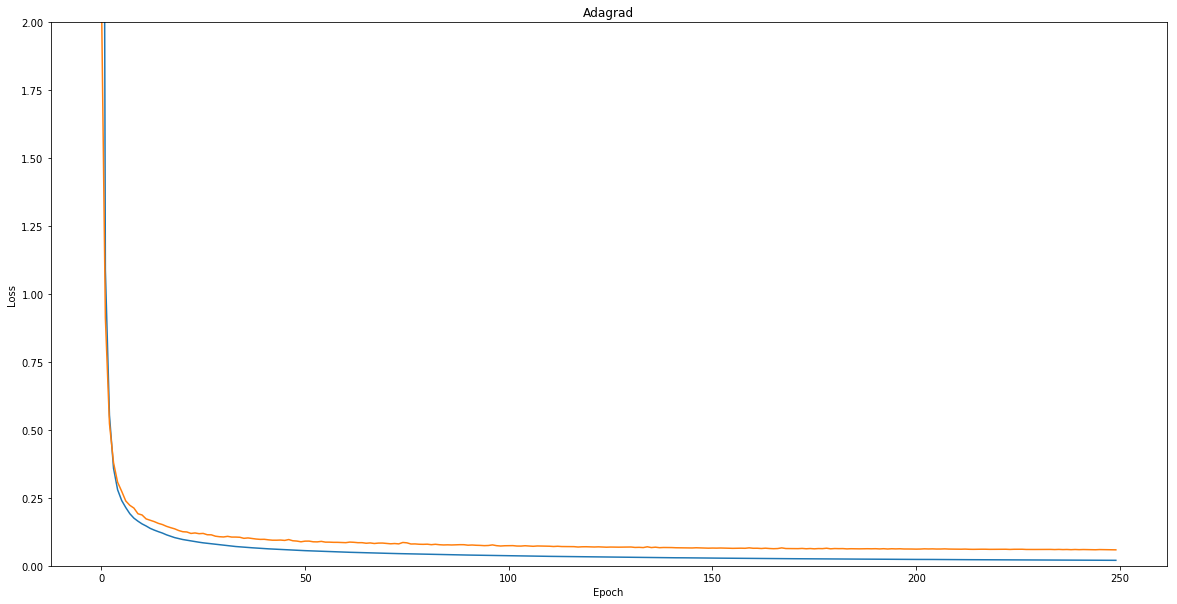

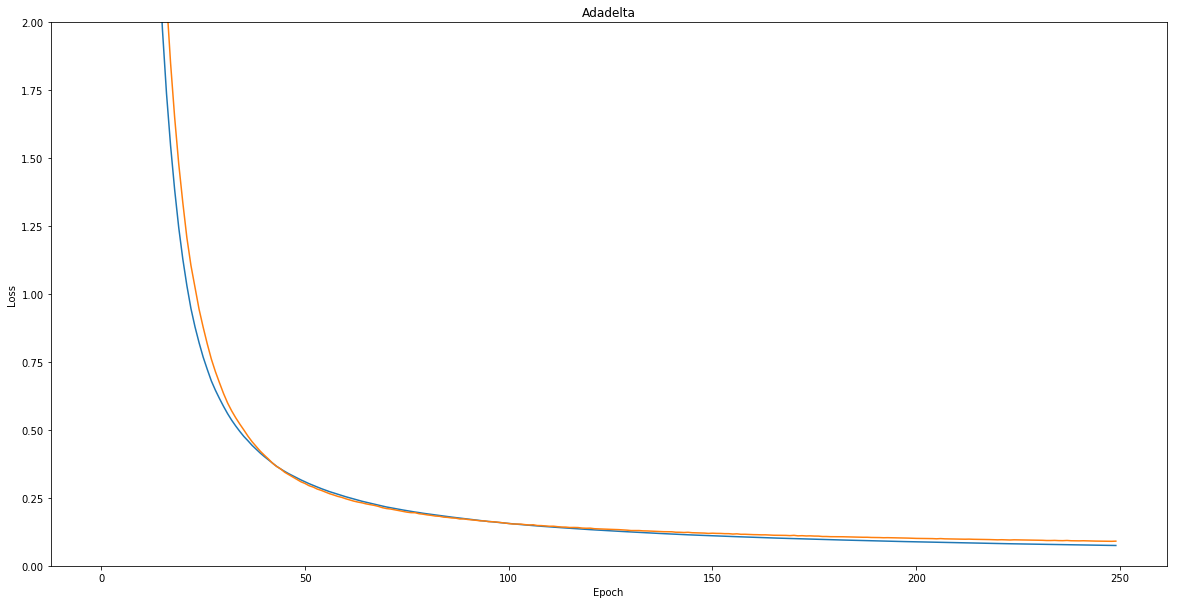

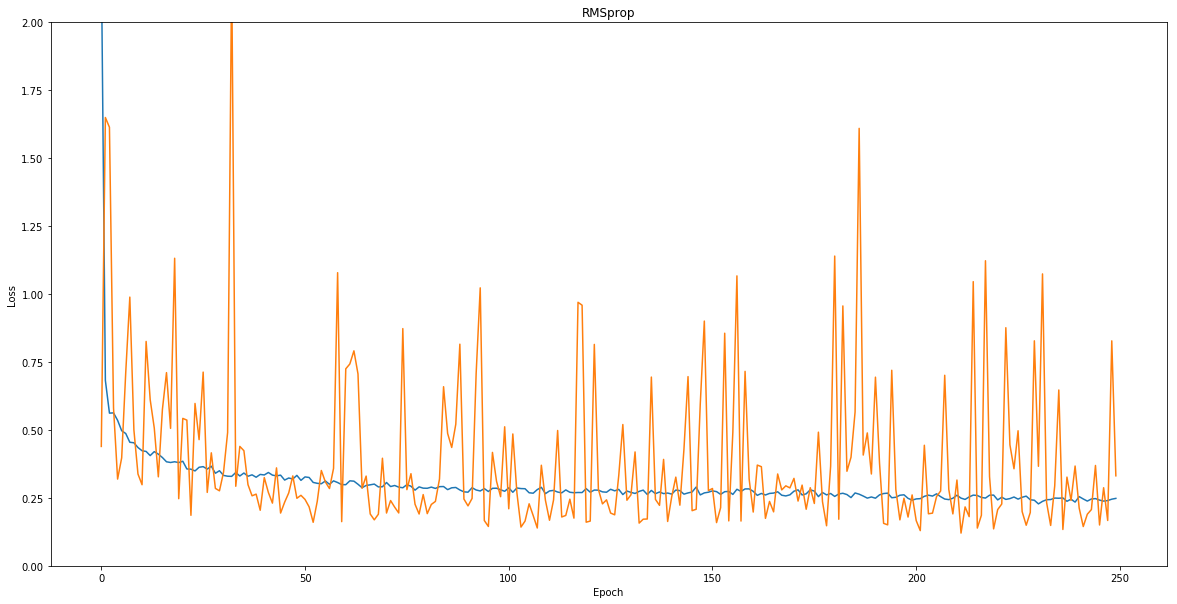

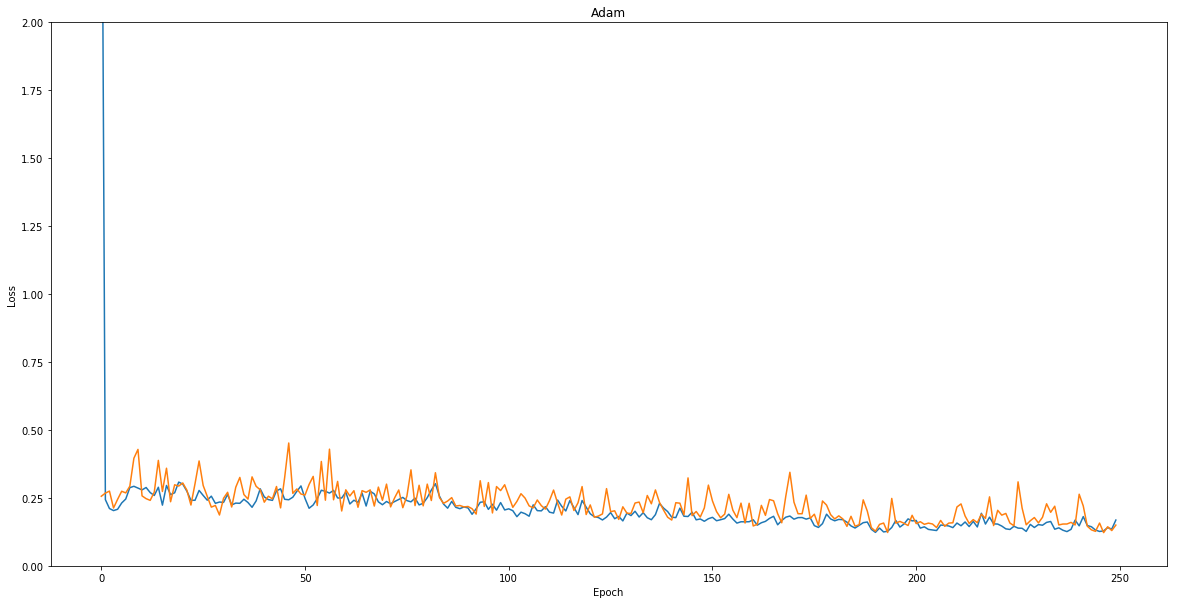

In [36]:
for i in range(5):
    sgd = optimizers[i];
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=sgd,loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250,verbose=2, validation_data=(X_val_scaled, y_val))
    plt.plot(history.history['loss'],label='train');
    plt.plot(history.history['val_loss'],label='validation');
    plt.title(optimizers_str[i]);
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.ylim([0,2]);

plt.show();

Para este caso se tiene el mejor rendimiento para sgd, Adagrad y adadelta, siendo el mejor resultado final con sgd (mse más bajo). RMSprop genera mucho ruido en el MSE del validation set.  Adam logra una convergencia muy rapida pero no mejora mucho con los epochs.

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 2s - loss: 8.9582 - val_loss: 2.9903
Epoch 2/250
 - 1s - loss: 1.9065 - val_loss: 2.5014
Epoch 3/250
 - 1s - loss: 1.0890 - val_loss: 1.7714
Epoch 4/250
 - 1s - loss: 0.5973 - val_loss: 1.2972
Epoch 5/250
 - 1s - loss: 0.4727 - val_loss: 1.1409
Epoch 6/250
 - 1s - loss: 0.4679 - val_loss: 1.1129
Epoch 7/250
 - 1s - loss: 0.4742 - val_loss: 1.3493
Epoch 8/250
 - 1s - loss: 0.4345 - val_loss: 1.4427
Epoch 9/250
 - 1s - loss: 0.5109 - val_loss: 0.9476
Epoch 10/250
 - 1s - loss: 0.3023 - val_loss: 0.8846
Epoch 11/250
 - 1s - loss: 0.3514 - val_loss: 0.8697
Epoch 12/250
 - 1s - loss: 0.2384 - val_loss: 0.8196
Epoch 13/250
 - 1s - loss: 0.2202 - val_loss: 0.9744
Epoch 14/250
 - 1s - loss: 0.2173 - val_loss: 0.7186
Epoch 15/250
 - 1s - loss: 0.1979 - val_loss: 0.8600
Epoch 16/250
 - 1s - loss: 0.1839 - val_loss: 0.6427
Epoch 17/250
 - 1s - loss: 0.1951 - val_loss: 0.6838
Epoch 18/250
 - 1s - loss: 0.1619 - val_loss: 0.6157
Epoch 1

Epoch 154/250
 - 1s - loss: 0.0313 - val_loss: 0.3933
Epoch 155/250
 - 1s - loss: 0.0308 - val_loss: 0.4490
Epoch 156/250
 - 1s - loss: 0.0286 - val_loss: 0.4069
Epoch 157/250
 - 1s - loss: 0.0284 - val_loss: 0.3897
Epoch 158/250
 - 1s - loss: 0.0288 - val_loss: 0.4158
Epoch 159/250
 - 1s - loss: 0.0276 - val_loss: 0.4318
Epoch 160/250
 - 1s - loss: 0.0283 - val_loss: 0.3895
Epoch 161/250
 - 1s - loss: 0.0281 - val_loss: 0.3844
Epoch 162/250
 - 1s - loss: 0.0292 - val_loss: 0.4390
Epoch 163/250
 - 1s - loss: 0.0287 - val_loss: 0.3804
Epoch 164/250
 - 1s - loss: 0.0281 - val_loss: 0.3903
Epoch 165/250
 - 1s - loss: 0.0272 - val_loss: 0.3874
Epoch 166/250
 - 1s - loss: 0.0271 - val_loss: 0.3921
Epoch 167/250
 - 1s - loss: 0.0271 - val_loss: 0.3930
Epoch 168/250
 - 1s - loss: 0.0283 - val_loss: 0.4077
Epoch 169/250
 - 1s - loss: 0.0284 - val_loss: 0.4137
Epoch 170/250
 - 1s - loss: 0.0295 - val_loss: 0.3932
Epoch 171/250
 - 1s - loss: 0.0271 - val_loss: 0.4162
Epoch 172/250
 - 1s - loss: 

Epoch 56/250
 - 1s - loss: 0.2905 - val_loss: 1.1787
Epoch 57/250
 - 1s - loss: 0.2871 - val_loss: 1.1487
Epoch 58/250
 - 1s - loss: 0.2833 - val_loss: 1.1462
Epoch 59/250
 - 1s - loss: 0.2808 - val_loss: 1.1575
Epoch 60/250
 - 1s - loss: 0.2768 - val_loss: 1.1445
Epoch 61/250
 - 1s - loss: 0.2741 - val_loss: 1.1403
Epoch 62/250
 - 1s - loss: 0.2721 - val_loss: 1.1357
Epoch 63/250
 - 1s - loss: 0.2685 - val_loss: 1.1275
Epoch 64/250
 - 1s - loss: 0.2665 - val_loss: 1.1171
Epoch 65/250
 - 1s - loss: 0.2624 - val_loss: 1.1117
Epoch 66/250
 - 1s - loss: 0.2602 - val_loss: 1.1166
Epoch 67/250
 - 1s - loss: 0.2571 - val_loss: 1.0947
Epoch 68/250
 - 1s - loss: 0.2551 - val_loss: 1.0907
Epoch 69/250
 - 1s - loss: 0.2517 - val_loss: 1.1075
Epoch 70/250
 - 1s - loss: 0.2501 - val_loss: 1.0843
Epoch 71/250
 - 1s - loss: 0.2470 - val_loss: 1.0839
Epoch 72/250
 - 1s - loss: 0.2460 - val_loss: 1.0637
Epoch 73/250
 - 1s - loss: 0.2422 - val_loss: 1.0734
Epoch 74/250
 - 1s - loss: 0.2410 - val_loss: 

Epoch 209/250
 - 1s - loss: 0.1144 - val_loss: 0.7591
Epoch 210/250
 - 1s - loss: 0.1141 - val_loss: 0.7471
Epoch 211/250
 - 1s - loss: 0.1139 - val_loss: 0.7413
Epoch 212/250
 - 1s - loss: 0.1136 - val_loss: 0.7449
Epoch 213/250
 - 1s - loss: 0.1131 - val_loss: 0.7336
Epoch 214/250
 - 1s - loss: 0.1127 - val_loss: 0.7335
Epoch 215/250
 - 1s - loss: 0.1124 - val_loss: 0.7449
Epoch 216/250
 - 1s - loss: 0.1120 - val_loss: 0.7409
Epoch 217/250
 - 1s - loss: 0.1115 - val_loss: 0.7335
Epoch 218/250
 - 1s - loss: 0.1113 - val_loss: 0.7333
Epoch 219/250
 - 1s - loss: 0.1108 - val_loss: 0.7463
Epoch 220/250
 - 1s - loss: 0.1110 - val_loss: 0.7356
Epoch 221/250
 - 1s - loss: 0.1104 - val_loss: 0.7324
Epoch 222/250
 - 1s - loss: 0.1100 - val_loss: 0.7274
Epoch 223/250
 - 1s - loss: 0.1098 - val_loss: 0.7257
Epoch 224/250
 - 1s - loss: 0.1092 - val_loss: 0.7333
Epoch 225/250
 - 1s - loss: 0.1093 - val_loss: 0.7277
Epoch 226/250
 - 1s - loss: 0.1088 - val_loss: 0.7214
Epoch 227/250
 - 1s - loss: 

Epoch 111/250
 - 1s - loss: 3.1638 - val_loss: 5.1144
Epoch 112/250
 - 1s - loss: 3.1427 - val_loss: 5.0897
Epoch 113/250
 - 1s - loss: 3.1196 - val_loss: 5.0658
Epoch 114/250
 - 1s - loss: 3.1010 - val_loss: 5.0320
Epoch 115/250
 - 1s - loss: 3.0708 - val_loss: 4.9966
Epoch 116/250
 - 1s - loss: 3.0443 - val_loss: 4.9564
Epoch 117/250
 - 1s - loss: 3.0293 - val_loss: 4.9375
Epoch 118/250
 - 1s - loss: 3.0032 - val_loss: 4.9043
Epoch 119/250
 - 1s - loss: 2.9817 - val_loss: 4.8782
Epoch 120/250
 - 1s - loss: 2.9644 - val_loss: 4.8565
Epoch 121/250
 - 1s - loss: 2.9475 - val_loss: 4.8333
Epoch 122/250
 - 1s - loss: 2.9236 - val_loss: 4.8047
Epoch 123/250
 - 1s - loss: 2.8998 - val_loss: 4.7987
Epoch 124/250
 - 1s - loss: 2.8891 - val_loss: 4.7723
Epoch 125/250
 - 1s - loss: 2.8718 - val_loss: 4.7488
Epoch 126/250
 - 1s - loss: 2.8544 - val_loss: 4.7158
Epoch 127/250
 - 1s - loss: 2.8295 - val_loss: 4.6885
Epoch 128/250
 - 1s - loss: 2.8115 - val_loss: 4.6656
Epoch 129/250
 - 1s - loss: 

 - 1s - loss: 0.6223 - val_loss: 1.1293
Epoch 13/250
 - 1s - loss: 0.6713 - val_loss: 1.2186
Epoch 14/250
 - 1s - loss: 0.5954 - val_loss: 3.7061
Epoch 15/250
 - 1s - loss: 0.5771 - val_loss: 1.2902
Epoch 16/250
 - 1s - loss: 0.5310 - val_loss: 1.3478
Epoch 17/250
 - 1s - loss: 0.4988 - val_loss: 0.7982
Epoch 18/250
 - 1s - loss: 0.4714 - val_loss: 1.9259
Epoch 19/250
 - 1s - loss: 0.5003 - val_loss: 1.0081
Epoch 20/250
 - 1s - loss: 0.4780 - val_loss: 1.2110
Epoch 21/250
 - 1s - loss: 0.4564 - val_loss: 1.0156
Epoch 22/250
 - 1s - loss: 0.4728 - val_loss: 0.8492
Epoch 23/250
 - 1s - loss: 0.4713 - val_loss: 1.3375
Epoch 24/250
 - 1s - loss: 0.4482 - val_loss: 1.1465
Epoch 25/250
 - 1s - loss: 0.4435 - val_loss: 0.8687
Epoch 26/250
 - 1s - loss: 0.4335 - val_loss: 2.0538
Epoch 27/250
 - 1s - loss: 0.4133 - val_loss: 1.2878
Epoch 28/250
 - 1s - loss: 0.4100 - val_loss: 0.9631
Epoch 29/250
 - 1s - loss: 0.3927 - val_loss: 1.2083
Epoch 30/250
 - 1s - loss: 0.3518 - val_loss: 0.9994
Epoch 

Epoch 166/250
 - 1s - loss: 0.1403 - val_loss: 2.7733
Epoch 167/250
 - 1s - loss: 0.2642 - val_loss: 2.2014
Epoch 168/250
 - 1s - loss: 0.1620 - val_loss: 1.1393
Epoch 169/250
 - 1s - loss: 0.1992 - val_loss: 3.1330
Epoch 170/250
 - 1s - loss: 0.1508 - val_loss: 1.8721
Epoch 171/250
 - 1s - loss: 0.1850 - val_loss: 1.2329
Epoch 172/250
 - 1s - loss: 0.1676 - val_loss: 2.1261
Epoch 173/250
 - 1s - loss: 0.1659 - val_loss: 2.1047
Epoch 174/250
 - 1s - loss: 0.1968 - val_loss: 2.1835
Epoch 175/250
 - 1s - loss: 0.1573 - val_loss: 1.7844
Epoch 176/250
 - 1s - loss: 0.1603 - val_loss: 2.1398
Epoch 177/250
 - 1s - loss: 0.1959 - val_loss: 1.8068
Epoch 178/250
 - 1s - loss: 0.1355 - val_loss: 1.9718
Epoch 179/250
 - 1s - loss: 0.1680 - val_loss: 2.8412
Epoch 180/250
 - 1s - loss: 0.1947 - val_loss: 2.2033
Epoch 181/250
 - 1s - loss: 0.1507 - val_loss: 1.2932
Epoch 182/250
 - 1s - loss: 0.1959 - val_loss: 1.2484
Epoch 183/250
 - 1s - loss: 0.1880 - val_loss: 1.0535
Epoch 184/250
 - 1s - loss: 

 - 1s - loss: 0.0723 - val_loss: 0.7252
Epoch 69/250
 - 1s - loss: 0.1012 - val_loss: 0.5311
Epoch 70/250
 - 1s - loss: 0.0980 - val_loss: 0.5413
Epoch 71/250
 - 1s - loss: 0.0683 - val_loss: 0.5007
Epoch 72/250
 - 1s - loss: 0.0609 - val_loss: 0.6998
Epoch 73/250
 - 1s - loss: 0.0902 - val_loss: 0.5227
Epoch 74/250
 - 1s - loss: 0.0689 - val_loss: 0.5694
Epoch 75/250
 - 1s - loss: 0.0541 - val_loss: 0.6352
Epoch 76/250
 - 1s - loss: 0.0921 - val_loss: 0.6630
Epoch 77/250
 - 1s - loss: 0.1442 - val_loss: 0.5403
Epoch 78/250
 - 1s - loss: 0.0867 - val_loss: 0.5401
Epoch 79/250
 - 1s - loss: 0.0521 - val_loss: 0.6160
Epoch 80/250
 - 1s - loss: 0.0615 - val_loss: 0.6390
Epoch 81/250
 - 1s - loss: 0.0736 - val_loss: 0.8423
Epoch 82/250
 - 1s - loss: 0.1019 - val_loss: 0.5212
Epoch 83/250
 - 1s - loss: 0.0666 - val_loss: 0.5760
Epoch 84/250
 - 1s - loss: 0.0731 - val_loss: 0.6735
Epoch 85/250
 - 1s - loss: 0.1118 - val_loss: 0.6080
Epoch 86/250
 - 1s - loss: 0.0592 - val_loss: 0.6455
Epoch 

Epoch 221/250
 - 1s - loss: 0.0418 - val_loss: 0.7492
Epoch 222/250
 - 1s - loss: 0.0790 - val_loss: 0.8685
Epoch 223/250
 - 1s - loss: 0.0488 - val_loss: 0.8296
Epoch 224/250
 - 1s - loss: 0.0624 - val_loss: 1.1279
Epoch 225/250
 - 1s - loss: 0.0443 - val_loss: 0.7663
Epoch 226/250
 - 1s - loss: 0.0294 - val_loss: 0.7922
Epoch 227/250
 - 1s - loss: 0.0279 - val_loss: 0.7720
Epoch 228/250
 - 1s - loss: 0.0255 - val_loss: 0.7503
Epoch 229/250
 - 1s - loss: 0.0290 - val_loss: 0.8169
Epoch 230/250
 - 1s - loss: 0.0515 - val_loss: 0.8559
Epoch 231/250
 - 1s - loss: 0.0414 - val_loss: 0.7894
Epoch 232/250
 - 1s - loss: 0.0400 - val_loss: 0.7550
Epoch 233/250
 - 1s - loss: 0.0307 - val_loss: 0.9370
Epoch 234/250
 - 1s - loss: 0.0860 - val_loss: 0.8312
Epoch 235/250
 - 1s - loss: 0.0388 - val_loss: 0.9538
Epoch 236/250
 - 1s - loss: 0.0620 - val_loss: 0.7920
Epoch 237/250
 - 1s - loss: 0.0293 - val_loss: 0.9628
Epoch 238/250
 - 1s - loss: 0.0417 - val_loss: 0.8423
Epoch 239/250
 - 1s - loss: 

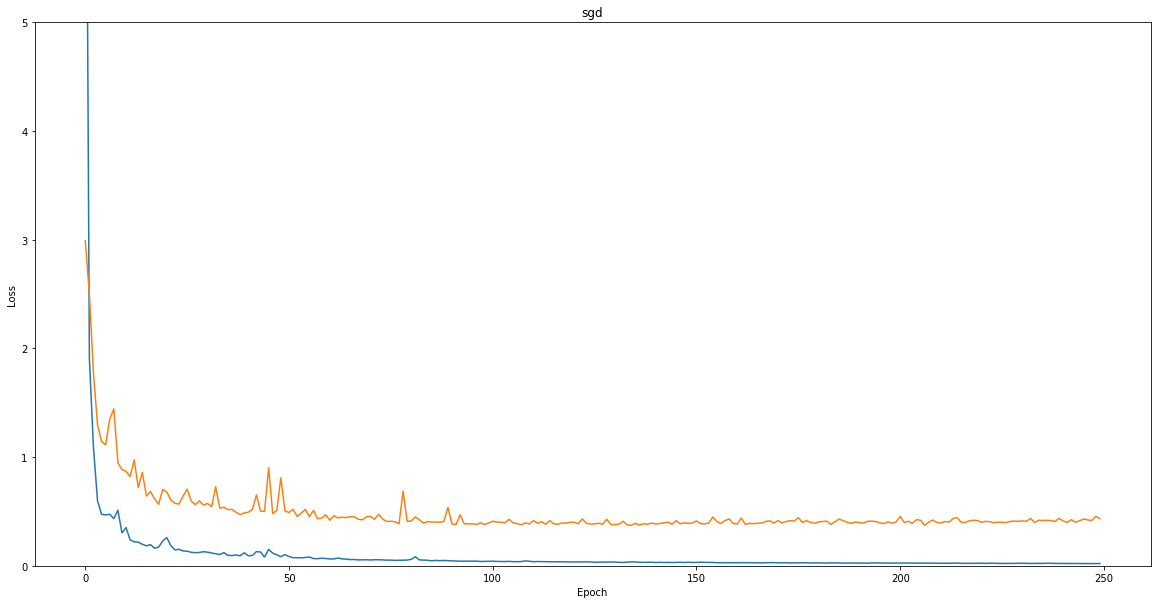

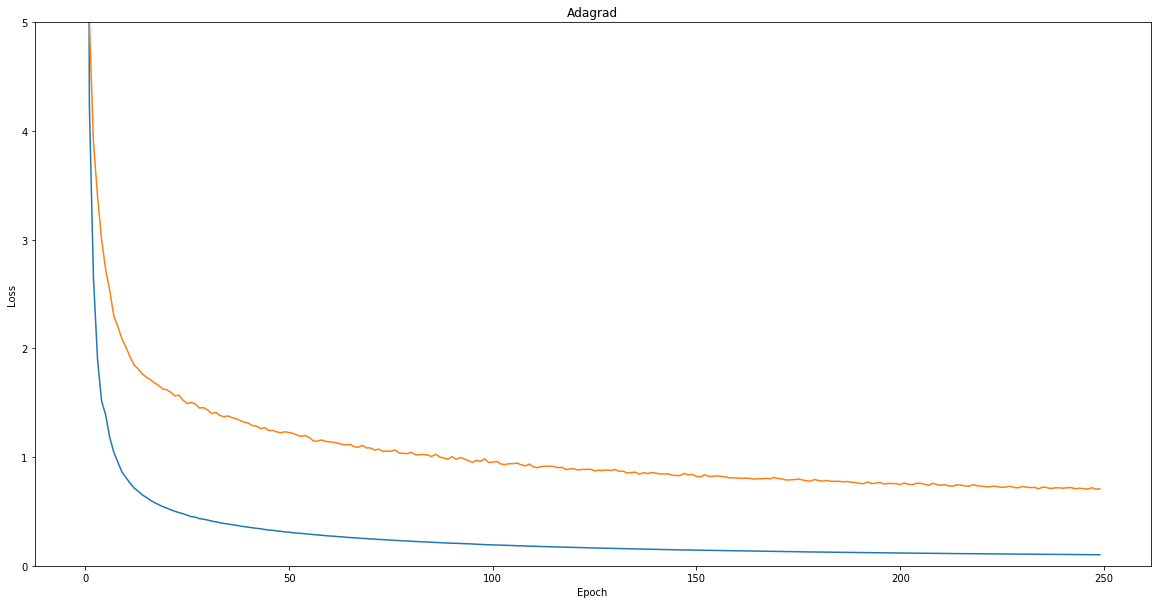

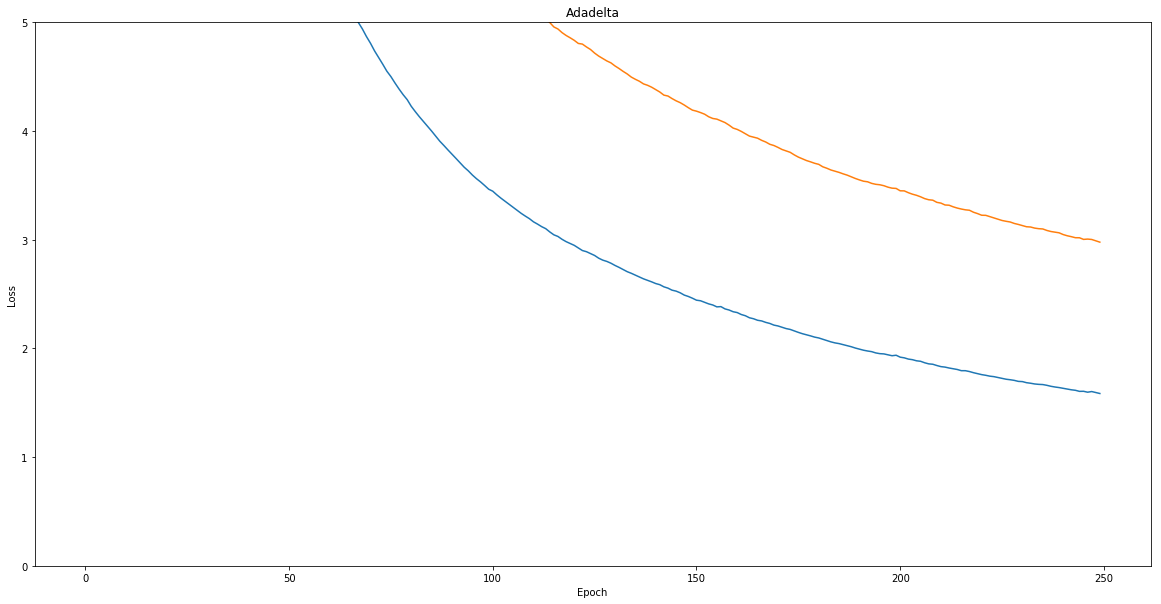

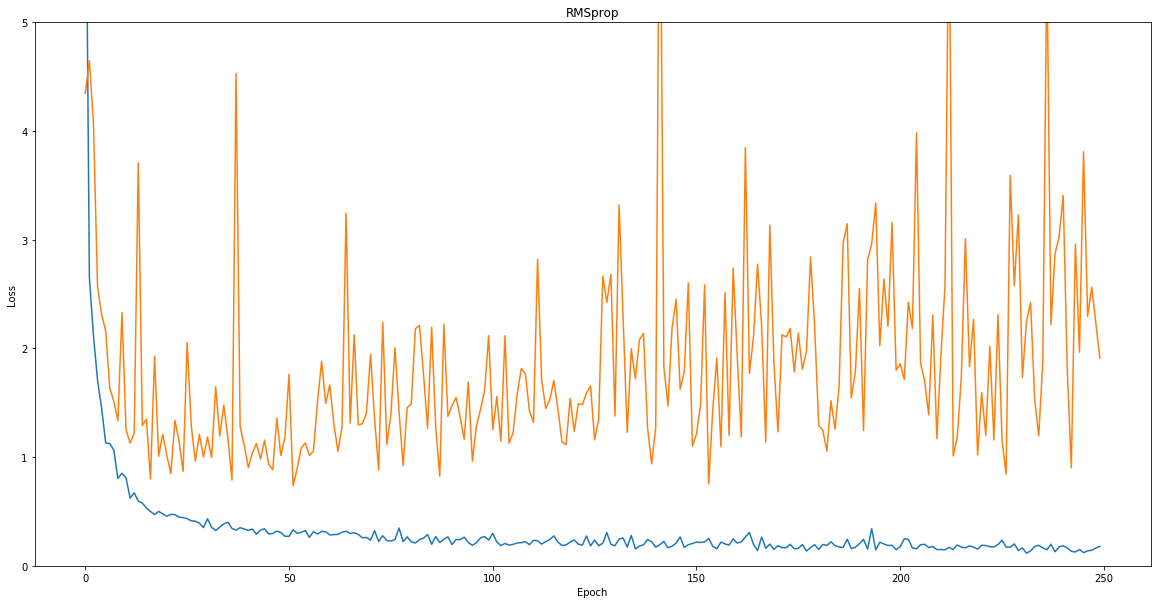

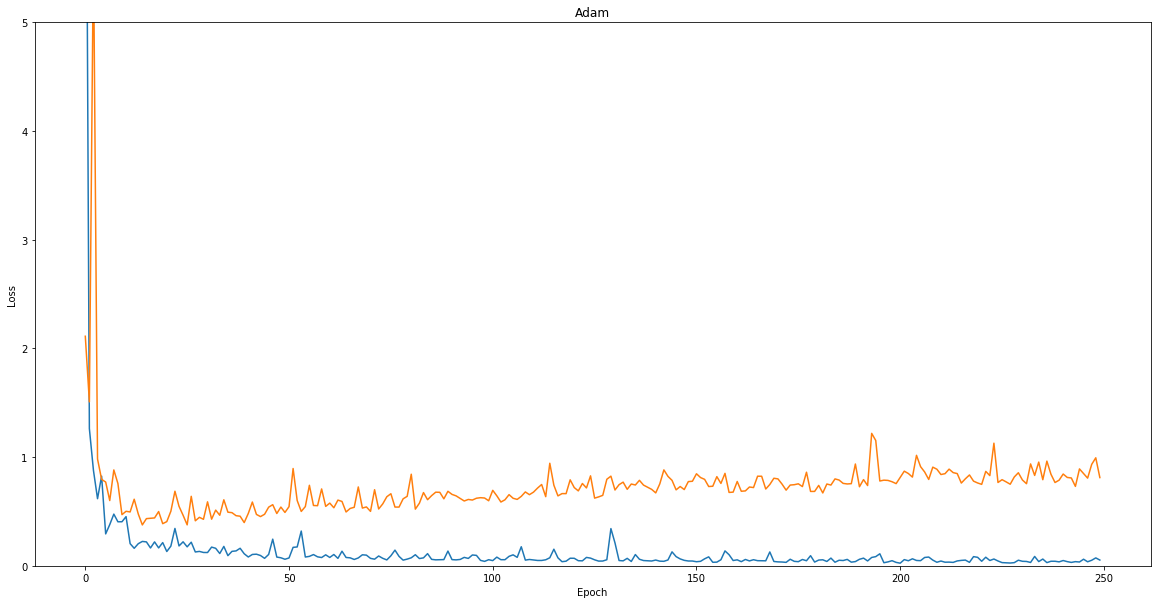

In [37]:
optimizers = [SGD(lr=0.001),Adagrad(lr=0.001),Adadelta(lr=0.001),RMSprop(lr=0.001),Adam(lr=0.001)];
for i in range(5):
    sgd = optimizers[i];
    plt.figure();
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=sgd,loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250,verbose=2, validation_data=(X_val_scaled, y_val))
    plt.plot(history.history['loss'],label='train');
    plt.plot(history.history['val_loss'],label='validation');
    plt.title(optimizers_str[i]);
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.ylim([0,5]);

plt.show();

En este caso se observa el mejor desempeño en sgd y en adagrad. Adadelta tiene una convergencia demasiado lenta. RMSprop tiene un comportamiento similar al anterior (muy ruidoso) y además va aumentando el MSE del validation set (overfitting). Adam tambien comienza a aumentar el MSE del validation set lo que sugiere un overfitting.

Notar que con los esquemas avanzados de learning rate no se tiene problemas de convergencia por el learning rate elegido como si sucedia con sgd.

> h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 2s - loss: 1.5626 - val_loss: 0.7561
Epoch 2/250
 - 1s - loss: 0.6153 - val_loss: 0.5818
Epoch 3/250
 - 1s - loss: 0.5225 - val_loss: 0.4372
Epoch 4/250
 - 1s - loss: 0.4499 - val_loss: 0.4298
Epoch 5/250
 - 1s - loss: 0.3910 - val_loss: 0.3047
Epoch 6/250
 - 1s - loss: 0.3372 - val_loss: 0.2938
Epoch 7/250
 - 1s - loss: 0.2962 - val_loss: 0.2586
Epoch 8/250
 - 1s - loss: 0.2558 - val_loss: 0.2158
Epoch 9/250
 - 1s - loss: 0.2289 - val_loss: 0.2145
Epoch 10/250
 - 1s - loss: 0.2023 - val_loss: 0.1850
Epoch 11/250
 - 1s - loss: 0.1804 - val_loss: 0.1619
Epoch 12/250
 - 1s - loss: 0.1604 - val_loss: 0.1508
Epoch 13/250
 - 1s - loss: 0.1486 - val_loss: 0.1527
Epoch 14/250
 - 1s - loss: 0.1328 - val_loss: 0.1371
Epoch 15/250
 - 1s - loss: 0.1216 - val_loss: 0.1334
Epoch 16/250
 - 1s - loss: 0.1119 - val_loss: 0.1284
Epoch 17/250
 - 1s - loss: 0.1021 - val_loss: 0.1063
Epoch 18/250
 - 1s - loss: 0.0952 - val_loss: 0.1030
Epoch 1

Epoch 154/250
 - 1s - loss: 0.0202 - val_loss: 0.0426
Epoch 155/250
 - 1s - loss: 0.0205 - val_loss: 0.0402
Epoch 156/250
 - 1s - loss: 0.0201 - val_loss: 0.0464
Epoch 157/250
 - 1s - loss: 0.0195 - val_loss: 0.0458
Epoch 158/250
 - 1s - loss: 0.0197 - val_loss: 0.0475
Epoch 159/250
 - 1s - loss: 0.0198 - val_loss: 0.0398
Epoch 160/250
 - 1s - loss: 0.0195 - val_loss: 0.0418
Epoch 161/250
 - 1s - loss: 0.0199 - val_loss: 0.0648
Epoch 162/250
 - 1s - loss: 0.0198 - val_loss: 0.0398
Epoch 163/250
 - 1s - loss: 0.0200 - val_loss: 0.0434
Epoch 164/250
 - 1s - loss: 0.0190 - val_loss: 0.0445
Epoch 165/250
 - 1s - loss: 0.0199 - val_loss: 0.0624
Epoch 166/250
 - 1s - loss: 0.0207 - val_loss: 0.0408
Epoch 167/250
 - 1s - loss: 0.0198 - val_loss: 0.0502
Epoch 168/250
 - 1s - loss: 0.0196 - val_loss: 0.0476
Epoch 169/250
 - 1s - loss: 0.0191 - val_loss: 0.0476
Epoch 170/250
 - 1s - loss: 0.0186 - val_loss: 0.0486
Epoch 171/250
 - 1s - loss: 0.0193 - val_loss: 0.0408
Epoch 172/250
 - 1s - loss: 

/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`


 - 3s - loss: 44.2350 - val_loss: 14.1255
Epoch 2/250
 - 1s - loss: 5.2979 - val_loss: 2.4997
Epoch 3/250
 - 1s - loss: 2.4856 - val_loss: 2.1994
Epoch 4/250
 - 1s - loss: 2.3026 - val_loss: 2.1883
Epoch 5/250
 - 1s - loss: 2.2741 - val_loss: 2.8869
Epoch 6/250
 - 1s - loss: 2.2574 - val_loss: 6.1622
Epoch 7/250
 - 1s - loss: 2.2407 - val_loss: 1.9080
Epoch 8/250
 - 1s - loss: 2.2438 - val_loss: 1.5828
Epoch 9/250
 - 1s - loss: 2.1076 - val_loss: 1.7932
Epoch 10/250
 - 1s - loss: 2.1278 - val_loss: 2.0512
Epoch 11/250
 - 1s - loss: 2.1705 - val_loss: 1.4240
Epoch 12/250
 - 1s - loss: 2.1963 - val_loss: 1.7255
Epoch 13/250
 - 1s - loss: 2.1786 - val_loss: 1.4127
Epoch 14/250
 - 1s - loss: 2.1872 - val_loss: 1.6766
Epoch 15/250
 - 1s - loss: 2.0696 - val_loss: 1.5573
Epoch 16/250
 - 1s - loss: 2.0665 - val_loss: 2.4307
Epoch 17/250
 - 1s - loss: 2.0707 - val_loss: 1.6919
Epoch 18/250
 - 1s - loss: 1.9298 - val_loss: 1.2972
Epoch 19/250
 - 1s - loss: 2.1135 - val_loss: 1.8798
Epoch 20/250

Epoch 155/250
 - 1s - loss: 1.0234 - val_loss: 0.9266
Epoch 156/250
 - 1s - loss: 0.9388 - val_loss: 0.7869
Epoch 157/250
 - 1s - loss: 0.9603 - val_loss: 0.7813
Epoch 158/250
 - 1s - loss: 0.9379 - val_loss: 1.4344
Epoch 159/250
 - 1s - loss: 0.9614 - val_loss: 0.8488
Epoch 160/250
 - 1s - loss: 0.9536 - val_loss: 0.9907
Epoch 161/250
 - 1s - loss: 0.9148 - val_loss: 0.9686
Epoch 162/250
 - 1s - loss: 0.9388 - val_loss: 1.2809
Epoch 163/250
 - 1s - loss: 0.9511 - val_loss: 0.7754
Epoch 164/250
 - 1s - loss: 0.9532 - val_loss: 0.8725
Epoch 165/250
 - 1s - loss: 0.9051 - val_loss: 0.9714
Epoch 166/250
 - 1s - loss: 0.9622 - val_loss: 1.3555
Epoch 167/250
 - 1s - loss: 0.9514 - val_loss: 0.8199
Epoch 168/250
 - 1s - loss: 1.0685 - val_loss: 1.0072
Epoch 169/250
 - 1s - loss: 0.9968 - val_loss: 1.1800
Epoch 170/250
 - 1s - loss: 0.9129 - val_loss: 1.0542
Epoch 171/250
 - 1s - loss: 0.9323 - val_loss: 0.8594
Epoch 172/250
 - 1s - loss: 0.9134 - val_loss: 1.3517
Epoch 173/250
 - 1s - loss: 

/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`


 - 2s - loss: 4.0297 - val_loss: 3.0008
Epoch 2/250
 - 1s - loss: 2.9337 - val_loss: 2.6653
Epoch 3/250
 - 1s - loss: 2.5973 - val_loss: 2.3671
Epoch 4/250
 - 1s - loss: 2.3128 - val_loss: 2.1313
Epoch 5/250
 - 1s - loss: 2.0662 - val_loss: 1.9196
Epoch 6/250
 - 1s - loss: 1.8586 - val_loss: 1.7090
Epoch 7/250
 - 1s - loss: 1.6762 - val_loss: 1.5581
Epoch 8/250
 - 1s - loss: 1.5169 - val_loss: 1.3986
Epoch 9/250
 - 1s - loss: 1.3787 - val_loss: 1.3602
Epoch 10/250
 - 1s - loss: 1.2585 - val_loss: 1.1993
Epoch 11/250
 - 1s - loss: 1.1490 - val_loss: 1.1253
Epoch 12/250
 - 1s - loss: 1.0562 - val_loss: 1.0222
Epoch 13/250
 - 1s - loss: 0.9726 - val_loss: 0.9470
Epoch 14/250
 - 1s - loss: 0.8974 - val_loss: 0.8550
Epoch 15/250
 - 1s - loss: 0.8344 - val_loss: 0.8855
Epoch 16/250
 - 1s - loss: 0.7746 - val_loss: 0.7468
Epoch 17/250
 - 1s - loss: 0.7246 - val_loss: 0.6869
Epoch 18/250
 - 1s - loss: 0.6804 - val_loss: 0.6384
Epoch 19/250
 - 1s - loss: 0.6399 - val_loss: 0.6064
Epoch 20/250
 

Epoch 155/250
 - 1s - loss: 0.2873 - val_loss: 0.2945
Epoch 156/250
 - 1s - loss: 0.2894 - val_loss: 0.3000
Epoch 157/250
 - 1s - loss: 0.2874 - val_loss: 0.3249
Epoch 158/250
 - 1s - loss: 0.2829 - val_loss: 0.3287
Epoch 159/250
 - 1s - loss: 0.2884 - val_loss: 0.2870
Epoch 160/250
 - 1s - loss: 0.2852 - val_loss: 0.3846
Epoch 161/250
 - 1s - loss: 0.2853 - val_loss: 0.2984
Epoch 162/250
 - 1s - loss: 0.2894 - val_loss: 0.2972
Epoch 163/250
 - 1s - loss: 0.2851 - val_loss: 0.3148
Epoch 164/250
 - 1s - loss: 0.2858 - val_loss: 0.3447
Epoch 165/250
 - 1s - loss: 0.2865 - val_loss: 0.4552
Epoch 166/250
 - 1s - loss: 0.2894 - val_loss: 0.2951
Epoch 167/250
 - 1s - loss: 0.2842 - val_loss: 0.3254
Epoch 168/250
 - 1s - loss: 0.2878 - val_loss: 0.2886
Epoch 169/250
 - 1s - loss: 0.2842 - val_loss: 0.3110
Epoch 170/250
 - 1s - loss: 0.2862 - val_loss: 0.4247
Epoch 171/250
 - 1s - loss: 0.2876 - val_loss: 0.2853
Epoch 172/250
 - 1s - loss: 0.2837 - val_loss: 0.2862
Epoch 173/250
 - 1s - loss: 

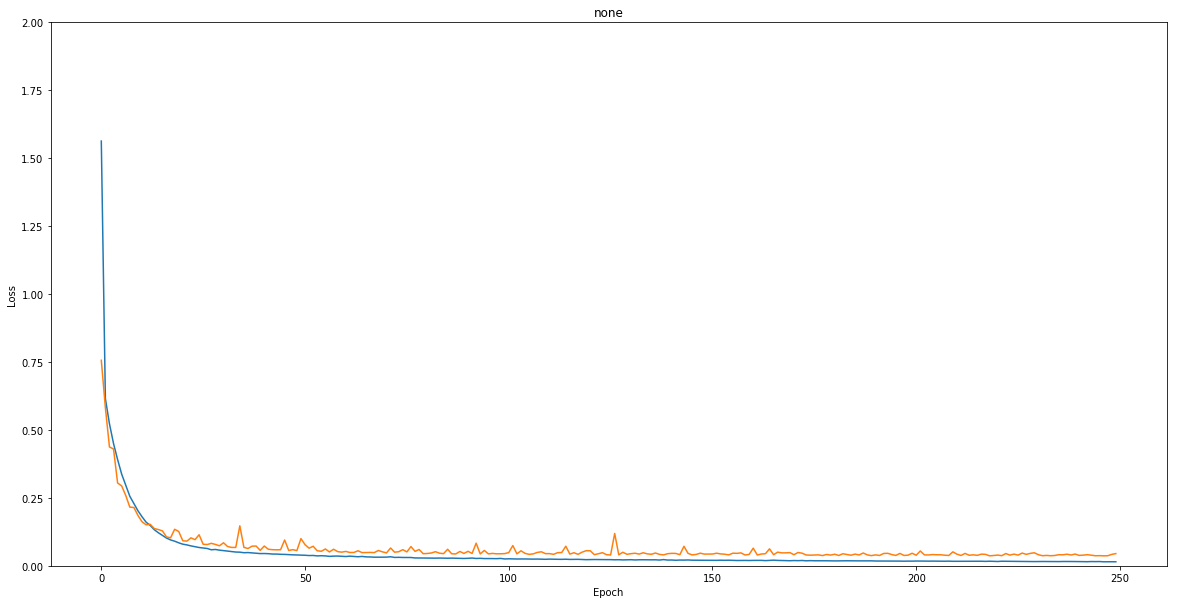

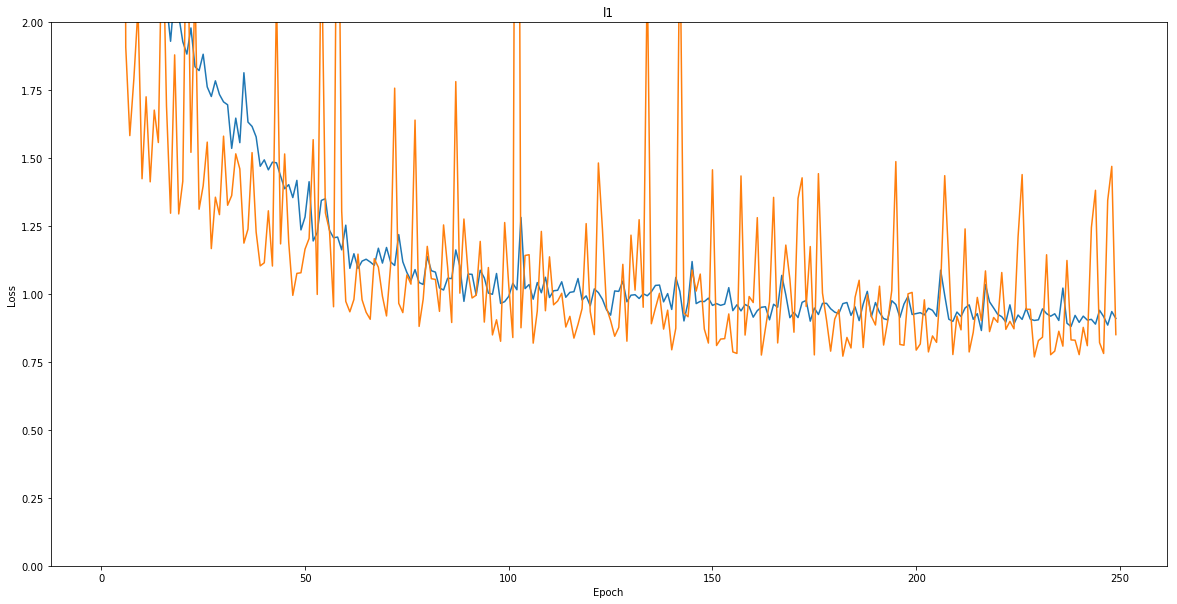

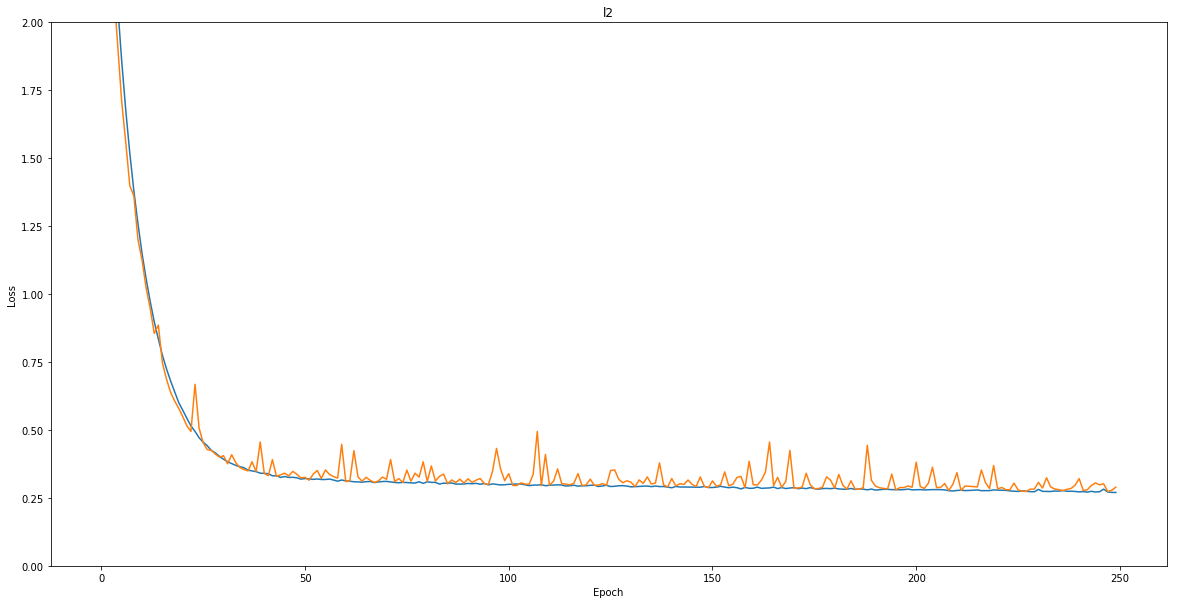

<Figure size 1440x720 with 0 Axes>

In [38]:
from keras.regularizers import l1,l2
e=250;

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('none');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);


plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',W_regularizer=l1(0.01)
                ,activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l1(0.01),activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('l1');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);


plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',W_regularizer=l2(0.01)
                ,activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l2(0.01),activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('l2');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.show();
plt.tight_layout();
plt.rcParams["figure.figsize"]=[15,5];



El uso de regularizadores se justifican cuando existe un overfitting, lo que no es un problema en este caso, por lo anterior el desempeño solo baja al ocupar regularizadores.

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 2s - loss: 9.1813 - val_loss: 5.6101
Epoch 2/250
 - 1s - loss: 1.7880 - val_loss: 1.7692
Epoch 3/250
 - 1s - loss: 0.9077 - val_loss: 1.9898
Epoch 4/250
 - 1s - loss: 0.8281 - val_loss: 1.2949
Epoch 5/250
 - 1s - loss: 0.6624 - val_loss: 1.1467
Epoch 6/250
 - 1s - loss: 0.4897 - val_loss: 1.0316
Epoch 7/250
 - 1s - loss: 0.4194 - val_loss: 1.0223
Epoch 8/250
 - 1s - loss: 0.3994 - val_loss: 1.0513
Epoch 9/250
 - 1s - loss: 0.3776 - val_loss: 0.8478
Epoch 10/250
 - 1s - loss: 0.3881 - val_loss: 0.8768
Epoch 11/250
 - 1s - loss: 0.2882 - val_loss: 0.7994
Epoch 12/250
 - 1s - loss: 0.2658 - val_loss: 0.8273
Epoch 13/250
 - 1s - loss: 0.2354 - val_loss: 0.7275
Epoch 14/250
 - 1s - loss: 0.2320 - val_loss: 0.7627
Epoch 15/250
 - 1s - loss: 0.2197 - val_loss: 0.7059
Epoch 16/250
 - 1s - loss: 0.2256 - val_loss: 0.5893
Epoch 17/250
 - 1s - loss: 0.1794 - val_loss: 0.6378
Epoch 18/250
 - 1s - loss: 0.1770 - val_loss: 0.6216
Epoch 1

Epoch 154/250
 - 1s - loss: 0.0307 - val_loss: 0.3104
Epoch 155/250
 - 1s - loss: 0.0350 - val_loss: 0.3221
Epoch 156/250
 - 1s - loss: 0.0324 - val_loss: 0.3321
Epoch 157/250
 - 1s - loss: 0.0301 - val_loss: 0.4499
Epoch 158/250
 - 1s - loss: 0.0312 - val_loss: 0.3558
Epoch 159/250
 - 1s - loss: 0.0294 - val_loss: 0.3170
Epoch 160/250
 - 1s - loss: 0.0278 - val_loss: 0.4102
Epoch 161/250
 - 1s - loss: 0.0293 - val_loss: 0.3324
Epoch 162/250
 - 1s - loss: 0.0272 - val_loss: 0.3213
Epoch 163/250
 - 1s - loss: 0.0274 - val_loss: 0.3292
Epoch 164/250
 - 1s - loss: 0.0272 - val_loss: 0.3490
Epoch 165/250
 - 1s - loss: 0.0296 - val_loss: 0.3230
Epoch 166/250
 - 1s - loss: 0.0298 - val_loss: 0.3291
Epoch 167/250
 - 1s - loss: 0.0279 - val_loss: 0.3196
Epoch 168/250
 - 1s - loss: 0.0299 - val_loss: 0.3332
Epoch 169/250
 - 1s - loss: 0.0272 - val_loss: 0.3248
Epoch 170/250
 - 1s - loss: 0.0279 - val_loss: 0.4054
Epoch 171/250
 - 1s - loss: 0.0270 - val_loss: 0.3164
Epoch 172/250
 - 1s - loss: 

/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`


 - 2s - loss: 86.5779 - val_loss: 75.5287
Epoch 2/250
 - 1s - loss: 69.8009 - val_loss: 66.0080
Epoch 3/250
 - 1s - loss: 60.4830 - val_loss: 56.6921
Epoch 4/250
 - 1s - loss: 51.9909 - val_loss: 48.7769
Epoch 5/250
 - 1s - loss: 44.4146 - val_loss: 41.4827
Epoch 6/250
 - 1s - loss: 38.2176 - val_loss: 36.0126
Epoch 7/250
 - 1s - loss: 31.5509 - val_loss: 28.9786
Epoch 8/250
 - 1s - loss: 26.0287 - val_loss: 23.7037
Epoch 9/250
 - 1s - loss: 20.7864 - val_loss: 18.9741
Epoch 10/250
 - 1s - loss: 16.3977 - val_loss: 15.1829
Epoch 11/250
 - 1s - loss: 12.7081 - val_loss: 12.6550
Epoch 12/250
 - 1s - loss: 9.6828 - val_loss: 8.5249
Epoch 13/250
 - 1s - loss: 7.4912 - val_loss: 7.0634
Epoch 14/250
 - 1s - loss: 6.0613 - val_loss: 5.1365
Epoch 15/250
 - 1s - loss: 4.4677 - val_loss: 4.2206
Epoch 16/250
 - 1s - loss: 3.6728 - val_loss: 3.8073
Epoch 17/250
 - 1s - loss: 3.8111 - val_loss: 4.2909
Epoch 18/250
 - 1s - loss: 3.5969 - val_loss: 2.8028
Epoch 19/250
 - 1s - loss: 3.5741 - val_loss:

Epoch 155/250
 - 1s - loss: 1.0104 - val_loss: 0.8256
Epoch 156/250
 - 1s - loss: 0.6610 - val_loss: 0.9675
Epoch 157/250
 - 1s - loss: 0.8357 - val_loss: 0.8277
Epoch 158/250
 - 1s - loss: 0.6847 - val_loss: 1.1250
Epoch 159/250
 - 1s - loss: 0.7299 - val_loss: 0.9898
Epoch 160/250
 - 1s - loss: 0.7996 - val_loss: 0.6787
Epoch 161/250
 - 1s - loss: 0.6955 - val_loss: 0.6977
Epoch 162/250
 - 1s - loss: 0.7080 - val_loss: 0.6281
Epoch 163/250
 - 1s - loss: 1.1328 - val_loss: 0.8750
Epoch 164/250
 - 1s - loss: 0.6969 - val_loss: 0.7439
Epoch 165/250
 - 1s - loss: 0.7171 - val_loss: 0.6766
Epoch 166/250
 - 1s - loss: 0.6178 - val_loss: 0.6177
Epoch 167/250
 - 1s - loss: 1.1132 - val_loss: 0.8937
Epoch 168/250
 - 1s - loss: 0.7413 - val_loss: 0.7940
Epoch 169/250
 - 1s - loss: 0.9543 - val_loss: 1.3265
Epoch 170/250
 - 1s - loss: 0.7024 - val_loss: 0.7006
Epoch 171/250
 - 1s - loss: 0.7668 - val_loss: 0.6857
Epoch 172/250
 - 1s - loss: 0.7636 - val_loss: 0.6110
Epoch 173/250
 - 1s - loss: 

/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/home/gabrielrudloff/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`


 - 2s - loss: 12.0128 - val_loss: 6.8956
Epoch 2/250
 - 1s - loss: 4.8051 - val_loss: 4.5096
Epoch 3/250
 - 1s - loss: 3.6636 - val_loss: 4.4336
Epoch 4/250
 - 1s - loss: 3.4156 - val_loss: 4.2333
Epoch 5/250
 - 1s - loss: 3.3669 - val_loss: 4.0275
Epoch 6/250
 - 1s - loss: 3.1321 - val_loss: 3.9450
Epoch 7/250
 - 1s - loss: 2.9969 - val_loss: 4.0197
Epoch 8/250
 - 1s - loss: 2.9135 - val_loss: 3.7392
Epoch 9/250
 - 1s - loss: 2.8530 - val_loss: 3.9025
Epoch 10/250
 - 1s - loss: 2.7854 - val_loss: 3.5457
Epoch 11/250
 - 1s - loss: 2.7842 - val_loss: 3.4729
Epoch 12/250
 - 1s - loss: 2.7172 - val_loss: 10.6163
Epoch 13/250
 - 1s - loss: 2.6866 - val_loss: 3.3694
Epoch 14/250
 - 1s - loss: 2.6331 - val_loss: 3.4425
Epoch 15/250
 - 1s - loss: 2.5906 - val_loss: 3.3334
Epoch 16/250
 - 1s - loss: 2.5420 - val_loss: 3.1737
Epoch 17/250
 - 1s - loss: 2.4947 - val_loss: 3.1142
Epoch 18/250
 - 1s - loss: 2.5068 - val_loss: 3.2702
Epoch 19/250
 - 1s - loss: 2.4363 - val_loss: 3.0186
Epoch 20/250

Epoch 155/250
 - 1s - loss: 0.6130 - val_loss: 1.0624
Epoch 156/250
 - 1s - loss: 0.6247 - val_loss: 1.1475
Epoch 157/250
 - 1s - loss: 0.5732 - val_loss: 1.0659
Epoch 158/250
 - 1s - loss: 0.5797 - val_loss: 1.0941
Epoch 159/250
 - 1s - loss: 0.6031 - val_loss: 1.0496
Epoch 160/250
 - 1s - loss: 0.5803 - val_loss: 1.0398
Epoch 161/250
 - 1s - loss: 0.5566 - val_loss: 1.0553
Epoch 162/250
 - 1s - loss: 0.5553 - val_loss: 1.0166
Epoch 163/250
 - 1s - loss: 0.5466 - val_loss: 1.0421
Epoch 164/250
 - 1s - loss: 0.5487 - val_loss: 1.0383
Epoch 165/250
 - 1s - loss: 0.5497 - val_loss: 1.0456
Epoch 166/250
 - 1s - loss: 0.5528 - val_loss: 1.0606
Epoch 167/250
 - 1s - loss: 0.6074 - val_loss: 1.0563
Epoch 168/250
 - 1s - loss: 0.5405 - val_loss: 0.9903
Epoch 169/250
 - 1s - loss: 0.5327 - val_loss: 0.9888
Epoch 170/250
 - 1s - loss: 0.5174 - val_loss: 0.9857
Epoch 171/250
 - 1s - loss: 0.5234 - val_loss: 0.9623
Epoch 172/250
 - 1s - loss: 0.5057 - val_loss: 0.9815
Epoch 173/250
 - 1s - loss: 

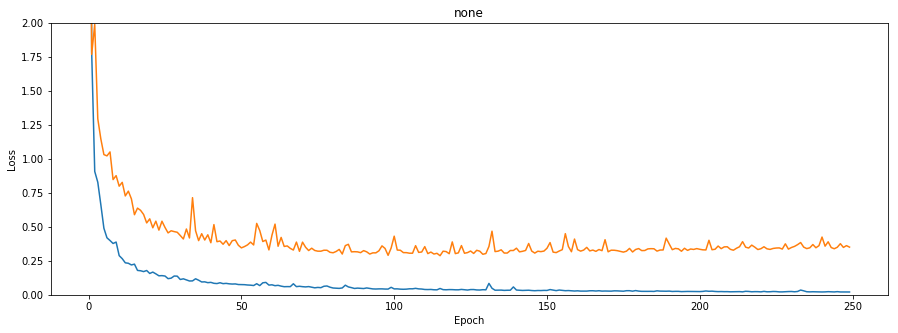

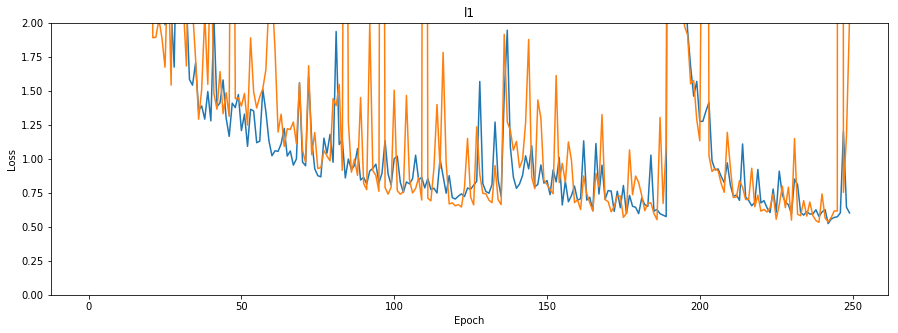

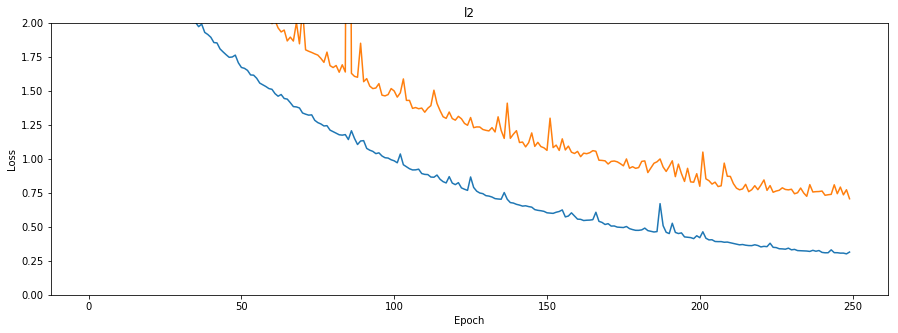

In [39]:
e=250;

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('none');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);


plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',W_regularizer=l1(0.01)
                ,activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l1(0.01),activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('l1');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);


plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',W_regularizer=l2(0.01)
                ,activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l2(0.01),activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('l2');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.show();


El resultado es analogo al anterior, el desempeño solo baja al utilizar regularizadores.

> i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 2s - loss: 1.5343 - val_loss: 0.5517
Epoch 2/250
 - 1s - loss: 0.6099 - val_loss: 0.4749
Epoch 3/250
 - 1s - loss: 0.5010 - val_loss: 0.4645
Epoch 4/250
 - 1s - loss: 0.4266 - val_loss: 0.5892
Epoch 5/250
 - 1s - loss: 0.3720 - val_loss: 0.3857
Epoch 6/250
 - 1s - loss: 0.3272 - val_loss: 0.2696
Epoch 7/250
 - 1s - loss: 0.2892 - val_loss: 0.2358
Epoch 8/250
 - 1s - loss: 0.2552 - val_loss: 0.2152
Epoch 9/250
 - 1s - loss: 0.2310 - val_loss: 0.2372
Epoch 10/250
 - 1s - loss: 0.2065 - val_loss: 0.1838
Epoch 11/250
 - 1s - loss: 0.1843 - val_loss: 0.1742
Epoch 12/250
 - 1s - loss: 0.1630 - val_loss: 0.1568
Epoch 13/250
 - 1s - loss: 0.1504 - val_loss: 0.1442
Epoch 14/250
 - 1s - loss: 0.1375 - val_loss: 0.1539
Epoch 15/250
 - 1s - loss: 0.1261 - val_loss: 0.1411
Epoch 16/250
 - 1s - loss: 0.1148 - val_loss: 0.1179
Epoch 17/250
 - 1s - loss: 0.1077 - val_loss: 0.1152
Epoch 18/250
 - 1s - loss: 0.1010 - val_loss: 0.1508
Epoch 1

Epoch 154/250
 - 1s - loss: 0.0199 - val_loss: 0.0395
Epoch 155/250
 - 1s - loss: 0.0198 - val_loss: 0.0377
Epoch 156/250
 - 1s - loss: 0.0201 - val_loss: 0.0739
Epoch 157/250
 - 1s - loss: 0.0200 - val_loss: 0.0473
Epoch 158/250
 - 1s - loss: 0.0196 - val_loss: 0.0377
Epoch 159/250
 - 1s - loss: 0.0187 - val_loss: 0.0411
Epoch 160/250
 - 1s - loss: 0.0191 - val_loss: 0.0396
Epoch 161/250
 - 1s - loss: 0.0194 - val_loss: 0.0390
Epoch 162/250
 - 1s - loss: 0.0193 - val_loss: 0.0494
Epoch 163/250
 - 1s - loss: 0.0191 - val_loss: 0.0382
Epoch 164/250
 - 1s - loss: 0.0194 - val_loss: 0.0461
Epoch 165/250
 - 1s - loss: 0.0187 - val_loss: 0.0405
Epoch 166/250
 - 1s - loss: 0.0183 - val_loss: 0.0378
Epoch 167/250
 - 1s - loss: 0.0186 - val_loss: 0.0421
Epoch 168/250
 - 1s - loss: 0.0189 - val_loss: 0.0371
Epoch 169/250
 - 1s - loss: 0.0185 - val_loss: 0.0371
Epoch 170/250
 - 1s - loss: 0.0183 - val_loss: 0.0413
Epoch 171/250
 - 1s - loss: 0.0183 - val_loss: 0.0450
Epoch 172/250
 - 1s - loss: 

 - 1s - loss: 0.2453 - val_loss: 0.1450
Epoch 57/250
 - 1s - loss: 0.2410 - val_loss: 0.1431
Epoch 58/250
 - 1s - loss: 0.2359 - val_loss: 0.1865
Epoch 59/250
 - 1s - loss: 0.2386 - val_loss: 0.1370
Epoch 60/250
 - 1s - loss: 0.2410 - val_loss: 0.1372
Epoch 61/250
 - 1s - loss: 0.2367 - val_loss: 0.1434
Epoch 62/250
 - 1s - loss: 0.2335 - val_loss: 0.1408
Epoch 63/250
 - 1s - loss: 0.2332 - val_loss: 0.1618
Epoch 64/250
 - 1s - loss: 0.2361 - val_loss: 0.1585
Epoch 65/250
 - 1s - loss: 0.2301 - val_loss: 0.1497
Epoch 66/250
 - 1s - loss: 0.2309 - val_loss: 0.1424
Epoch 67/250
 - 1s - loss: 0.2311 - val_loss: 0.1388
Epoch 68/250
 - 1s - loss: 0.2323 - val_loss: 0.1652
Epoch 69/250
 - 1s - loss: 0.2304 - val_loss: 0.1505
Epoch 70/250
 - 1s - loss: 0.2270 - val_loss: 0.1372
Epoch 71/250
 - 1s - loss: 0.2281 - val_loss: 0.1347
Epoch 72/250
 - 1s - loss: 0.2241 - val_loss: 0.1488
Epoch 73/250
 - 1s - loss: 0.2256 - val_loss: 0.1285
Epoch 74/250
 - 1s - loss: 0.2216 - val_loss: 0.1311
Epoch 

Epoch 209/250
 - 1s - loss: 0.1647 - val_loss: 0.1032
Epoch 210/250
 - 1s - loss: 0.1694 - val_loss: 0.1075
Epoch 211/250
 - 1s - loss: 0.1699 - val_loss: 0.1201
Epoch 212/250
 - 1s - loss: 0.1669 - val_loss: 0.1060
Epoch 213/250
 - 1s - loss: 0.1684 - val_loss: 0.1072
Epoch 214/250
 - 1s - loss: 0.1674 - val_loss: 0.1142
Epoch 215/250
 - 1s - loss: 0.1682 - val_loss: 0.1865
Epoch 216/250
 - 1s - loss: 0.1679 - val_loss: 0.1098
Epoch 217/250
 - 1s - loss: 0.1667 - val_loss: 0.1014
Epoch 218/250
 - 1s - loss: 0.1679 - val_loss: 0.1018
Epoch 219/250
 - 1s - loss: 0.1686 - val_loss: 0.1019
Epoch 220/250
 - 1s - loss: 0.1635 - val_loss: 0.1065
Epoch 221/250
 - 1s - loss: 0.1685 - val_loss: 0.1066
Epoch 222/250
 - 1s - loss: 0.1607 - val_loss: 0.1083
Epoch 223/250
 - 1s - loss: 0.1657 - val_loss: 0.1170
Epoch 224/250
 - 1s - loss: 0.1679 - val_loss: 0.1268
Epoch 225/250
 - 1s - loss: 0.1614 - val_loss: 0.1067
Epoch 226/250
 - 1s - loss: 0.1684 - val_loss: 0.1227
Epoch 227/250
 - 1s - loss: 

Epoch 112/250
 - 1s - loss: 0.2884 - val_loss: 0.1820
Epoch 113/250
 - 1s - loss: 0.2831 - val_loss: 0.1684
Epoch 114/250
 - 1s - loss: 0.2885 - val_loss: 0.1709
Epoch 115/250
 - 1s - loss: 0.2941 - val_loss: 0.1810
Epoch 116/250
 - 1s - loss: 0.2820 - val_loss: 0.1737
Epoch 117/250
 - 1s - loss: 0.2895 - val_loss: 0.1741
Epoch 118/250
 - 1s - loss: 0.2859 - val_loss: 0.1557
Epoch 119/250
 - 1s - loss: 0.2906 - val_loss: 0.1549
Epoch 120/250
 - 1s - loss: 0.2818 - val_loss: 0.2735
Epoch 121/250
 - 1s - loss: 0.2896 - val_loss: 0.1711
Epoch 122/250
 - 1s - loss: 0.2852 - val_loss: 0.1742
Epoch 123/250
 - 1s - loss: 0.2845 - val_loss: 0.1643
Epoch 124/250
 - 1s - loss: 0.2771 - val_loss: 0.1705
Epoch 125/250
 - 1s - loss: 0.2801 - val_loss: 0.1515
Epoch 126/250
 - 1s - loss: 0.2798 - val_loss: 0.1684
Epoch 127/250
 - 1s - loss: 0.2811 - val_loss: 0.1998
Epoch 128/250
 - 1s - loss: 0.2888 - val_loss: 0.1972
Epoch 129/250
 - 1s - loss: 0.2770 - val_loss: 0.2120
Epoch 130/250
 - 1s - loss: 

 - 1s - loss: 0.6307 - val_loss: 0.3302
Epoch 14/250
 - 1s - loss: 0.6098 - val_loss: 0.7418
Epoch 15/250
 - 1s - loss: 0.5873 - val_loss: 0.3000
Epoch 16/250
 - 1s - loss: 0.5916 - val_loss: 0.3097
Epoch 17/250
 - 1s - loss: 0.5766 - val_loss: 0.2996
Epoch 18/250
 - 1s - loss: 0.5707 - val_loss: 0.3194
Epoch 19/250
 - 1s - loss: 0.5567 - val_loss: 0.3243
Epoch 20/250
 - 1s - loss: 0.5445 - val_loss: 0.3009
Epoch 21/250
 - 1s - loss: 0.5518 - val_loss: 0.2678
Epoch 22/250
 - 1s - loss: 0.5544 - val_loss: 0.3641
Epoch 23/250
 - 1s - loss: 0.5306 - val_loss: 0.2978
Epoch 24/250
 - 1s - loss: 0.5348 - val_loss: 0.3430
Epoch 25/250
 - 1s - loss: 0.5243 - val_loss: 0.2791
Epoch 26/250
 - 1s - loss: 0.5132 - val_loss: 0.3300
Epoch 27/250
 - 1s - loss: 0.5151 - val_loss: 0.2642
Epoch 28/250
 - 1s - loss: 0.5061 - val_loss: 0.2500
Epoch 29/250
 - 1s - loss: 0.5066 - val_loss: 0.3916
Epoch 30/250
 - 1s - loss: 0.5060 - val_loss: 0.2378
Epoch 31/250
 - 1s - loss: 0.5024 - val_loss: 0.2528
Epoch 

Epoch 167/250
 - 1s - loss: 0.3431 - val_loss: 0.2100
Epoch 168/250
 - 1s - loss: 0.3489 - val_loss: 0.1751
Epoch 169/250
 - 1s - loss: 0.3379 - val_loss: 0.2239
Epoch 170/250
 - 1s - loss: 0.3411 - val_loss: 0.2299
Epoch 171/250
 - 1s - loss: 0.3482 - val_loss: 0.1753
Epoch 172/250
 - 1s - loss: 0.3444 - val_loss: 0.2166
Epoch 173/250
 - 1s - loss: 0.3382 - val_loss: 0.1831
Epoch 174/250
 - 1s - loss: 0.3455 - val_loss: 0.2374
Epoch 175/250
 - 1s - loss: 0.3418 - val_loss: 0.1787
Epoch 176/250
 - 1s - loss: 0.3480 - val_loss: 0.2178
Epoch 177/250
 - 1s - loss: 0.3455 - val_loss: 0.1875
Epoch 178/250
 - 1s - loss: 0.3426 - val_loss: 0.2183
Epoch 179/250
 - 1s - loss: 0.3412 - val_loss: 0.1705
Epoch 180/250
 - 1s - loss: 0.3435 - val_loss: 0.2179
Epoch 181/250
 - 1s - loss: 0.3529 - val_loss: 0.4878
Epoch 182/250
 - 1s - loss: 0.3346 - val_loss: 0.1767
Epoch 183/250
 - 1s - loss: 0.3453 - val_loss: 0.2119
Epoch 184/250
 - 1s - loss: 0.3379 - val_loss: 0.1845
Epoch 185/250
 - 1s - loss: 

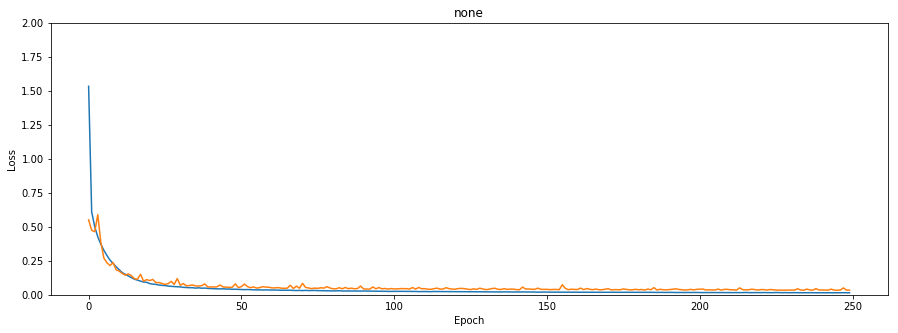

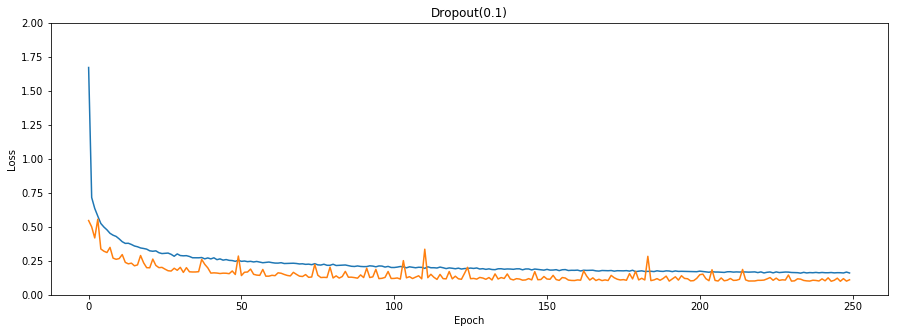

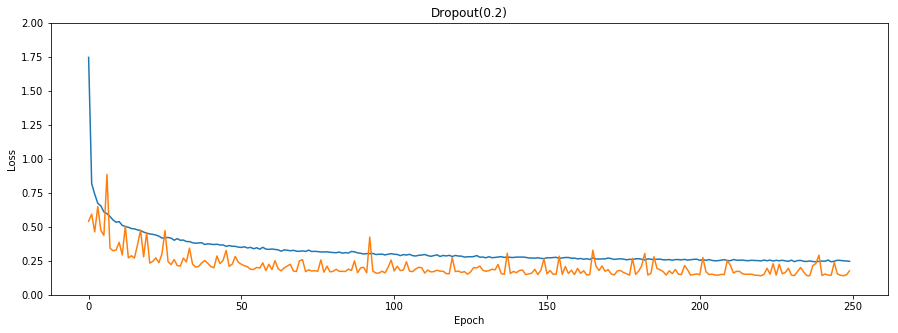

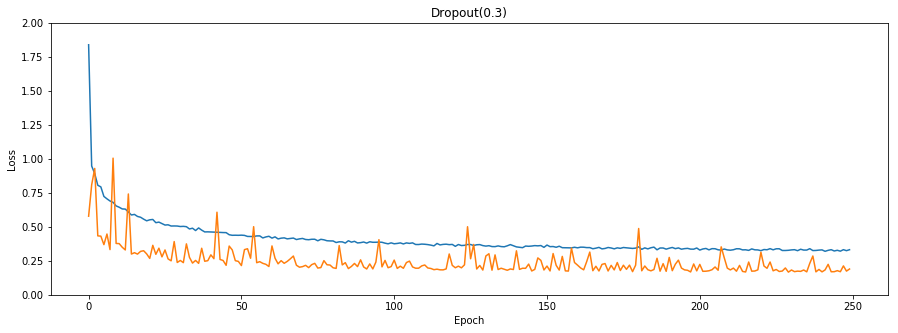

In [40]:
from keras.layers import Dropout
e=250;

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('none');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);


plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('Dropout(0.1)');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('Dropout(0.2)');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('Dropout(0.3)');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.show();

Similarmente al caso anterior, al no existir overfitting no hay muchos beneficios en utilizar dropout y en general el desempeño baja al utilizarlo. De todas maneras el desempeño no baja tanto como al utilizar regularizadores.

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
 - 1s - loss: 9.4442 - val_loss: 4.0319
Epoch 2/250
 - 1s - loss: 2.0097 - val_loss: 1.7786
Epoch 3/250
 - 1s - loss: 0.9202 - val_loss: 1.7927
Epoch 4/250
 - 1s - loss: 0.6731 - val_loss: 1.6911
Epoch 5/250
 - 1s - loss: 0.5450 - val_loss: 2.8008
Epoch 6/250
 - 1s - loss: 0.5298 - val_loss: 1.1938
Epoch 7/250
 - 1s - loss: 0.4412 - val_loss: 1.0732
Epoch 8/250
 - 1s - loss: 0.3328 - val_loss: 1.1224
Epoch 9/250
 - 1s - loss: 0.3549 - val_loss: 1.1967
Epoch 10/250
 - 1s - loss: 0.2978 - val_loss: 1.0462
Epoch 11/250
 - 1s - loss: 0.2604 - val_loss: 0.8132
Epoch 12/250
 - 1s - loss: 0.2255 - val_loss: 0.7670
Epoch 13/250
 - 1s - loss: 0.2588 - val_loss: 0.8005
Epoch 14/250
 - 1s - loss: 0.2081 - val_loss: 0.7506
Epoch 15/250
 - 1s - loss: 0.1864 - val_loss: 0.6852
Epoch 16/250
 - 1s - loss: 0.1918 - val_loss: 0.6957
Epoch 17/250
 - 1s - loss: 0.1950 - val_loss: 0.7631
Epoch 18/250
 - 1s - loss: 0.1624 - val_loss: 0.6448
Epoch 1

Epoch 154/250
 - 1s - loss: 0.0298 - val_loss: 0.3768
Epoch 155/250
 - 1s - loss: 0.0324 - val_loss: 0.3495
Epoch 156/250
 - 1s - loss: 0.0308 - val_loss: 0.3416
Epoch 157/250
 - 1s - loss: 0.0285 - val_loss: 0.3536
Epoch 158/250
 - 1s - loss: 0.0306 - val_loss: 0.4088
Epoch 159/250
 - 1s - loss: 0.0295 - val_loss: 0.3455
Epoch 160/250
 - 1s - loss: 0.0287 - val_loss: 0.3349
Epoch 161/250
 - 1s - loss: 0.0281 - val_loss: 0.3424
Epoch 162/250
 - 1s - loss: 0.0287 - val_loss: 0.3361
Epoch 163/250
 - 1s - loss: 0.0274 - val_loss: 0.3443
Epoch 164/250
 - 1s - loss: 0.0266 - val_loss: 0.3258
Epoch 165/250
 - 1s - loss: 0.0284 - val_loss: 0.3528
Epoch 166/250
 - 1s - loss: 0.0289 - val_loss: 0.3388
Epoch 167/250
 - 1s - loss: 0.0277 - val_loss: 0.3372
Epoch 168/250
 - 1s - loss: 0.0286 - val_loss: 0.3408
Epoch 169/250
 - 1s - loss: 0.0293 - val_loss: 0.3497
Epoch 170/250
 - 1s - loss: 0.0293 - val_loss: 0.3488
Epoch 171/250
 - 1s - loss: 0.0289 - val_loss: 0.3371
Epoch 172/250
 - 1s - loss: 

 - 1s - loss: 0.3244 - val_loss: 0.6652
Epoch 57/250
 - 1s - loss: 0.3089 - val_loss: 0.4456
Epoch 58/250
 - 1s - loss: 0.3195 - val_loss: 0.5075
Epoch 59/250
 - 1s - loss: 0.2949 - val_loss: 0.4651
Epoch 60/250
 - 1s - loss: 0.3047 - val_loss: 0.4622
Epoch 61/250
 - 1s - loss: 0.3097 - val_loss: 0.4585
Epoch 62/250
 - 1s - loss: 0.3350 - val_loss: 0.4574
Epoch 63/250
 - 1s - loss: 0.3054 - val_loss: 0.5278
Epoch 64/250
 - 1s - loss: 0.3257 - val_loss: 0.5009
Epoch 65/250
 - 1s - loss: 0.2966 - val_loss: 0.4995
Epoch 66/250
 - 1s - loss: 0.2929 - val_loss: 0.5749
Epoch 67/250
 - 1s - loss: 0.3045 - val_loss: 0.5273
Epoch 68/250
 - 1s - loss: 0.2961 - val_loss: 0.7632
Epoch 69/250
 - 1s - loss: 0.3399 - val_loss: 0.5502
Epoch 70/250
 - 1s - loss: 0.3262 - val_loss: 0.4999
Epoch 71/250
 - 1s - loss: 0.3048 - val_loss: 0.5268
Epoch 72/250
 - 1s - loss: 0.2978 - val_loss: 0.5921
Epoch 73/250
 - 1s - loss: 0.2844 - val_loss: 0.5351
Epoch 74/250
 - 1s - loss: 0.2756 - val_loss: 0.4921
Epoch 

Epoch 209/250
 - 1s - loss: 0.1818 - val_loss: 0.8870
Epoch 210/250
 - 1s - loss: 0.1908 - val_loss: 0.8210
Epoch 211/250
 - 1s - loss: 0.1868 - val_loss: 0.9562
Epoch 212/250
 - 1s - loss: 0.1779 - val_loss: 0.8489
Epoch 213/250
 - 1s - loss: 0.1829 - val_loss: 0.8244
Epoch 214/250
 - 1s - loss: 0.1963 - val_loss: 0.8052
Epoch 215/250
 - 1s - loss: 0.1768 - val_loss: 0.9027
Epoch 216/250
 - 1s - loss: 0.1810 - val_loss: 0.8157
Epoch 217/250
 - 1s - loss: 0.1865 - val_loss: 0.8943
Epoch 218/250
 - 1s - loss: 0.1837 - val_loss: 0.8369
Epoch 219/250
 - 1s - loss: 0.1715 - val_loss: 0.8408
Epoch 220/250
 - 1s - loss: 0.1711 - val_loss: 0.8214
Epoch 221/250
 - 1s - loss: 0.1781 - val_loss: 0.8179
Epoch 222/250
 - 1s - loss: 0.1819 - val_loss: 0.9122
Epoch 223/250
 - 1s - loss: 0.1773 - val_loss: 0.8374
Epoch 224/250
 - 1s - loss: 0.1852 - val_loss: 0.8988
Epoch 225/250
 - 1s - loss: 0.1773 - val_loss: 0.8735
Epoch 226/250
 - 1s - loss: 0.1756 - val_loss: 0.8530
Epoch 227/250
 - 1s - loss: 

Epoch 112/250
 - 1s - loss: 0.3838 - val_loss: 0.4842
Epoch 113/250
 - 1s - loss: 0.3688 - val_loss: 0.4821
Epoch 114/250
 - 1s - loss: 0.3478 - val_loss: 0.4643
Epoch 115/250
 - 1s - loss: 0.3679 - val_loss: 0.4509
Epoch 116/250
 - 1s - loss: 0.3472 - val_loss: 0.4552
Epoch 117/250
 - 1s - loss: 0.3684 - val_loss: 0.4727
Epoch 118/250
 - 1s - loss: 0.3680 - val_loss: 0.4252
Epoch 119/250
 - 1s - loss: 0.3637 - val_loss: 0.4303
Epoch 120/250
 - 1s - loss: 0.3589 - val_loss: 0.5407
Epoch 121/250
 - 1s - loss: 0.3501 - val_loss: 0.4902
Epoch 122/250
 - 1s - loss: 0.3405 - val_loss: 0.4313
Epoch 123/250
 - 1s - loss: 0.3568 - val_loss: 0.5512
Epoch 124/250
 - 1s - loss: 0.3583 - val_loss: 0.4663
Epoch 125/250
 - 1s - loss: 0.3523 - val_loss: 0.4568
Epoch 126/250
 - 1s - loss: 0.3690 - val_loss: 0.5737
Epoch 127/250
 - 1s - loss: 0.3514 - val_loss: 0.4557
Epoch 128/250
 - 1s - loss: 0.3516 - val_loss: 0.4615
Epoch 129/250
 - 1s - loss: 0.3537 - val_loss: 0.4584
Epoch 130/250
 - 1s - loss: 

 - 1s - loss: 1.2353 - val_loss: 0.9445
Epoch 14/250
 - 1s - loss: 1.3641 - val_loss: 0.7381
Epoch 15/250
 - 1s - loss: 1.2146 - val_loss: 0.7257
Epoch 16/250
 - 1s - loss: 1.2667 - val_loss: 0.6520
Epoch 17/250
 - 1s - loss: 1.1923 - val_loss: 0.7718
Epoch 18/250
 - 1s - loss: 1.1079 - val_loss: 1.0512
Epoch 19/250
 - 1s - loss: 1.0782 - val_loss: 0.6241
Epoch 20/250
 - 1s - loss: 1.0267 - val_loss: 0.6541
Epoch 21/250
 - 1s - loss: 0.9877 - val_loss: 0.7210
Epoch 22/250
 - 1s - loss: 0.9759 - val_loss: 0.7220
Epoch 23/250
 - 1s - loss: 1.0605 - val_loss: 0.5948
Epoch 24/250
 - 1s - loss: 0.9769 - val_loss: 0.6225
Epoch 25/250
 - 1s - loss: 1.0166 - val_loss: 0.6613
Epoch 26/250
 - 1s - loss: 0.9256 - val_loss: 0.5347
Epoch 27/250
 - 1s - loss: 0.9152 - val_loss: 0.7401
Epoch 28/250
 - 1s - loss: 0.9839 - val_loss: 0.6128
Epoch 29/250
 - 1s - loss: 0.9214 - val_loss: 0.7589
Epoch 30/250
 - 1s - loss: 0.8194 - val_loss: 0.4705
Epoch 31/250
 - 1s - loss: 0.8589 - val_loss: 0.7532
Epoch 

Epoch 167/250
 - 1s - loss: 0.3663 - val_loss: 0.7004
Epoch 168/250
 - 1s - loss: 0.3492 - val_loss: 0.7274
Epoch 169/250
 - 1s - loss: 0.3603 - val_loss: 0.8182
Epoch 170/250
 - 1s - loss: 0.3720 - val_loss: 0.7721
Epoch 171/250
 - 1s - loss: 0.3536 - val_loss: 0.8828
Epoch 172/250
 - 1s - loss: 0.3502 - val_loss: 0.9117
Epoch 173/250
 - 1s - loss: 0.3450 - val_loss: 0.7294
Epoch 174/250
 - 1s - loss: 0.3523 - val_loss: 0.8163
Epoch 175/250
 - 1s - loss: 0.3560 - val_loss: 0.8230
Epoch 176/250
 - 1s - loss: 0.3400 - val_loss: 0.7540
Epoch 177/250
 - 1s - loss: 0.3413 - val_loss: 1.0120
Epoch 178/250
 - 1s - loss: 0.3327 - val_loss: 0.7872
Epoch 179/250
 - 1s - loss: 0.3477 - val_loss: 0.7778
Epoch 180/250
 - 1s - loss: 0.3543 - val_loss: 0.7338
Epoch 181/250
 - 1s - loss: 0.3360 - val_loss: 0.8131
Epoch 182/250
 - 1s - loss: 0.3346 - val_loss: 0.7840
Epoch 183/250
 - 1s - loss: 0.3284 - val_loss: 0.7697
Epoch 184/250
 - 1s - loss: 0.3448 - val_loss: 0.7509
Epoch 185/250
 - 1s - loss: 

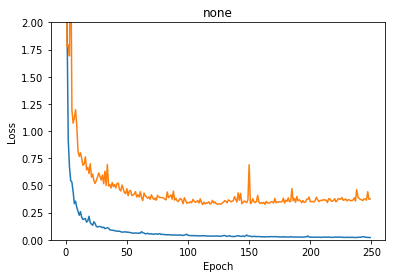

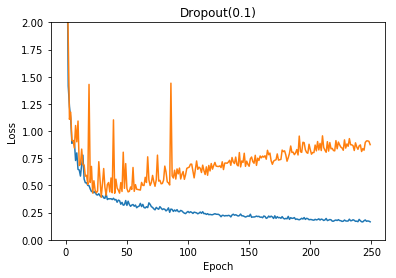

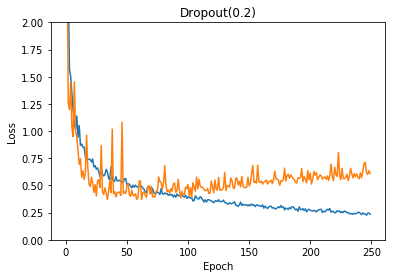

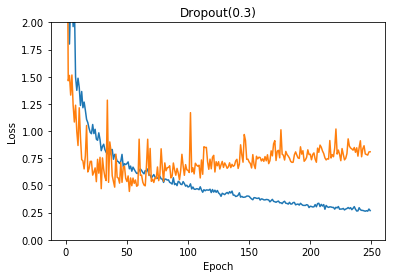

In [14]:
from keras.layers import Dropout
e=250;

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('none');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);


plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('Dropout(0.1)');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('Dropout(0.2)');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.figure();
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=e,verbose=2, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='validation');
plt.title('Dropout(0.3)');
plt.ylabel('Loss');
plt.xlabel('Epoch');
plt.ylim([0,2]);

plt.show();

En general el dropout permite reducir el overfitting y en consecuencia disminuir el MSE del validation set, en este caso hizo todo lo contrario. En general el dropout no se comporta bien para redes pequeñas y este es un buen ejemplo.

> j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [42]:
from sklearn.model_selection import KFold
Xm = X_train_scaled.values
ym = y_train
kf = KFold(n_splits=10,shuffle=True)

In [43]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(256, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

975/975 [==============================] - 1s 535us/step
0.07346471491150366
975/975 [==============================] - 1s 534us/step
0.01839819726653588
975/975 [==============================] - 1s 539us/step
0.05065933054456344
975/975 [==============================] - 1s 562us/step
0.031770834896044854
975/975 [==============================] - 1s 557us/step
0.026073611092108945
974/974 [==============================] - 1s 569us/step
0.027588204180466078
974/974 [==============================] - 1s 563us/step
0.12005711501383928
974/974 [==============================] - 1s 571us/step
0.031025682145718186
974/974 [==============================] - 1s 575us/step
0.02740436295540793
974/974 [==============================] - 1s 575us/step
0.08734091574391178
mean=0.04937829687501001


In [44]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(512, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

975/975 [==============================] - 1s 586us/step
0.08472710064588448
975/975 [==============================] - 1s 585us/step
0.18280378396694477
975/975 [==============================] - 1s 601us/step
0.03837777794744724
975/975 [==============================] - 1s 593us/step
0.15283644137474206
975/975 [==============================] - 1s 597us/step
0.04481910755427984
974/974 [==============================] - 1s 609us/step
0.0238532834634705
974/974 [==============================] - 1s 610us/step
0.03869980314719726
974/974 [==============================] - 1s 615us/step
0.04703614400657662
974/974 [==============================] - 1s 616us/step
0.05515285361810631
974/974 [==============================] - 1s 638us/step
0.04022143442313774
mean=0.07085277301477869


In [45]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(128, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

975/975 [==============================] - 1s 645us/step
0.03765709661424924
975/975 [==============================] - 1s 635us/step
0.05353261440610274
975/975 [==============================] - 1s 644us/step
0.03289085063796777
975/975 [==============================] - 1s 641us/step
0.024800311321249376
975/975 [==============================] - 1s 648us/step
0.04448648329346608
974/974 [==============================] - 1s 666us/step
0.03983234141396791
974/974 [==============================] - 1s 654us/step
0.029462697156523287
974/974 [==============================] - 1s 666us/step
0.04017291681217584
974/974 [==============================] - 1s 663us/step
0.029585156605045407
974/974 [==============================] - 1s 676us/step
0.03837736925106396
mean=0.03707978375118116


In [46]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(256, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
    model.fit(Xm[train], ym[train], verbose=0,epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

975/975 [==============================] - 1s 680us/step
0.0718662712837641
975/975 [==============================] - 1s 684us/step
0.05260749260966594
975/975 [==============================] - 1s 684us/step
0.055294592632697176
975/975 [==============================] - 1s 685us/step
0.07946499617053912
975/975 [==============================] - 1s 711us/step
0.2996838185420403
974/974 [==============================] - 1s 730us/step
0.07358314609824387
974/974 [==============================] - 1s 717us/step
0.04030955230981662
974/974 [==============================] - 1s 726us/step
0.11881449788013278
974/974 [==============================] - 1s 727us/step
0.05044435929254585
974/974 [==============================] - 1s 724us/step
0.2239390240878907
mean=0.10660077509073365


In [47]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(512, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
    model.fit(Xm[train], ym[train], verbose=0,epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

975/975 [==============================] - 1s 734us/step
0.3997251977217503
975/975 [==============================] - 1s 730us/step
0.040682221324397964
975/975 [==============================] - 1s 736us/step
0.05913537363593395
975/975 [==============================] - 1s 741us/step
0.05813091112635074
975/975 [==============================] - 1s 748us/step
0.04319579782012181
974/974 [==============================] - 1s 757us/step
0.14414694195410555
974/974 [==============================] - 1s 774us/step
0.041561582464212266
974/974 [==============================] - 1s 781us/step
0.05809303933230575
974/974 [==============================] - 1s 786us/step
0.024693668542670764
974/974 [==============================] - 1s 776us/step
0.05971435549261633
mean=0.09290790894144654


In [48]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(128, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

975/975 [==============================] - 1s 784us/step
0.06750279137721428
975/975 [==============================] - 1s 789us/step
0.040189705449037064
975/975 [==============================] - 1s 786us/step
0.0366050121646661
975/975 [==============================] - 1s 811us/step
0.3821974009122604
975/975 [==============================] - 1s 794us/step
0.16697420331148
974/974 [==============================] - 1s 798us/step
0.05700269800819288
974/974 [==============================] - 1s 882us/step
0.06710818393855858
974/974 [==============================] - 1s 829us/step
0.048166914290348854
974/974 [==============================] - 1s 852us/step
0.2547644966337409
974/974 [==============================] - 1s 832us/step
0.058877891315877805
mean=0.11793892974013769


In [8]:
from sklearn.model_selection import KFold
Xm = X_train_scaled.values
ym = y_train
kf = KFold(n_splits=5,shuffle=True)

In [50]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(256, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

1949/1949 [==============================] - 1s 451us/step
0.029087739605255895
1949/1949 [==============================] - 1s 451us/step
0.043474064214779146
1949/1949 [==============================] - 1s 453us/step
0.034478093376559986
1949/1949 [==============================] - 1s 458us/step
0.02824669820818001
1949/1949 [==============================] - 1s 463us/step
0.031548454779357464
mean=0.0333670100368265


In [51]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(512, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

1949/1949 [==============================] - 1s 461us/step
0.03744594618035867
1949/1949 [==============================] - 1s 470us/step
0.026963416174467004
1949/1949 [==============================] - 1s 475us/step
0.02727465914813692
1949/1949 [==============================] - 1s 482us/step
0.025715363945423977
1949/1949 [==============================] - 1s 470us/step
0.04014768200869619
mean=0.031509413491416546


In [52]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(128, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

1949/1949 [==============================] - 1s 474us/step
0.06385304195650607
1949/1949 [==============================] - 1s 479us/step
0.030228876308554746
1949/1949 [==============================] - 1s 483us/step
0.036931056324765274
1949/1949 [==============================] - 1s 488us/step
0.029344261748636913
1949/1949 [==============================] - 1s 498us/step
0.0476854094588463
mean=0.04160852915946186


In [9]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(256, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
    model.fit(Xm[train], ym[train], verbose=0,epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

1949/1949 [==============================] - 0s 70us/step
0.15544690615882195
1949/1949 [==============================] - 0s 72us/step
0.05344442778165185
1949/1949 [==============================] - 0s 74us/step
0.03702123790191895
1949/1949 [==============================] - 0s 79us/step
0.04683336012329182
1949/1949 [==============================] - 0s 85us/step
0.1266116631518822
mean=0.08387151902351335


In [10]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(512, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

1949/1949 [==============================] - 0s 83us/step
0.043101999067676075
1949/1949 [==============================] - 0s 85us/step
0.04673652686732986
1949/1949 [==============================] - 0s 84us/step
0.25848803082753397
1949/1949 [==============================] - 0s 92us/step
0.08263307434433603
1949/1949 [==============================] - 0s 88us/step
0.04242988152208697
mean=0.09467790252579258


In [11]:
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    model.add(Dense(128, input_dim=Xm[train].shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
    model.fit(Xm[train], ym[train],verbose=0, epochs=250)
    scores = model.evaluate(Xm[val], ym[val])
    print(scores)
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print('mean=' + str(mse_cv))

1949/1949 [==============================] - 0s 95us/step
0.11569245066350396
1949/1949 [==============================] - 0s 94us/step
0.06535066572185692
1949/1949 [==============================] - 0s 91us/step
0.1519033285369165
1949/1949 [==============================] - 0s 94us/step
0.09934821806412253
1949/1949 [==============================] - 0s 95us/step
0.05621390215949317
mean=0.09770171302917861


Al utilizar Kfolds para evaluar los modelos se obtuvo distintos optimos para los distintos valores de K, para la sigmoide el optimo fue de 256 para K=10, y 512 para K=5. Por otro lado el optimo apra relu fue de 256 par k=10 y 256 para k=5. Es curioso que no se tengan mismos resultados para distintos valores de k